# 1. Libraries 

In [1037]:
#Reset
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')

In [1038]:
#Gurobi Libraries
import gurobipy as gp
from gurobipy import GRB
import sys
#Other Libraries
import numpy as np
import pandas as pd
import csv
import math
#Libraries created
import importlib
#Libraries for excel import
import os
import xlwings as xw
import xlsxwriter
#Library for plotting timeseries results
import matplotlib.pyplot as plt

# 2. Input Data : Parameters

In [1039]:
# Number of Generators
NG_TH = 1 #name updated
NG_PV = 1
NG_W = 1
#NG = NG_T + NG_PV + NG_W

# Number of Loads
ND = 1

# Number of periods
NT = 24*12 #time period

# Renewable Generators' Costs
C_PV= 5 #Cost of PV generation
C_W= 10 #Cost of WP generation

# Thermal Generators Cost 
C_TH_parameters = np.array([[900, 45, 0.01]])
C_TH = pd.DataFrame(C_TH_parameters, index=["G1_T"], columns=["a", "b", "c"])

#Energy Not Supplied Cost
C_ENS= 7880

# Solar energy capacity
Q_PV = 30000   # Solar PV installed capacity (MW)

# Wind energy capacity
Q_W = 30000     # Wind installed capacity (MW)

# Thermal generator capacity
Q_TH = 5000 #name updated

#Demand max capacity
Q_D = 30000

## Demand data

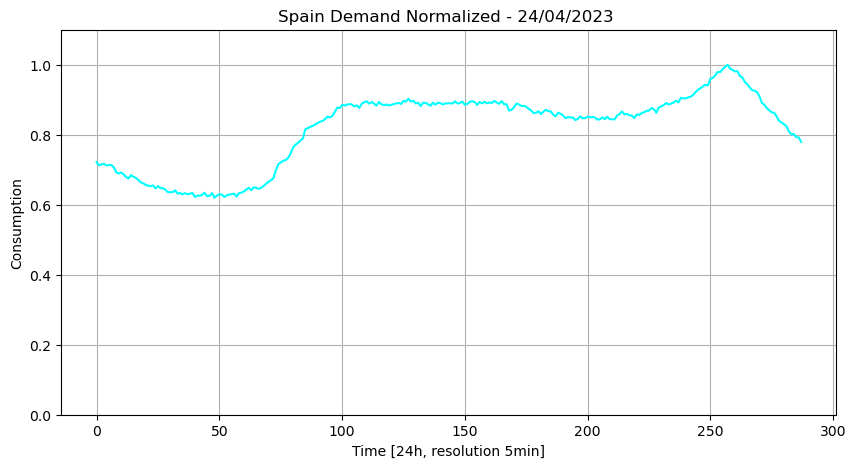

In [1040]:
# Demand Input
INPUT_PATH = os.path.join(os.getcwd(),"Inputs.xlsx") # Path where the main input files are located
input_book = xw.Book(INPUT_PATH)
input_demand = input_book.sheets[0]
QD_h = input_demand.range('B3:B290').options(pd.DataFrame, index=False,header=False).value.astype(float)
QD_h_norm=QD_h/QD_h.max()
plt.figure(figsize=(10,5))
plt.plot(QD_h_norm, color = 'cyan')
plt.ylim(0,1.1) #updated
plt.xlabel("Time [24h, resolution 5min]")
plt.ylabel("Consumption")
plt.title("Spain Demand Normalized - 24/04/2023 ")
plt.grid()
plt.show()

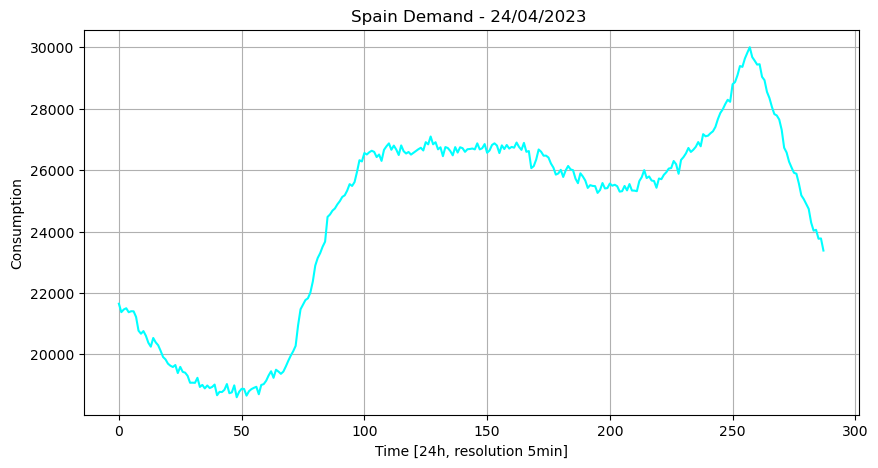

0         1        2         3         4         5         6    \
0  0.721644  0.712488  0.71537  0.716714  0.712392  0.713481  0.713385   

       7         8         9    ...       278       279       280       281  \
0  0.70727  0.692384  0.689087  ...  0.839229  0.835099  0.829913  0.824567   

        282       283       284      285       286       287  
0  0.809681  0.800941  0.801838  0.79217  0.792458  0.779332  

[1 rows x 288 columns]

In [1041]:
QD_Total=QD_h_norm*Q_D

plt.figure(figsize=(10,5))
plt.plot(QD_Total, color = 'cyan')
#plt.ylim(0,1.1) #updated
plt.xlabel("Time [24h, resolution 5min]")
plt.ylabel("Consumption")
plt.title("Spain Demand - 24/04/2023 ")
plt.grid()
plt.show()

QD_norm=QD_h_norm.T
QD_norm

## Wind generation data 

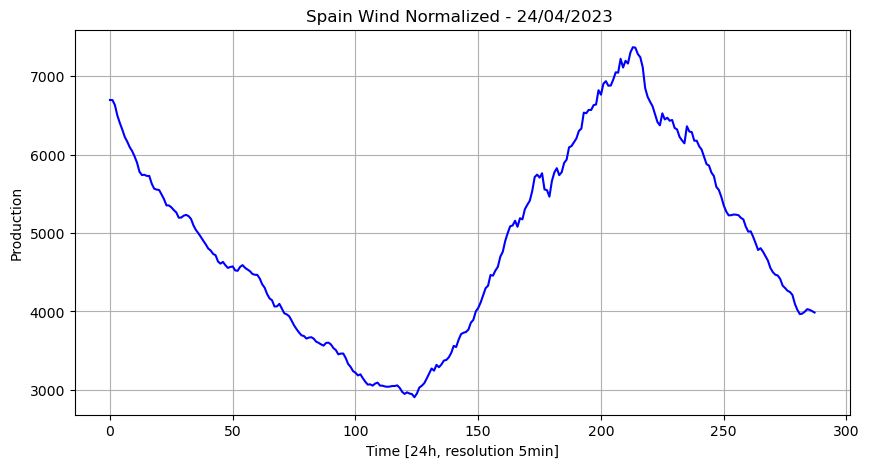

0         1         2         3        4         5         6    \
0  0.908671  0.908536  0.899851  0.881802  0.86891  0.857647  0.844891   

        7         8         9    ...       278       279       280       281  \
0  0.836884  0.827385  0.820464  ...  0.571312  0.555842  0.545664  0.538336   

       282       283      284       285       286      287  
0  0.53915  0.542407  0.54675  0.545664  0.543493  0.54105  

[1 rows x 288 columns]

In [1042]:
input_generation = input_book.sheets[1]
QW_h = input_generation.range('B3:B290').options(pd.DataFrame, index=False,header=False).value.astype(float)

QW_h_norm=QW_h/QW_h.max()

plt.figure(figsize=(10,5))
plt.plot(QW_h, color = 'blue')
#plt.ylim(0,1.1)
plt.xlabel("Time [24h, resolution 5min]")
plt.ylabel("Production")
plt.title("Spain Wind Normalized - 24/04/2023 ")
plt.grid()
plt.show()

QW_norm=QW_h_norm.T
QW_norm

## Solar Generation data

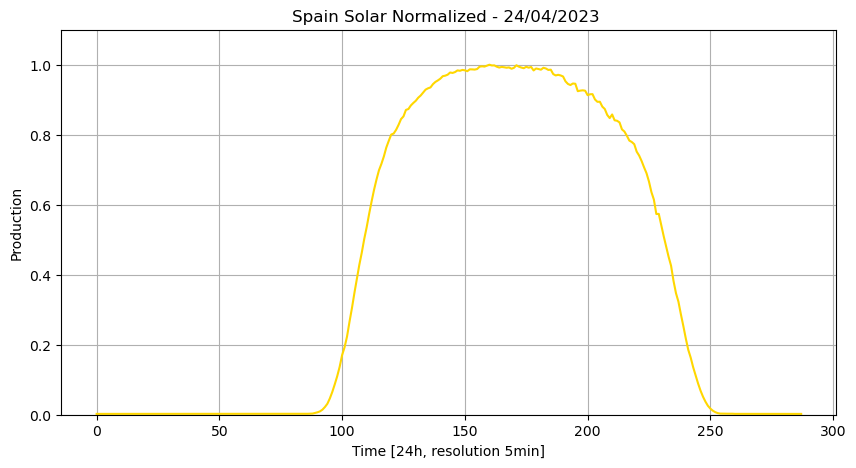

0         1         2         3         4         5         6    \
0  0.002403  0.002403  0.002336  0.002403  0.002403  0.002403  0.002336   

        7         8         9    ...       278       279       280       281  \
0  0.002336  0.002336  0.002403  ...  0.002336  0.002336  0.002336  0.002336   

        282       283       284       285       286       287  
0  0.002336  0.002336  0.002336  0.002336  0.002336  0.002336  

[1 rows x 288 columns]

In [1043]:
input_solar = input_book.sheets[1]
QPV_h = input_generation.range('H3:H290').options(pd.DataFrame, index=False,header=False).value.astype(float)

QPV_h_norm=QPV_h/QPV_h.max()

plt.figure(figsize=(10,5))
plt.plot(QPV_h_norm, color = 'gold')
plt.ylim(0,1.1)
plt.xlabel("Time [24h, resolution 5min]")
plt.ylabel("Production")
plt.title("Spain Solar Normalized - 24/04/2023 ")
plt.grid()
plt.show()

QPV_norm=QPV_h_norm.T
QPV_norm

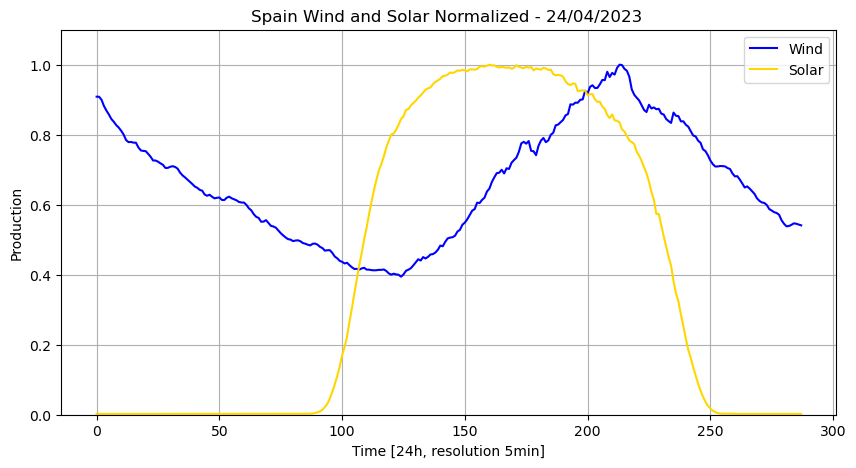

In [1044]:
import matplotlib.pyplot as plt
QW_h_norm=QW_h/QW_h.max()
QPV_h_norm=QPV_h/QPV_h.max()

plt.figure(figsize=(10,5))

plt.plot(QW_h_norm, color = 'blue', label='Wind')

plt.plot(QPV_h_norm, color = 'gold', label='Solar')

plt.ylim(0,1.1)
plt.xlabel("Time [24h, resolution 5min]")
plt.ylabel("Production")
plt.title("Spain Wind and Solar Normalized - 24/04/2023 ")
plt.grid()

plt.legend()

plt.show()

QW_norm=QW_h_norm.T
QPV_norm=QPV_h_norm.T


## Thermal Generation data

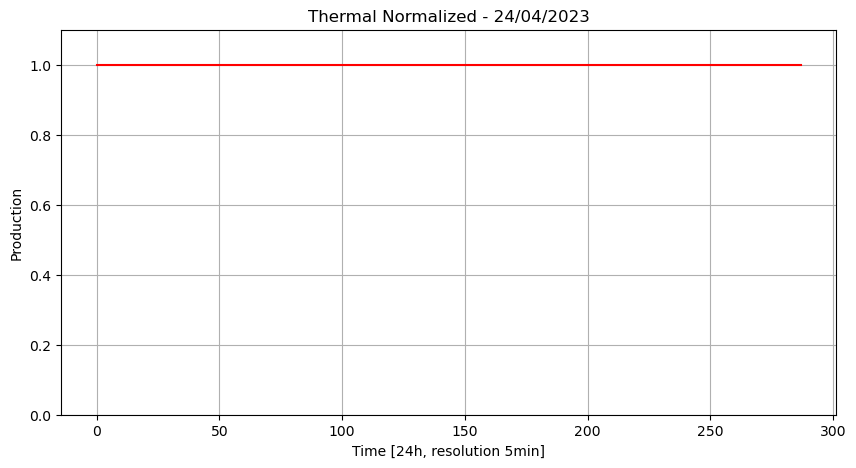

In [1045]:
import numpy as np

QTH_h_norm = pd.DataFrame(np.ones((288, 1)))

QTH_norm = QTH_h_norm.T

plt.figure(figsize=(10,5))
plt.plot(QTH_h_norm, color = 'red')
plt.ylim(0,1.1)
plt.xlabel("Time [24h, resolution 5min]")
plt.ylabel("Production")
plt.title("Thermal Normalized - 24/04/2023")
plt.grid()
plt.show()


# 3. Economic Dispatch Model using Gurobi

In [1046]:
def economic_dispatch_model2(ND, NG_W, NG_PV, NG_TH, NT, C_W, C_PV, C_TH, C_ENS, QD_norm, QW_norm, QPV_norm, QTH_norm, Q_D, Q_W, Q_PV, Q_TH): #Updated including QT_h_norm and QT, and sorting
    
    model = gp.Model("ED_model2")
    model.setParam(GRB.Param.MIPGap, 0.00001)

    # VARIABLES DEFINITION
    v_w = model.addMVar(shape=(NG_W, NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_w")
    v_pv = model.addMVar(shape=(NG_PV, NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_pv")
    v_th = model.addMVar(shape=(NG_TH, NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_th") #updated the names of variables, for convention please named the variables always using lowercase
    #ENS
    v_ens = model.addMVar(shape=(1,NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_ens")#updated the shape of matrix variable (NT,1)

        
   # CONSTRAINTS DEFINITION
    for t in range(NT):
        for g in range(NG_W):
            model.addConstr(v_w[g, t] <= QW_norm.iloc[g,t] * Q_W, name="Wind_Capacity_"+ str(g)+"_"+str(t))  #v_W_g, t ≤ Q_W_h_norm_g, t * Q_W
            
    for t in range(NT):
        for g in range(NG_PV):    
            model.addConstr(v_pv[g, t] <= QPV_norm.iloc[g,t] * Q_PV, name="PV_Capacity_"+str(g)+"_"+str(t)) #v_PV_g, t ≤ Q_PV_h_norm_g, t * Q_PV # updated v_pv[:,t] instead of v_pv[0,t] because with the ":" the constraint is valid for any number of generators otherwise the constrain will consider only 1 generator
    
    for t in range(NT):
        for g in range(NG_TH):  
            model.addConstr(v_th[g, t] <= QTH_norm.iloc[g,t] * Q_TH, name="Thermal_Capacity_"+str(g)+"_"+str(t)) #v_th_g, t ≤ Q_TH_h_norm_g, t * Q_TH
    
    for t in range(NT):    
        model.addConstr(sum(v_w[g, t] for g in range(NG_W))  + sum(v_pv[g, t] for g in range(NG_PV)) + sum(v_th[g, t] for g in range(NG_TH)) + v_ens[:,t] == sum(QD_norm.iloc[d,t] * Q_D for d in range(ND)), name="Power_Balance_" + str(t)) #∑_g ( v_PV_g, t + v_W_g, t + v_t_g, t) + v_ENS_t = QD_h_norm_t * QD

    
    # OBJECTIVE FUNCTION
    model.setObjective(sum(sum(C_W * v_w[g, t] for g in range(NG_W)) + sum(C_PV * v_pv[g, t] for g in range(NG_PV)) + sum(C_TH.iloc[g, 0] + C_TH.iloc[g, 1] * v_th[g, t] + C_TH.iloc[g, 2] * v_th[g, t] * v_th[g, t] for g in range(NG_TH)) + C_ENS * v_ens[:,t] for t in range(NT)),GRB.MINIMIZE)
    #min ∑_t (∑_g (C_PV * v_PV_g, t + C_W * v_W_g, t + (C_T_a + C_T_b * v_t_g, t + C_T_c * (v_t_g, t) * (v_t_g, t) ) + C_ENS * v_ENS_t)
    
    model.optimize()
    
    Obj_value = model.objVal

    #Calculations after optimization
    #Value of generation dispatch
    v_w_df = pd.DataFrame(v_w.X, index=list(range(NG_W)), columns=list(range(NT)))
    v_pv_df = pd.DataFrame(v_pv.X, index=list(range(NG_PV)), columns=list(range(NT)))
    v_th_df = pd.DataFrame(v_th.X, index=list(range(NG_TH)), columns=list(range(NT)))
    v_ens_df = pd.DataFrame(v_ens.X, index=["ENS"], columns=list(range(NT)))
    #vPG_df = pd.concat([v_t_df, v_PV_df, v_W_df])
    
    #Cost values
    total_cost=model.objVal
    w_cost= sum(sum(C_W * v_w.X[g, t] for g in range(NG_W)) for t in range(NT))
    pv_cost= sum(sum(C_PV * v_pv.X[g, t] for g in range(NG_PV)) for t in range(NT))
    th_cost= sum(sum((C_TH.iloc[g, 0] + C_TH.iloc[g, 1] * v_th.X[g, t] + C_TH.iloc[g, 2] * v_th.X[g, t] * v_th.X[g, t] for g in range(NG_TH))) for t in range(NT))
    ens_cost= sum(C_ENS * v_ens.X[0,t] for t in range(NT))
    
    #To compute marginal cost using the power balance constraint
    marginal_costs=[]#initialization of a list to save the dual variables
    for c in model.getConstrs(): #get all constraints of the model
        if ((c.ConstrName).startswith ("Power_Balance_")): #select only the constraints of power balance 
            marginal_costs.append(c.Pi) #Add only dual variables of power balance constraint in margina_cost
    marginal_costs_df = pd.DataFrame(marginal_costs)#marginal cost in dataframe format
    
    return Obj_value, v_w_df, v_pv_df, v_th_df, v_ens_df, total_cost, w_cost, pv_cost, th_cost, ens_cost, marginal_costs_df


 # 4. Call of Economic Dispatch function

In [1047]:
Obj_value, v_w_df, v_pv_df, v_th_df, v_ens_df, total_cost, w_cost, pv_cost, th_cost, ens_cost, marginal_costs_df = economic_dispatch_model2(ND, NG_W, NG_PV, NG_TH, NT, C_W, C_PV, C_TH, C_ENS, QD_norm, QW_norm, QPV_norm, QTH_norm, Q_D, Q_W, Q_PV, Q_TH)

Set parameter MIPGap to value 1e-05
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1152 rows, 1152 columns and 2016 nonzeros
Model fingerprint: 0x8a9f87d1
Model has 288 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 8e+03]
  QObjective range [2e-02, 2e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+01, 3e+04]
Presolve removed 933 rows and 276 columns
Presolve time: 0.01s
Presolved: 219 rows, 876 columns, 876 nonzeros
Presolved model has 219 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 2.190e+02
 Factor Ops : 2.190e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual     

# 5. Results analysis

## Wind generation

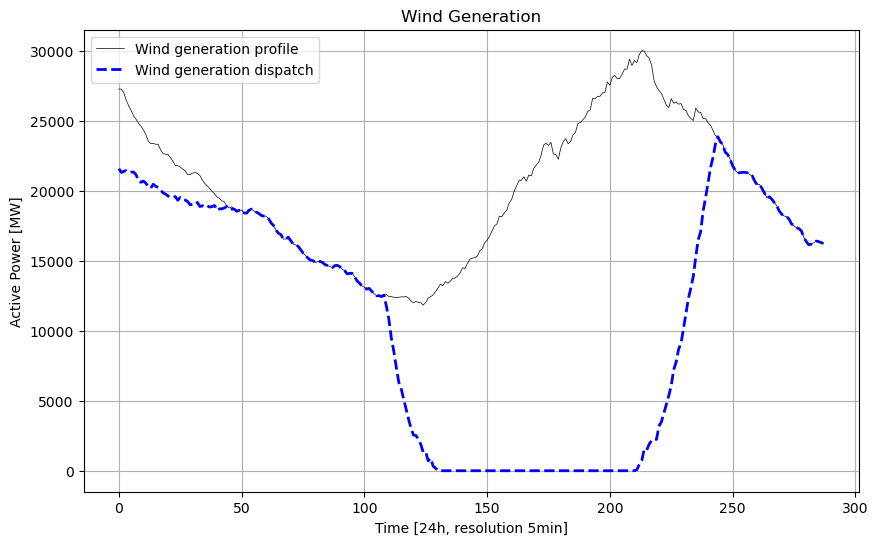

In [1048]:
w_ini = (QW_norm*Q_W).T
w_final = (v_w_df).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
ax.plot(x, w_ini, linewidth=1.0/2, label="Wind generation profile", color="black" )
ax.plot(x, w_final, linewidth=2.0, label="Wind generation dispatch", color="blue", linestyle = 'dashed')
ax.legend(loc='upper left')
ax.set_title("Wind Generation")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()

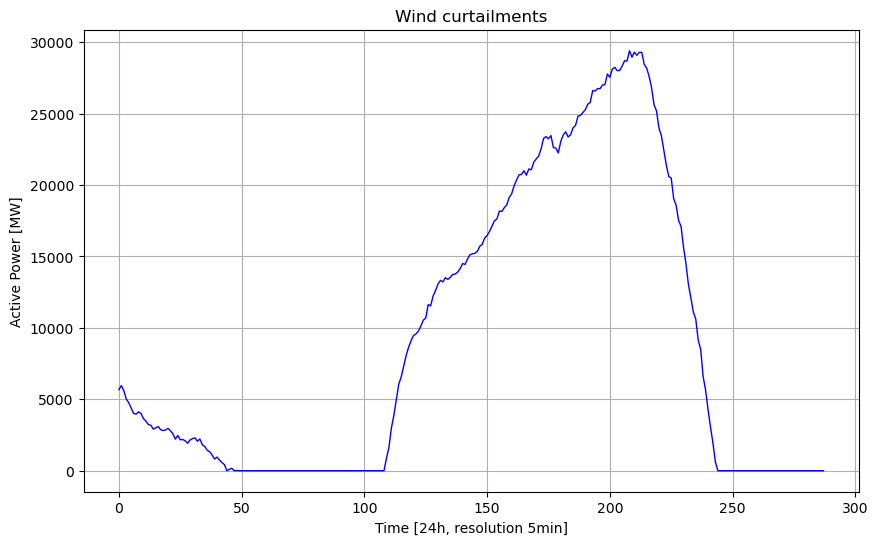

0           1            2            3            4    \
0  5682.913854  5953.51701  5604.527426  5024.735859  4767.634469   

           5            6           7            8            9    ...  278  \
0  4397.078863  4015.273174  3958.51407  4120.122241  4013.419518  ...  0.0   

   279  280  281  282  283  284  285  286  287  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 288 columns]

In [1049]:
vv_w = w_ini - w_final

fig, ax = plt.subplots()
ax.plot(x, vv_w, linewidth=1.0, color="blue")
ax.set_title("Wind curtailments")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()

vv_w.T


In [1050]:
import pandas as pd
import locale
from IPython.display import display

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

total_dispatched_generation = w_final.sum().sum()/12
total_curtailment = (w_ini - w_final).abs().sum().sum()/12

data = {
    'Wind Curtailments [MWh]': [locale.format_string('%1.2f ', total_curtailment, True)],
    'Wind Dispatched Generation [MWh]': [locale.format_string('%1.2f ', total_dispatched_generation, True)]
}

df = pd.DataFrame(data)

styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_df)


## Solar generation

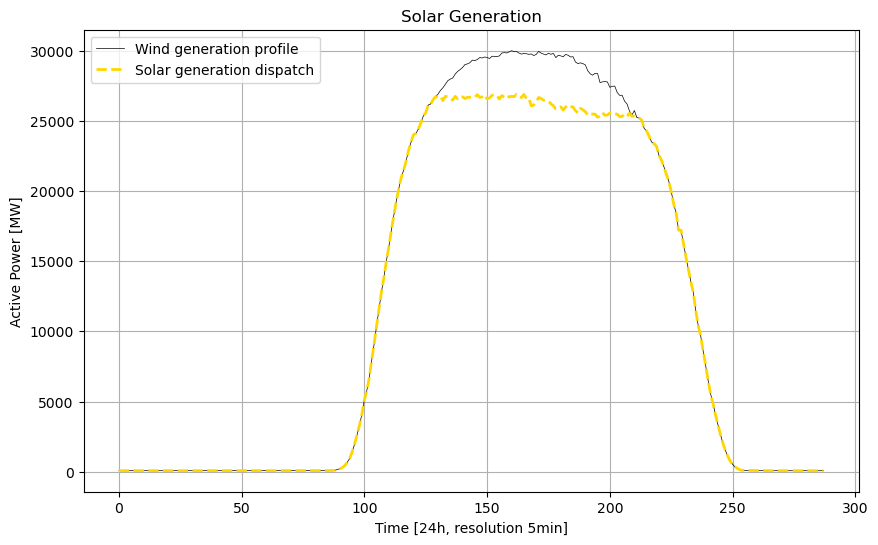

In [1051]:
pv_ini = (QPV_norm*Q_PV).T
pv_final = (v_pv_df).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
ax.plot(x, pv_ini, linewidth=1.0/2, label="Wind generation profile", color="black")
ax.plot(x, pv_final, linewidth=2.0, label="Solar generation dispatch", color="gold", linestyle = 'dashed')
ax.legend(loc='upper left')
ax.set_title("Solar Generation")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()

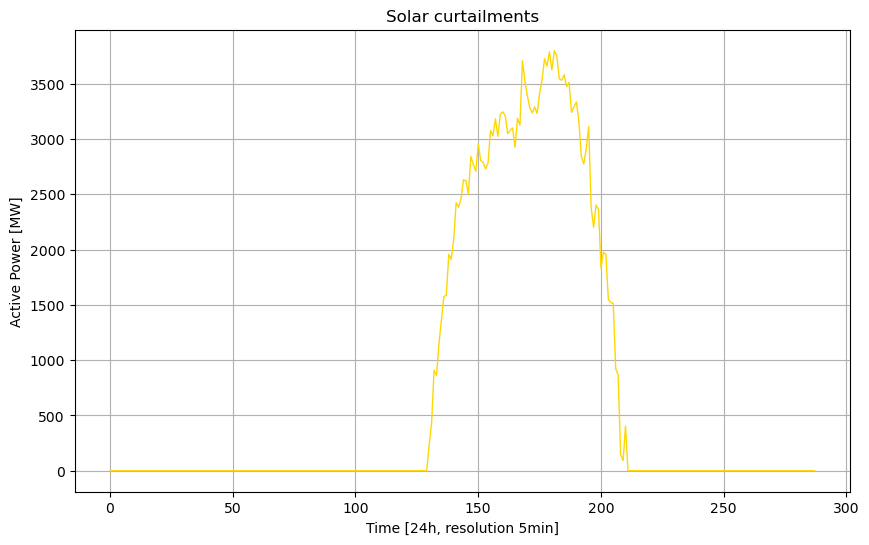

0             1             2             3             4    \
0  1.512035e-11  1.510614e-11  1.490719e-11  1.512035e-11  1.510614e-11   

            5             6             7             8             9    ...  \
0  1.510614e-11  1.490719e-11  1.489298e-11  1.485034e-11  1.506351e-11  ...   

   278  279  280  281  282  283  284  285  286  287  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 288 columns]

In [1052]:
vv_pv = pv_ini - pv_final

fig, ax = plt.subplots()
ax.plot(x, vv_pv, linewidth=1.0, color="gold")
ax.set_title("Solar curtailments")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()

vv_pv.T

In [1053]:
import pandas as pd
import locale
from IPython.display import display

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

total_dispatched_generation = pv_final.sum().sum()/12
total_curtailment = (pv_ini - pv_final).abs().sum().sum()/12

data = {
    'Solar Curtailments [MWh]': [locale.format_string('%1.2f ', total_curtailment, True)],
    'Solar Dispatched Generation [MWh]': [locale.format_string('%1.2f ', total_dispatched_generation, True)]
}

df = pd.DataFrame(data)

styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Oranges')

display(styled_df)


## Thermal generation

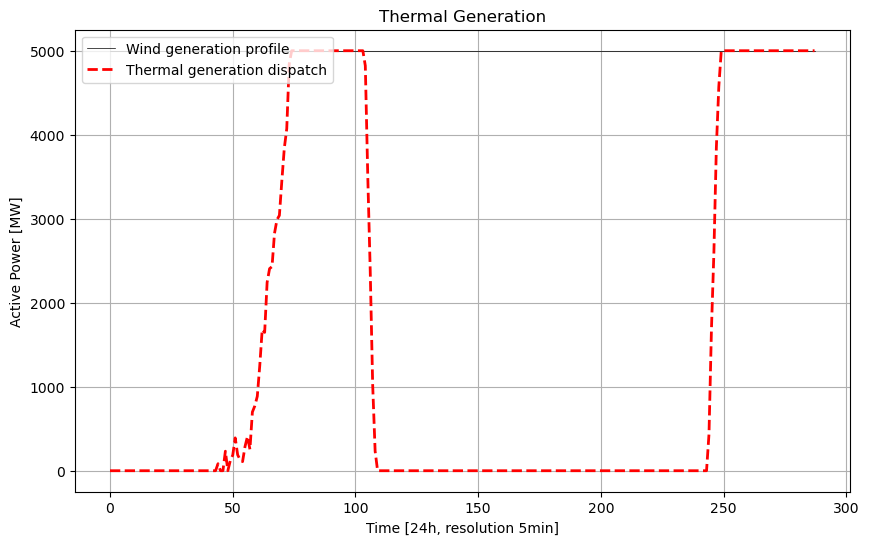

In [1054]:
th_ini = (QTH_norm*Q_TH).T
th_final = (v_th_df).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
ax.plot(x, th_ini, linewidth=1.0/2, label="Wind generation profile", color="black")
ax.plot(x, th_final, linewidth=2.0, label="Thermal generation dispatch", color="red", linestyle = 'dashed')
ax.legend(loc='upper left')
ax.set_title("Thermal Generation")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()

## ENS analysis

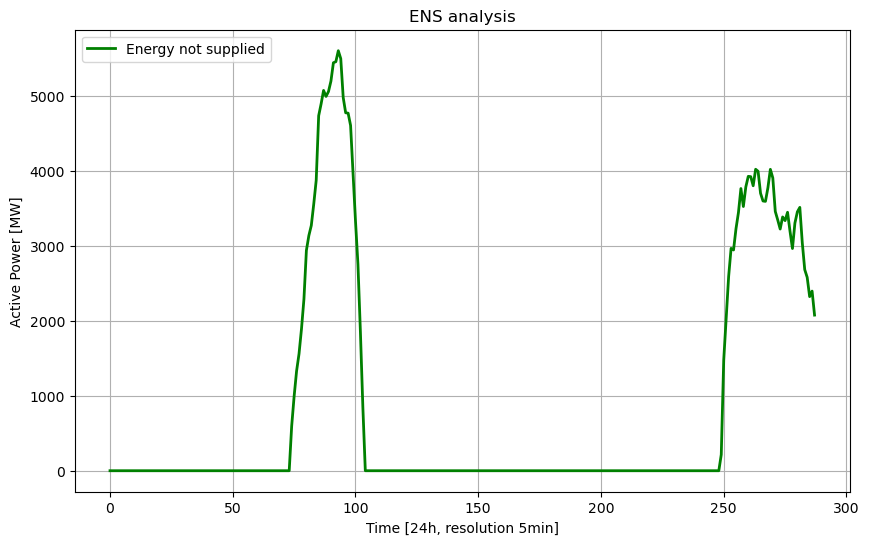

In [1055]:
ens = (v_ens_df).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
ax.plot(x, ens, linewidth=2.0, label="Energy not supplied", color="green")
ax.legend(loc='upper left')
ax.set_title("ENS analysis")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()

## Generation dispatched vs Demand

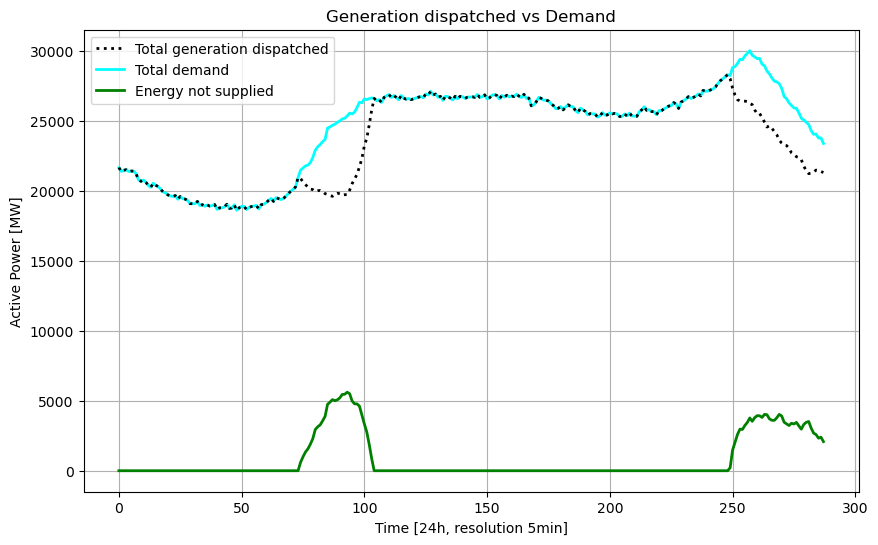

In [1056]:
gen_disp = (v_w_df).T + (v_pv_df).T + (v_th_df).T #total generation dispatched
gen_available= (QW_norm*Q_W).T+(QPV_norm*Q_PV).T+(QTH_norm*Q_TH).T
demand = (QD_norm*Q_D).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
#ax.plot(x, gen_available, linewidth=2.0, label="Total generation available", color="red")
ax.plot(x, gen_disp, linewidth=2.0, label="Total generation dispatched", color="black",linestyle="dotted",zorder=10)
ax.plot(x, demand, linewidth=2.0, label="Total demand", color="cyan")
ax.plot(x, ens, linewidth=2.0, label="Energy not supplied", color="green")
ax.legend(loc='upper left')
ax.set_title("Generation dispatched vs Demand")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()

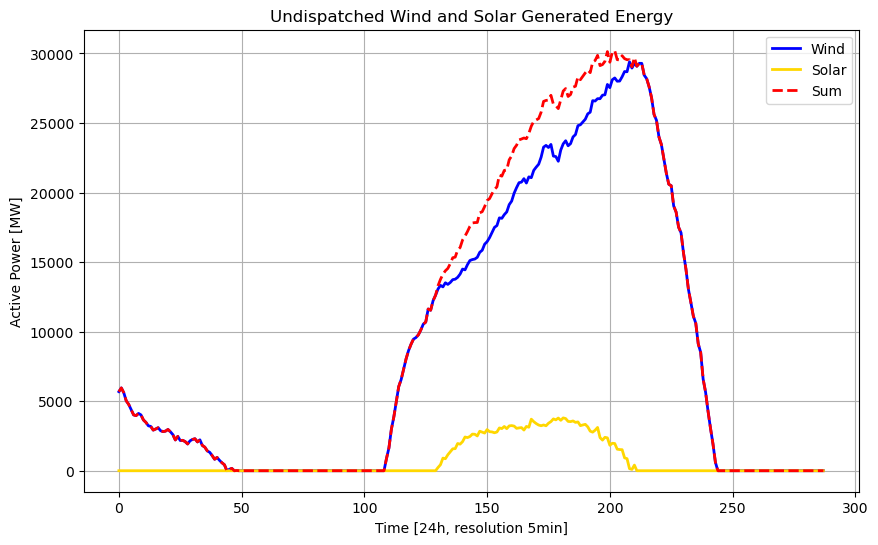

In [1057]:
vv_sum = vv_w + vv_pv

fig, ax = plt.subplots()

ax.plot(x, vv_w, linewidth=2.0, color="blue", label='Wind')

ax.plot(x, vv_pv, linewidth=2.0, color="gold", label='Solar')

ax.plot(x, vv_sum, linewidth=2.0, color="red", linestyle='--', label='Sum')

ax.set_title("Undispatched Wind and Solar Generated Energy")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)

ax.legend()

plt.show()

## Generation dispatched vs Total generation available

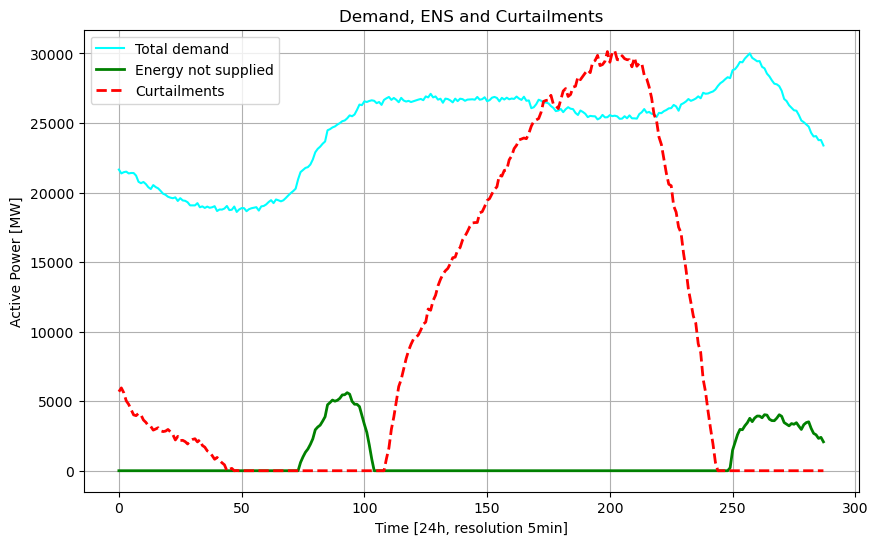

In [1058]:
gen_available= (QW_norm*Q_W).T+(QPV_norm*Q_PV).T+(QTH_norm*Q_TH).T
demand = (QD_norm*Q_D).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()

ax.plot(x, demand, linewidth=1.5, color="cyan", label="Total demand")
ax.plot(x, ens, linewidth=2.0, color="green", label="Energy not supplied")
ax.plot(x, vv_sum, linewidth=2.0, color="red", linestyle='dashed', label='Curtailments')

ax.set_title("Demand, ENS and Curtailments")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
ax.legend(loc='upper left')
fig.set_size_inches(10, 6)

plt.show()


## Generation dispatch of individual generators

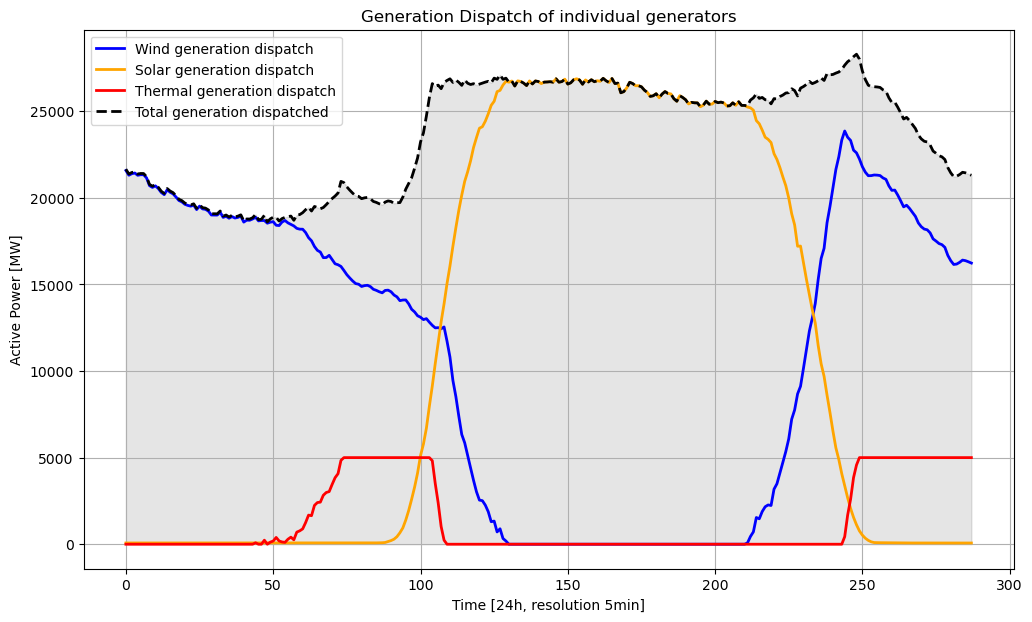

In [1059]:
fig, ax = plt.subplots()
ax.plot(x, w_final, linewidth=2.0, label="Wind generation dispatch", color="blue")
ax.plot(x, pv_final, linewidth=2.0, label="Solar generation dispatch", color="orange")
ax.plot(x, th_final, linewidth=2.0, label="Thermal generation dispatch", color="red")
ax.plot(x, gen_disp, linewidth=2.0, label="Total generation dispatched", color="black",linestyle="dashed",zorder=10)
ax.fill_between(x.squeeze(), gen_disp.squeeze(), color="black", alpha=0.1)

ax.legend(loc='upper left')
ax.set_title("Generation Dispatch of individual generators")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(12, 7)

plt.show()


## All energy sources with total demand

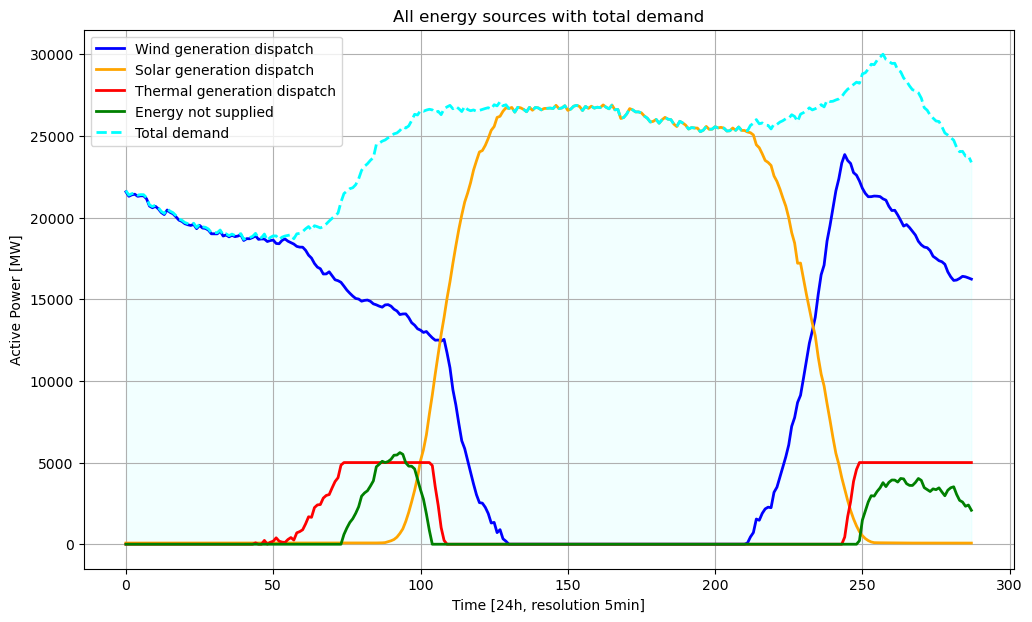

In [1060]:
fig, ax = plt.subplots()
ax.plot(x, w_final, linewidth=2.0, label="Wind generation dispatch", color="blue")
ax.plot(x, pv_final, linewidth=2.0, label="Solar generation dispatch", color="orange")
ax.plot(x, th_final, linewidth=2.0, label="Thermal generation dispatch", color="red")
ax.plot(x, ens, linewidth=2.0, label="Energy not supplied", color="green")
ax.plot(x, demand, linewidth=2.0, label="Total demand", color="cyan", linestyle="dashed",zorder=10)
ax.fill_between(x.squeeze(), demand.squeeze(), color="cyan", alpha=0.05)

ax.legend(loc='upper left')
ax.set_title("All energy sources with total demand")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(12, 7)

plt.show()


## Average hourly dispatch production

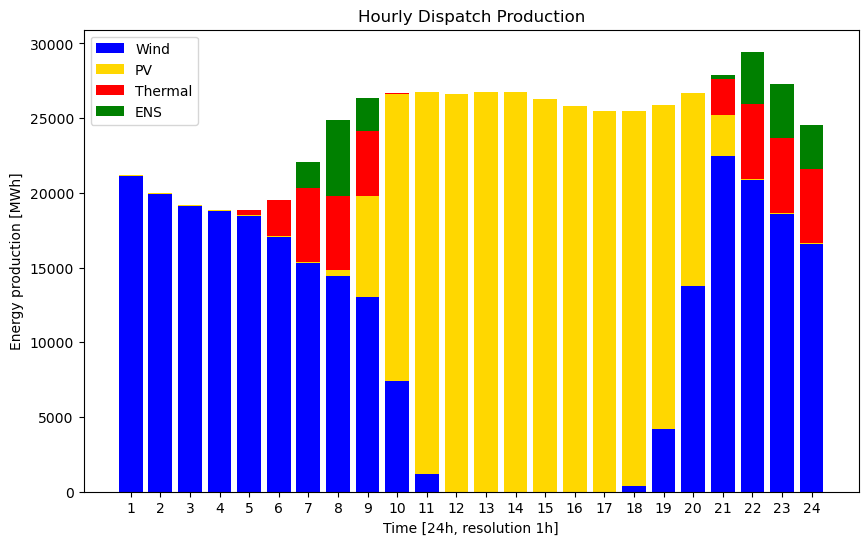

In [1061]:
pv_final_hourly = pv_final.values.reshape(-1, 12).mean(axis=1)
w_final_hourly = w_final.values.reshape(-1, 12).mean(axis=1)
th_final_hourly = th_final.values.reshape(-1, 12).mean(axis=1)
ens_hourly = ens.values.reshape(-1, 12).mean(axis=1)

cumulative_bottom = np.add(np.add(w_final_hourly, pv_final_hourly), th_final_hourly)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(range(1, 25), w_final_hourly,  color='blue', label='Wind')
ax.bar(range(1, 25), pv_final_hourly, bottom=w_final_hourly, color='gold', label='PV')
ax.bar(range(1, 25), th_final_hourly, bottom=np.add(w_final_hourly, pv_final_hourly), color='red', label='Thermal')
ax.bar(range(1, 25), ens_hourly, bottom=cumulative_bottom, color='green', label='ENS')  

ax.set_title("Hourly Dispatch Production")
ax.set_xlabel('Time [24h, resolution 1h]')
ax.set_ylabel('Energy production [MWh]')
ax.set_xticks(range(1, 25)) 
ax.legend()
plt.show()

import locale
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')


production_hourly_df = pd.DataFrame({
    'Wind Production': w_final_hourly,
    'Solar Production': pv_final_hourly,
    'Thermal Production': th_final_hourly,
    'ENS': ens_hourly,
}, index=range(1, 25))

production_hourly_df['Total Production'] = production_hourly_df.sum(axis=1)

styled_production_hourly_df = production_hourly_df.applymap(lambda x: locale.format_string("%.2f MWh", x, grouping=True)).style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_production_hourly_df)


## Total energy dispatched

In [1062]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

total_w_dispatch = v_w_df.sum().sum()/12
total_pv_dispatch = v_pv_df.sum().sum()/12
total_th_dispatch = v_th_df.sum().sum()/12
total_ens_dispatch = v_ens_df.sum().sum()/12
total_energy_dispatched = total_w_dispatch + total_pv_dispatch + total_th_dispatch + total_ens_dispatch

Summary_Dispatch = [total_w_dispatch, total_pv_dispatch, total_th_dispatch, total_ens_dispatch, total_energy_dispatched]
Dispatch_Summary = [Summary_Dispatch]
Dispatch_df = pd.DataFrame(Dispatch_Summary, index=['Total Energy Dispatched (MWh)'], columns=['Wind','PV','Thermal','ENS','TOTAL'])

Dispatch_df = Dispatch_df.applymap(lambda x: locale.format_string("%.3f", x, grouping=True))

Dispatch_df = Dispatch_df.style.set_properties(**{'text-align': 'center', 'font-size': '120%', 'border':'1px solid black', 'padding':'10px'}).set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('font-size', '120%'), ('border', '1px solid black'), ('padding', '10px')])]).background_gradient(cmap='Greens')

Dispatch_df

# 6. Cost analysis

## Dispatch cost of every generator 

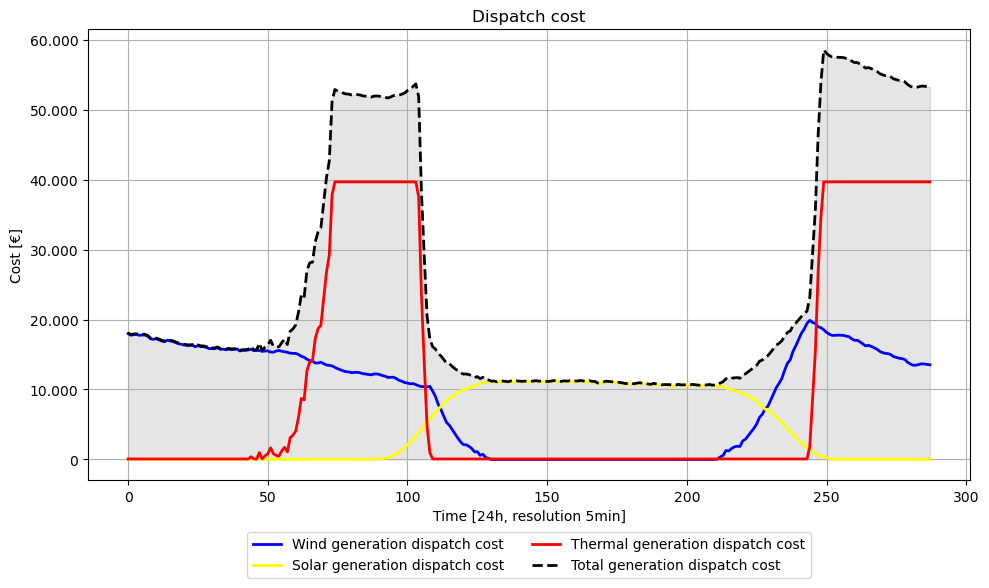

In [1063]:
import matplotlib.ticker as mtick
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

fmt = mtick.StrMethodFormatter('{x:n}')

w_price = w_final * C_W /12
pv_price = pv_final * C_PV /12
th_price = (900 + th_final * 45 + (v_th_df**2).T * 0.01) / 12
total_price = w_price + pv_price + th_price
ens_price = ens * C_ENS /12

fig, ax = plt.subplots()
ax.plot(x.squeeze(), w_price.squeeze(), linewidth=2.0, label="Wind generation dispatch cost", color="blue"),
ax.plot(x.squeeze(), pv_price.squeeze(), linewidth=2.0, label="Solar generation dispatch cost", color="yellow")
ax.plot(x.squeeze(), th_price.squeeze(), linewidth=2.0, label="Thermal generation dispatch cost", color="red")
ax.plot(x.squeeze(), total_price.squeeze(), linewidth=2.0, label="Total generation dispatch cost", color="black", linestyle="dashed", zorder=10)
ax.fill_between(x.squeeze(), total_price.squeeze(), color="black", alpha=0.1) 
#ax.plot(x, ens_price, linewidth=2.0, label="Energy not supplied", color="green")

ax.yaxis.set_major_formatter(fmt)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

ax.set_title("Dispatch cost")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Cost [€]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.tight_layout()
plt.show()


## Total cost

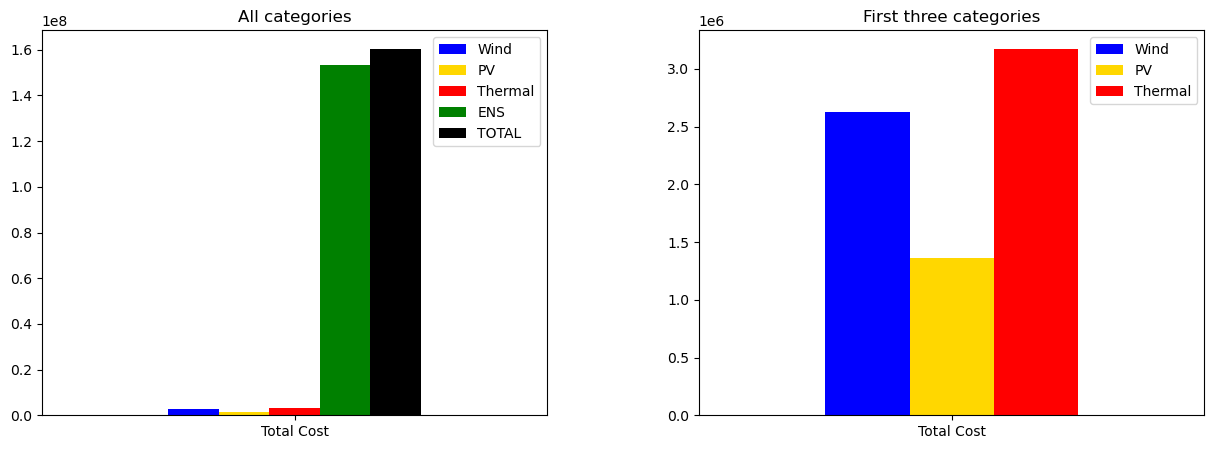

In [1064]:
import locale
import matplotlib.pyplot as plt

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

w_cost = w_price.sum().sum()
pv_cost = pv_price.sum().sum()
th_cost = th_price.sum().sum()
ens_cost = ens_price.sum().sum()
generation_cost = w_cost + pv_cost + th_cost + ens_cost

Summary_Cost = [w_cost, pv_cost, th_cost, ens_cost, generation_cost]
Summary_df_plot = pd.DataFrame([Summary_Cost], index=['Total Cost'], columns=['Wind','PV','Thermal','ENS','TOTAL'])

colors = ['blue', 'gold', 'red', 'green', 'black']

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  

Summary_df_plot.plot.bar(rot=0, ax=axs[0], color=colors)
axs[0].set_title('All categories')

Summary_df_plot.iloc[:,0:3].plot.bar(rot=0, ax=axs[1], color=colors[:3])
axs[1].set_title('First three categories')

plt.subplots_adjust(wspace=0.3)  # space between plots
plt.show()


Summary_df = Summary_df_plot.copy().applymap(lambda x: locale.format_string("%.2f €", x, grouping=True))

styled_summary = Summary_df.style.set_properties(**{'text-align': 'center', 'font-size': '120%', 'border':'1px solid black', 'padding':'10px'}).set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('font-size', '120%'), ('border', '1px solid black'), ('padding', '10px')])]).background_gradient(cmap='Blues')
styled_summary


## Average hourly wind dispatch cost

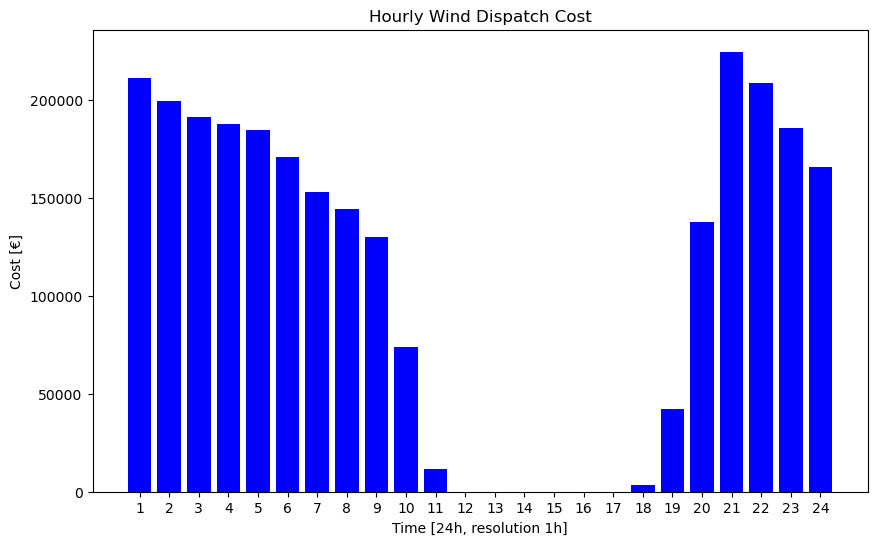

In [1065]:
w_price = w_final * C_W

w_price_hourly = w_price.values.reshape(-1, 12).mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, 25), w_price_hourly, color='blue')
ax.set_title("Hourly Wind Dispatch Cost")
ax.set_xlabel('Time [24h, resolution 1h]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 25))  
plt.show()


## Average hourly solar dispatch cost

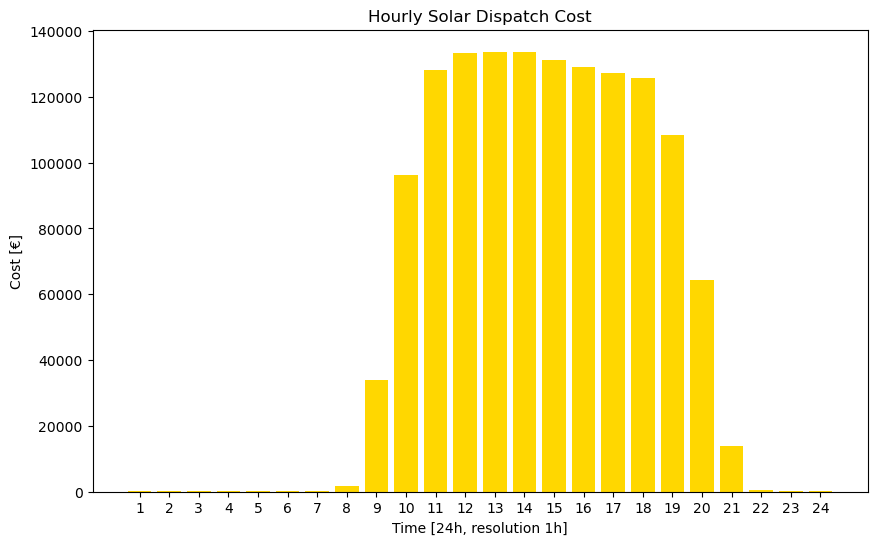

In [1066]:
pv_price = pv_final * C_PV 
pv_price_hourly = pv_price.values.reshape(-1, 12).mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, 25), pv_price_hourly, color='gold')
ax.set_title("Hourly Solar Dispatch Cost")
ax.set_xlabel('Time [24h, resolution 1h]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 25)) 
plt.show()


## Average hourly thermal dispatch cost

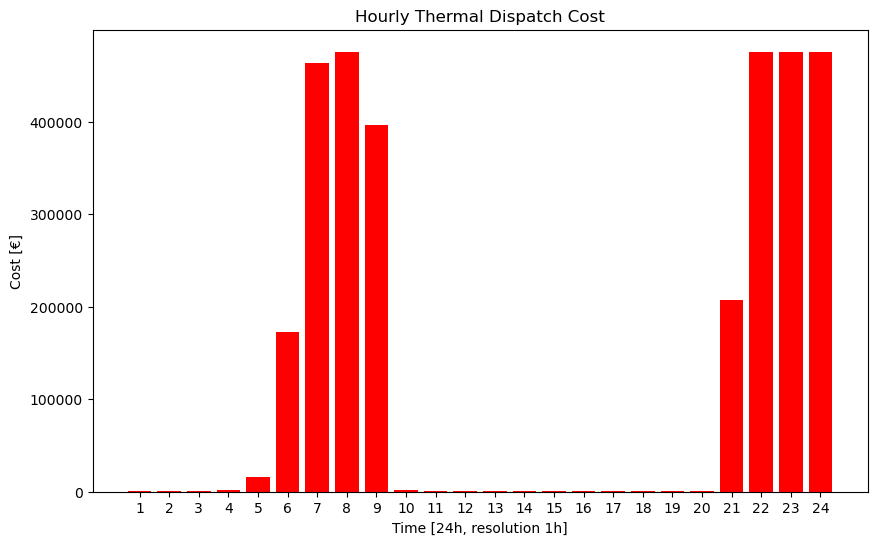

In [1067]:
th_price = 900 + th_final * 45 + (v_th_df**2).T * 0.01
th_price_hourly = th_price.values.reshape(-1, 12).mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, 25), th_price_hourly, color='red')
ax.set_title("Hourly Thermal Dispatch Cost")
ax.set_xlabel('Time [24h, resolution 1h]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 25))  
plt.show()

## Average hourly ENS dispatch cost

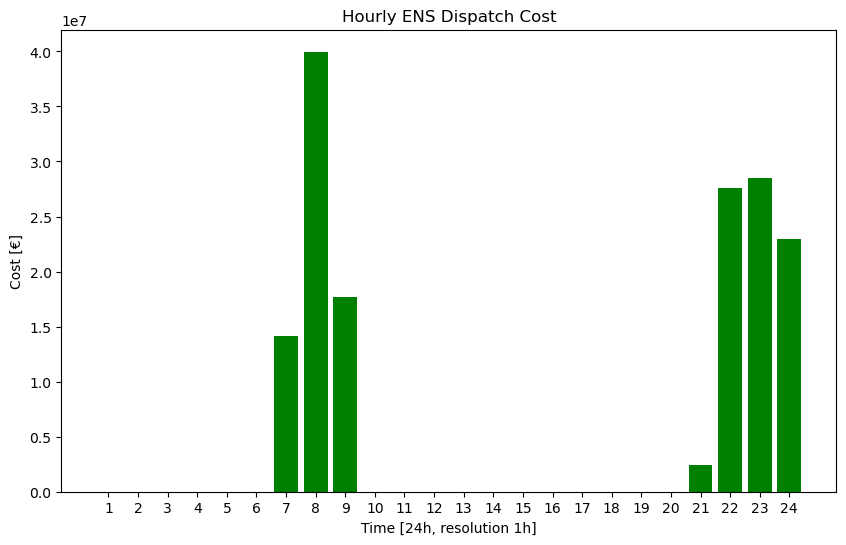

In [1068]:
ens_price = ens * C_ENS
ens_price_hourly = ens_price.values.reshape(-1, 12).mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, 25), ens_price_hourly, color='green')
ax.set_title("Hourly ENS Dispatch Cost")
ax.set_xlabel('Time [24h, resolution 1h]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 25)) 
plt.show()

## Average generator hourly dispatch cost

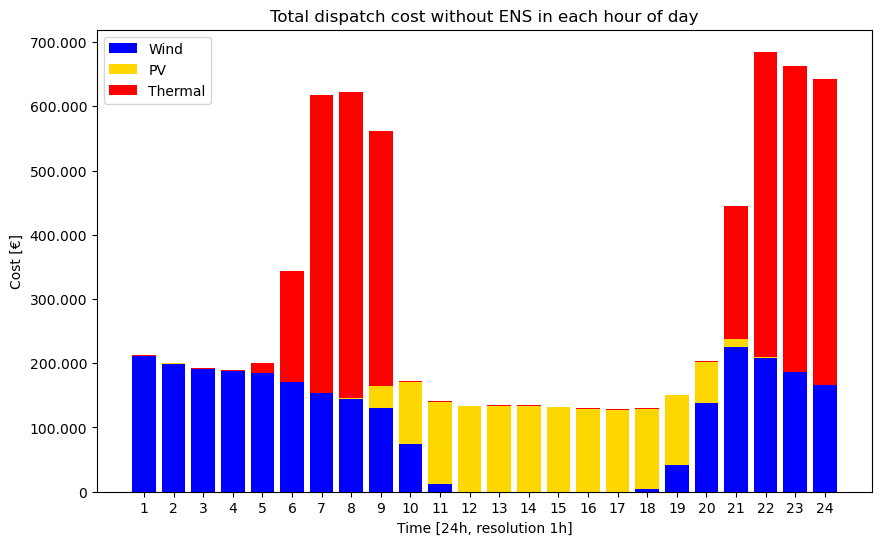

In [1069]:
import matplotlib.ticker as mtick
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

fmt = mtick.StrMethodFormatter('{x:n}')

w_price_hourly = w_price.values.reshape(-1, 12).mean(axis=1)
pv_price_hourly = pv_price.values.reshape(-1, 12).mean(axis=1)
th_price_hourly = th_price.values.reshape(-1, 12).mean(axis=1)

cumulative_bottom = np.add(w_price_hourly, pv_price_hourly)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(range(1, 25), w_price_hourly, color='blue', label='Wind')
ax.bar(range(1, 25), pv_price_hourly, bottom=w_price_hourly, color='gold', label='PV')
ax.bar(range(1, 25), th_price_hourly, bottom=cumulative_bottom, color='red', label='Thermal')

ax.set_title("Total dispatch cost without ENS in each hour of day")
ax.set_xlabel('Time [24h, resolution 1h]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 25))  

# Set the formatter
ax.yaxis.set_major_formatter(fmt)

ax.legend()  
plt.show()


## Average hourly dispatch cost

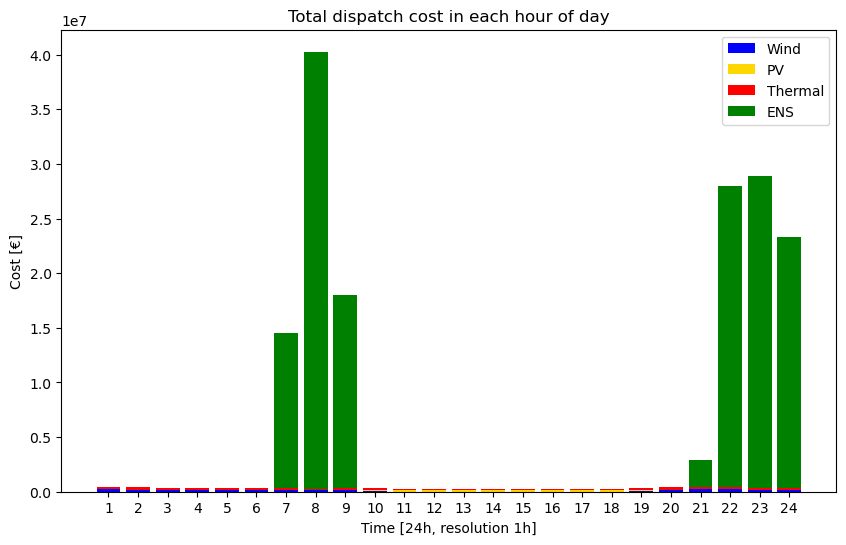

In [1070]:
w_price_hourly = w_price.values.reshape(-1, 12).mean(axis=1)
pv_price_hourly = pv_price.values.reshape(-1, 12).mean(axis=1)
th_price_hourly = th_price.values.reshape(-1, 12).mean(axis=1)
ens_price_hourly = ens_price.values.reshape(-1, 12).mean(axis=1)

cumulative_bottom = np.add(w_price_hourly, pv_price_hourly, th_price_hourly)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(range(1, 25), w_price_hourly, color='blue', label='Wind')
ax.bar(range(1, 25), pv_price_hourly, bottom=w_price_hourly, color='gold', label='PV')
ax.bar(range(1, 25), th_price_hourly, bottom=cumulative_bottom, color='red', label='Thermal')
ax.bar(range(1, 25), ens_price_hourly, bottom=cumulative_bottom+th_price_hourly, color='green', label='ENS')

ax.set_title("Total dispatch cost in each hour of day")
ax.set_xlabel('Time [24h, resolution 1h]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 25)) 
ax.legend()  
plt.show()


import locale
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

price_hourly_df = pd.DataFrame({
    'Wind Dispatch Cost': w_price_hourly,
    'Solar Dispatch Cost': pv_price_hourly,
    'Thermal Dispatch Cost': th_price.values.reshape(-1, 12).mean(axis=1),
    'ENS Dispatch Cost': ens_price_hourly,
}, index=range(1, 25))

price_hourly_df['Total Dispatch Cost'] = price_hourly_df.sum(axis=1)

styled_price_hourly_df = price_hourly_df.applymap(lambda x: locale.format_string("%.2f €", x, grouping=True)).style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '120%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_price_hourly_df)


## Average hourly total cost per MWh

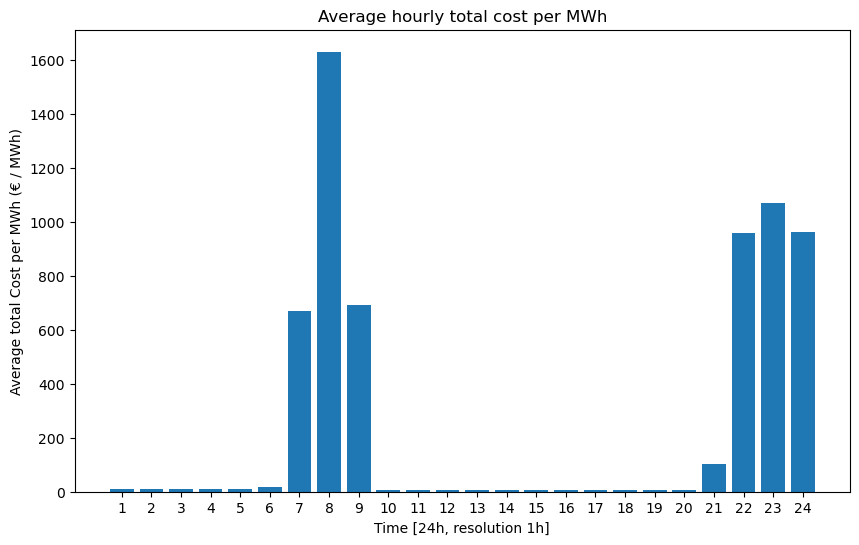

In [1071]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import locale
from IPython.display import display

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

cost_per_mwh_hourly_df = pd.DataFrame()

small_value = 1e-5

cost_per_mwh_hourly_df['Wind Cost per MWh'] = price_hourly_df['Wind Dispatch Cost'] / (production_hourly_df['Wind Production'] + small_value)
cost_per_mwh_hourly_df['Solar Cost per MWh'] = price_hourly_df['Solar Dispatch Cost'] / (production_hourly_df['Solar Production'] + small_value)
cost_per_mwh_hourly_df['Thermal Cost per MWh'] = price_hourly_df['Thermal Dispatch Cost'] / (production_hourly_df['Thermal Production'] + small_value)
cost_per_mwh_hourly_df['ENS Cost per MWh'] = price_hourly_df['ENS Dispatch Cost'] / (production_hourly_df['ENS'] + small_value)

cost_per_mwh_hourly_df['Total Cost per MWh'] = price_hourly_df['Total Dispatch Cost'] / (production_hourly_df['Total Production'] + small_value)

styled_cost_per_mwh_hourly_df = cost_per_mwh_hourly_df.applymap(lambda x: '0,00 €/MWh' if x >= 1000000 else locale.format_string("%.2f €/MWh", x, grouping=True)).style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '120%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

total_cost_per_mwh_24h = cost_per_mwh_hourly_df['Total Cost per MWh'][:24]

plt.figure(figsize=(10,6))
plt.bar(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values)
plt.xlabel('Time [24h, resolution 1h]')
plt.ylabel('Average total Cost per MWh (€ / MWh)')
plt.title('Average hourly total cost per MWh')
plt.xticks(range(1,25))
plt.show()

display(styled_cost_per_mwh_hourly_df)


## Average total cost per MWh

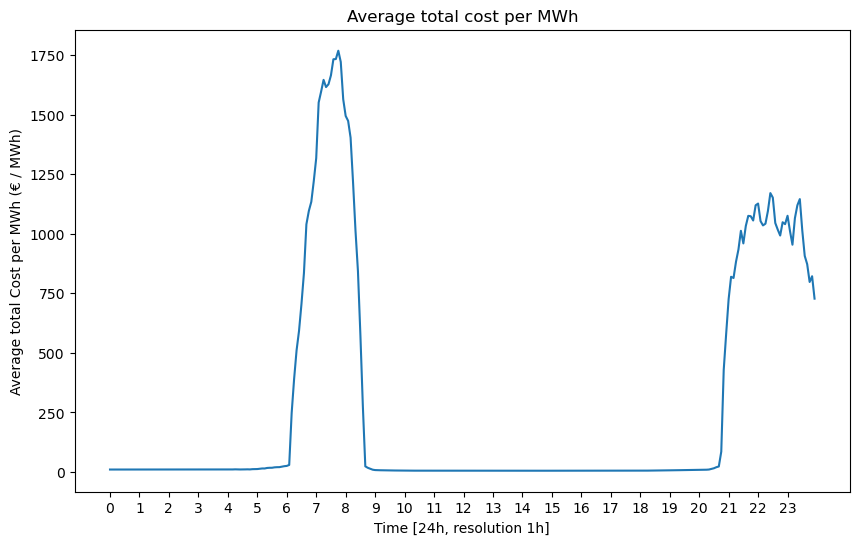

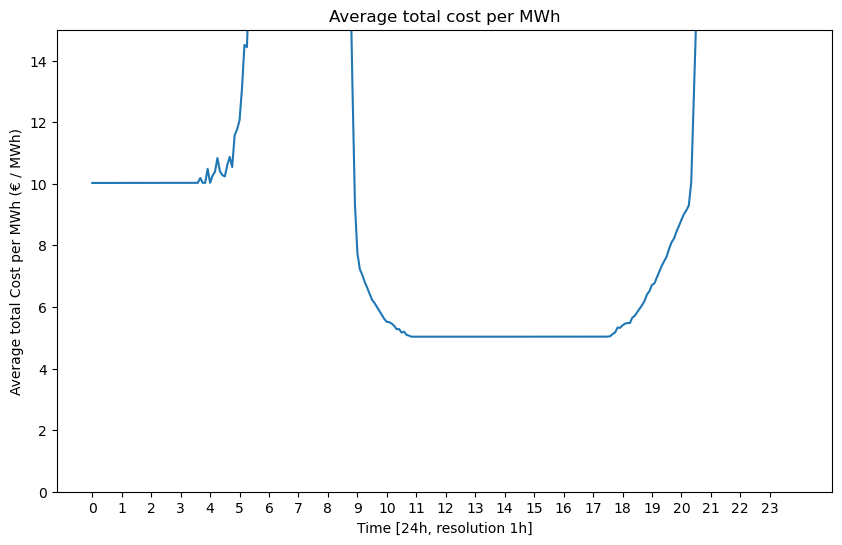

In [1072]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import locale
from IPython.display import display

w_price = w_final * C_W
pv_price = pv_final * C_PV 
th_price = 900 + th_final * 45 + (v_th_df**2).T * 0.01
ens_price = ens * C_ENS

cost_per_mwh_5min_df = pd.DataFrame()

small_value = 1e-5  # avoid division by 0


cost_per_mwh_5min_df['Wind Cost per MWh'] = w_price.sum(axis=1) / (w_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['Solar Cost per MWh'] = pv_price.sum(axis=1) / (pv_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['Thermal Cost per MWh'] = th_price.sum(axis=1) / (th_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['ENS Cost per MWh'] = ens_price.sum(axis=1) / (ens.sum(axis=1) + small_value)

total_dispatch_cost_5min = w_price.sum(axis=1) + pv_price.sum(axis=1) + th_price.sum(axis=1) + ens_price.sum(axis=1)  # Total cost
total_production_5min = w_final.sum(axis=1) + pv_final.sum(axis=1) + th_final.sum(axis=1) + ens.sum(axis=1)  # Total production

cost_per_mwh_5min_df['Total Cost per MWh'] = total_dispatch_cost_5min / (total_production_5min + small_value)


total_cost_per_mwh_24h = cost_per_mwh_5min_df['Total Cost per MWh'][:24*12]

plt.figure(figsize=(10,6))
plt.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values)
plt.xlabel('Time [24h, resolution 1h]')
plt.ylabel('Average total Cost per MWh (€ / MWh)')
plt.title('Average total cost per MWh')
plt.xticks(range(0, 24*12, 12), range(24))  
plt.show()

plt.figure(figsize=(10,6))
plt.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values)
plt.xlabel('Time [24h, resolution 1h]')
plt.ylabel('Average total Cost per MWh (€ / MWh)')
plt.title('Average total cost per MWh')
plt.xticks(range(0, 24*12, 12), range(24))  
plt.ylim(0, 15) 
plt.show()

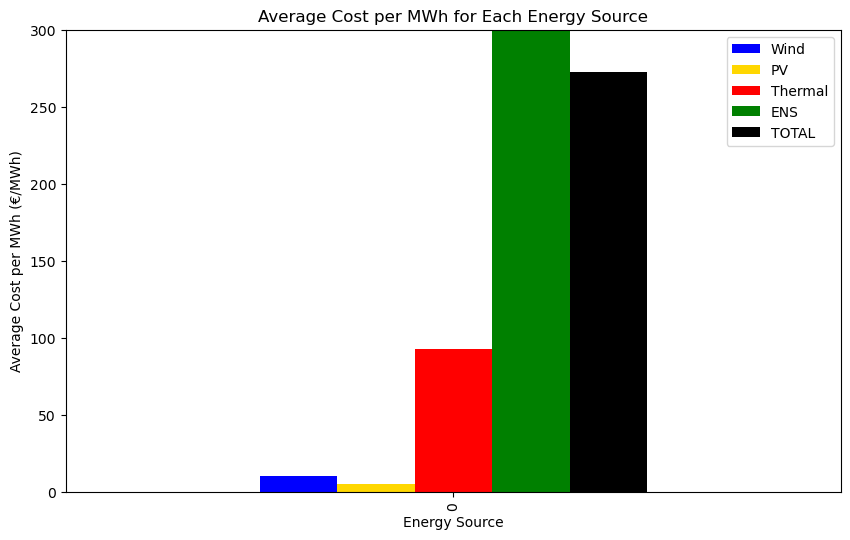

In [1110]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

total_w_dispatch = v_w_df.sum().sum()/12
total_pv_dispatch = v_pv_df.sum().sum()/12
total_th_dispatch = v_th_df.sum().sum()/12
total_ens_dispatch = v_ens_df.sum().sum()/12
total_energy_dispatched = total_w_dispatch + total_pv_dispatch + total_th_dispatch + total_ens_dispatch

w_cost = w_price.sum().sum()/12
pv_cost = pv_price.sum().sum()/12
th_cost = th_price.sum().sum()/12
ens_cost = ens_price.sum().sum()/12
generation_cost = w_cost + pv_cost + th_cost + ens_cost

avg_cost_w = w_cost / total_w_dispatch
avg_cost_pv = pv_cost / total_pv_dispatch
avg_cost_th = th_cost / total_th_dispatch
avg_cost_ens = ens_cost / total_ens_dispatch
avg_cost_total = generation_cost / total_energy_dispatched

Unified_df = pd.DataFrame({'Total Energy Dispatched (MWh)': [total_w_dispatch, total_pv_dispatch, total_th_dispatch, total_ens_dispatch, total_energy_dispatched],
                           'Total Cost (€)': [w_cost, pv_cost, th_cost, ens_cost, generation_cost],
                           'Average Cost per MWh (€/MWh)': [avg_cost_w, avg_cost_pv, avg_cost_th, avg_cost_ens, avg_cost_total]},
                          index=['Wind','PV','Thermal','ENS','TOTAL'])

fig, ax = plt.subplots(figsize=(10,6))

colors = ['blue', 'gold', 'red', 'green', 'black']

Avg_Cost_values = Unified_df['Average Cost per MWh (€/MWh)'].values

Avg_Cost_df_plot = pd.DataFrame([Avg_Cost_values], columns=['Wind', 'PV', 'Thermal', 'ENS', 'TOTAL'])

Avg_Cost_df_plot.plot(kind='bar', ax=ax, color=colors, ylim=(0,300))

ax.set_title('Average Cost per MWh for Each Energy Source')
ax.set_xlabel('Energy Source')
ax.set_ylabel('Average Cost per MWh (€/MWh)')

plt.show()

Unified_df = Unified_df.applymap(lambda x: locale.format_string("%.2f", x, grouping=True))
styled_df = Unified_df.style.set_properties(**{'text-align': 'center', 'font-size': '120%', 'border':'1px solid black', 'padding':'10px'}).set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('font-size', '120%'), ('border', '1px solid black'), ('padding', '10px')])]).background_gradient(cmap='Greens')
display(styled_df)


# 7. Short-term marginal costs

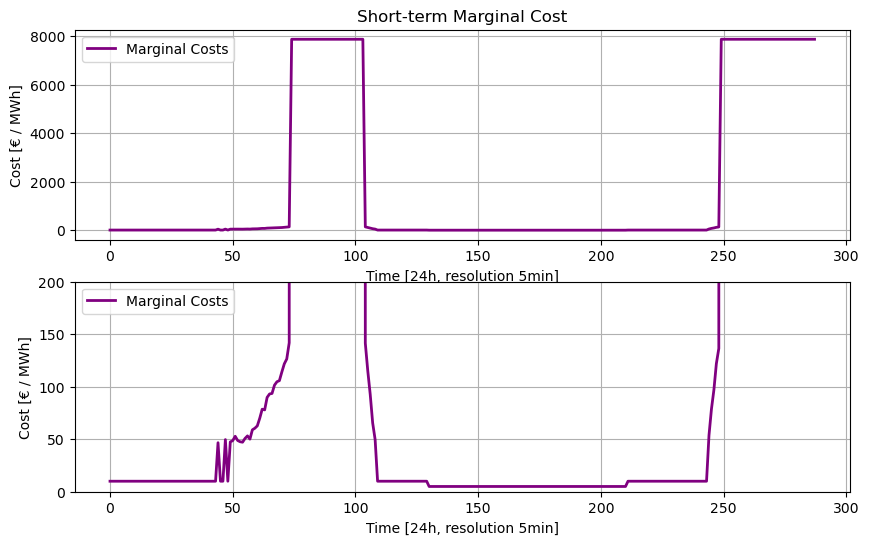

In [172]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")
ax1.legend(loc='upper left')
ax1.set_title("Short-term Marginal Cost")
ax1.set_xlabel('Time [24h, resolution 5min]')
ax1.set_ylabel('Cost [€ / MWh]')
ax1.grid(True)
ax2.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")
ax2.legend(loc='upper left')
ax2.set_xlabel('Time [24h, resolution 5min]')
ax2.set_ylabel('Cost [€ / MWh]')
ax2.set_ylim([0, 200])
ax2.grid(True)
fig.set_size_inches(10, 6)
plt.show()

## Marignal costs and Average cost per MWh

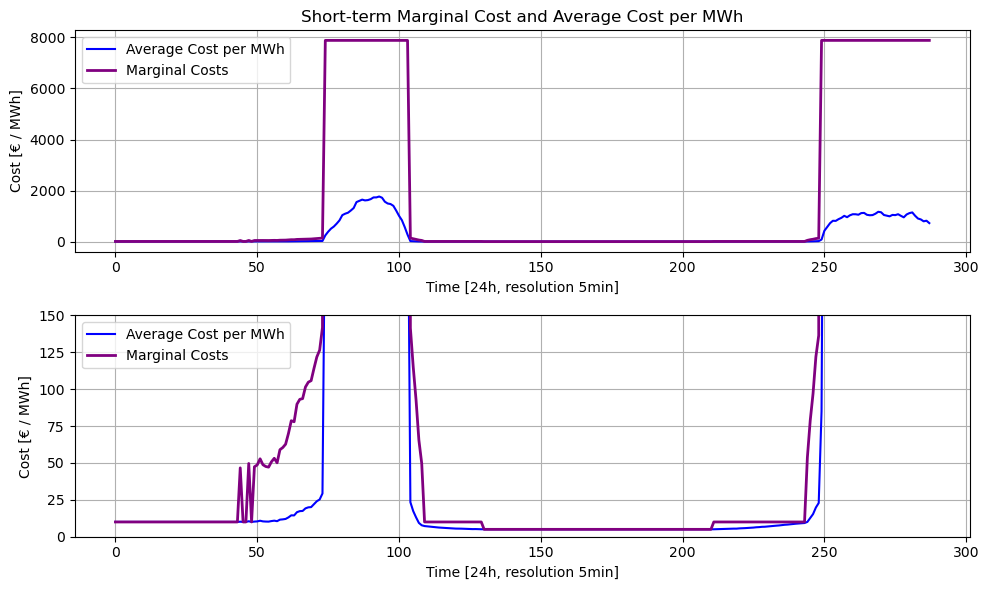

In [173]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10, 6))

ax1.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values, color='blue', label='Average Cost per MWh')
ax2.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values, color='blue', label='Average Cost per MWh')

ax1.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")
ax2.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")

ax1.set_title("Short-term Marginal Cost and Average Cost per MWh")
ax1.set_xlabel('Time [24h, resolution 5min]')
ax1.set_ylabel('Cost [€ / MWh]')
ax1.grid(True)
ax1.legend(loc='upper left')

ax2.set_xlabel('Time [24h, resolution 5min]')
ax2.set_ylabel('Cost [€ / MWh]')
ax2.set_ylim([0, 150])
ax2.grid(True)
ax2.legend(loc='upper left')

plt.tight_layout()  # subplot spacing adjustment
plt.show()


# Annual economic dispatch model

# 8. Libraries

In [1112]:
#Reset
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')

In [1113]:
#Gurobi Libraries
import gurobipy as gp
from gurobipy import GRB
import sys
#Other Libraries
import numpy as np
import pandas as pd
import csv
import math
#Libraries created
import importlib
#Libraries for excel import
import os
import xlwings as xw
import xlsxwriter
#Library for plotting timeseries results
import matplotlib.pyplot as plt

# 9. Parameters

In [1114]:
# Number of Generators
NG_TH = 1 #name updated
NG_PV = 1
NG_W = 1
#NG = NG_T + NG_PV + NG_W

# Number of Loads
ND = 1

# Number of periods
NT = 365 #time period

# Renewable Generators' Costs
C_PV= 5 #Cost of PV generation
C_W= 10 #Cost of WP generation

# Thermal Generators Cost 
C_TH_parameters = np.array([[900, 45, 0.01]])
C_TH = pd.DataFrame(C_TH_parameters, index=["G1_T"], columns=["a", "b", "c"])

#Energy Not Supplied Cost
C_ENS= 7880

# Demand/Load Data
#Load_data = np.array([[0], [700]])
#PD = pd.DataFrame(Load_data, index=["PD1", "PD2"], columns=["t1"])

# Solar energy capacity
Q_PV = 30000   # Solar PV installed capacity (MW)

# Wind energy capacity
Q_W = 30000     # Wind installed capacity (MW)

# Thermal generator capacity
Q_TH = 30000 #name updated

#Demand max capacity
Q_D = 30000


## Demand data

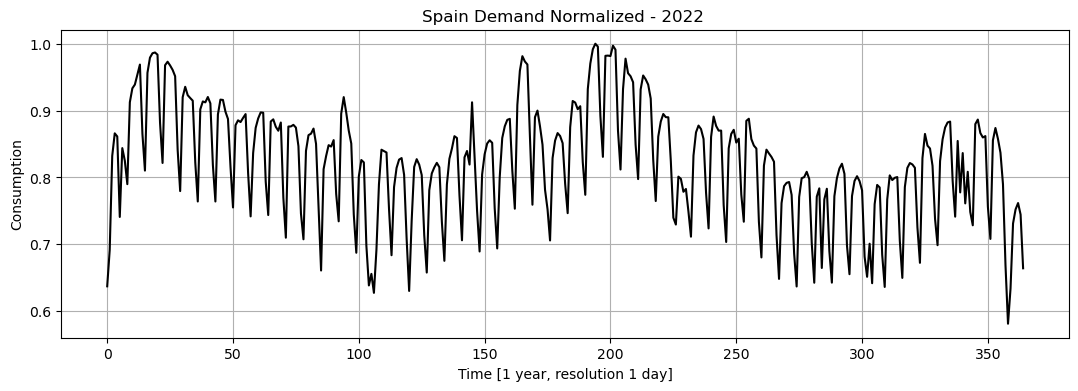

0         1         2         3         4         5         6    \
0  0.637111  0.691693  0.832215  0.865942  0.861231  0.740875  0.843837   

        7         8         9    ...       355       356       357       358  \
0  0.825099  0.789923  0.912508  ...  0.836966  0.789782  0.668655  0.581147   

        359       360       361       362       363      364  
0  0.633795  0.731112  0.752101  0.761664  0.744452  0.66406  

[1 rows x 365 columns]

In [1115]:
# Demand Input
INPUT_PATH = os.path.join(os.getcwd(),"Datos_2022.xlsx") # Path where the main input files are located
input_book = xw.Book(INPUT_PATH)
input_demand = input_book.sheets[0]
QD_h = input_demand.range('D3:D367').options(pd.DataFrame, index=False,header=False).value.astype(float)
QD_h_norm=QD_h/QD_h.max()
QD_Total=QD_h_norm*Q_D

plt.figure(figsize=(13,4))
plt.plot(QD_h_norm, color='black')
plt.xlabel("Time [1 year, resolution 1 day]")
plt.ylabel("Consumption")
plt.title("Spain Demand Normalized - 2022 ")
plt.grid()
#plt.xlim(0, 60)
plt.show()

QD_norm=QD_h_norm.T
QD_norm

## Wind generation data

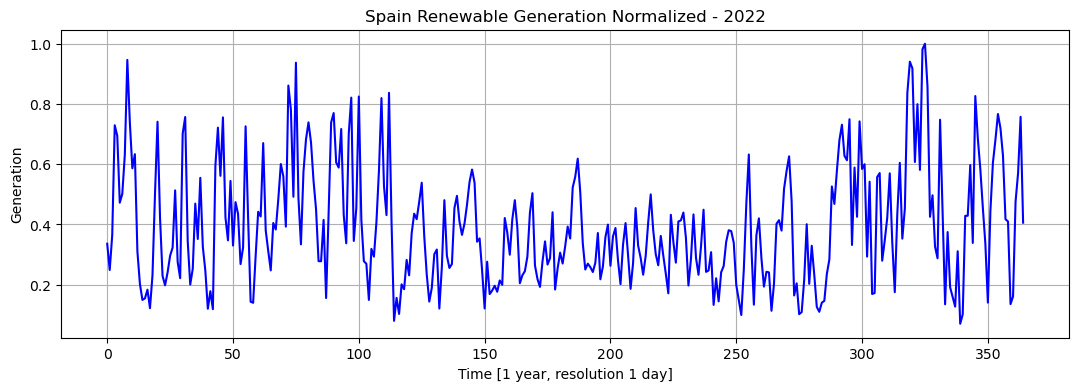

0         1         2         3        4         5         6    \
0  0.33597  0.248763  0.365005  0.729196  0.69434  0.472218  0.501494   

        7         8        9    ...       355       356      357       358  \
0  0.631032  0.946268  0.73807  ...  0.719292  0.628509  0.41728  0.409941   

        359       360       361       362       363       364  
0  0.135408  0.160751  0.475425  0.570369  0.757321  0.405872  

[1 rows x 365 columns]

In [1116]:
# Renewable Generation Input
input_generation = input_book.sheets[0]
QW_h = input_generation.range('L3:L367').options(pd.DataFrame, index=False,header=False).value.astype(float)
QW_h_norm=QW_h/QW_h.max()
QW_norm=QW_h_norm.T

plt.figure(figsize=(13,4))
plt.plot(QW_h_norm, color='blue')
plt.xlabel("Time [1 year, resolution 1 day]")
plt.ylabel("Generation")
plt.title("Spain Renewable Generation Normalized - 2022")
plt.grid()
plt.show()

QW_norm=QW_h_norm.T
QW_norm


## Solar Generation data

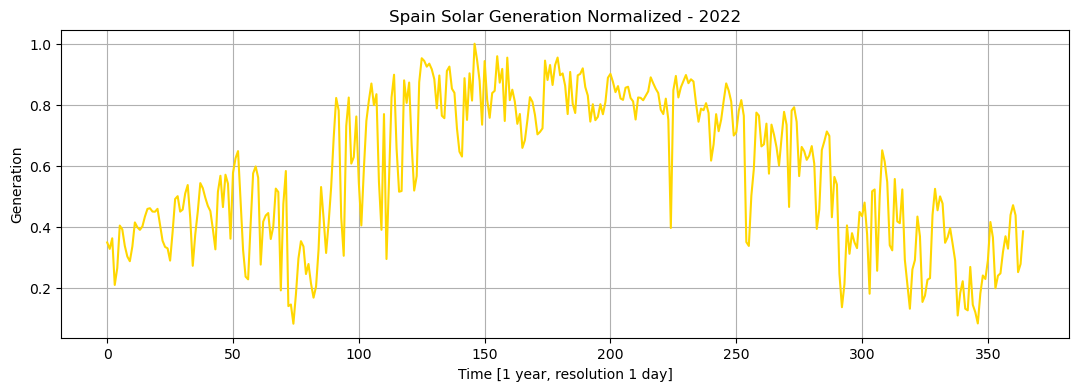

0         1         2         3         4         5         6    \
0  0.350109  0.329029  0.363664  0.211209  0.266475  0.405275  0.392701   

        7         8         9    ...      355       356       357       358  \
0  0.338833  0.304174  0.288769  ...  0.24908  0.319014  0.370474  0.329868   

        359       360       361       362       363       364  
0  0.439941  0.472065  0.439002  0.252981  0.279761  0.386543  

[1 rows x 365 columns]

In [1117]:
input_solar = input_book.sheets[0]
QPV_h = input_solar.range('M3:M367').options(pd.DataFrame, index=False,header=False).value.astype(float)
QPV_h_norm=QPV_h/QPV_h.max()
QPV_norm=QPV_h_norm.T

plt.figure(figsize=(13,4))
plt.plot(QPV_h_norm, color='gold')
plt.xlabel("Time [1 year, resolution 1 day]")
plt.ylabel("Generation")
plt.title("Spain Solar Generation Normalized - 2022")
plt.grid()
plt.show()

QPV_norm=QPV_h_norm.T
QPV_norm


## Thermal Generation data

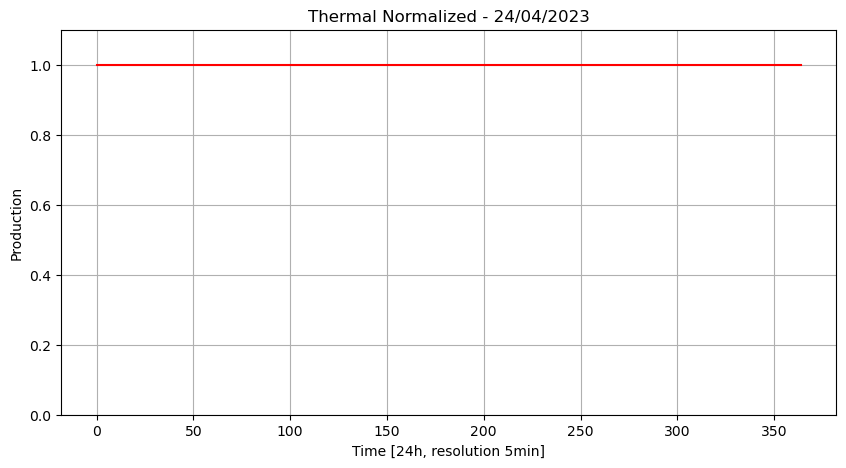

In [1118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a new DataFrame with size 288x1 filled with 1s
QTH_h_norm = pd.DataFrame(np.ones((365, 1)))

# Transpose the DataFrame
QTH_norm = QTH_h_norm.T

plt.figure(figsize=(10,5))
plt.plot(QTH_h_norm, color = 'red')
plt.ylim(0,1.1)
plt.xlabel("Time [24h, resolution 5min]")
plt.ylabel("Production")
plt.title("Thermal Normalized - 24/04/2023")
plt.grid()
plt.show()


# 10. Long Term Economic Dispatch Model

In [1119]:
def economic_dispatch_model2(ND, NG_W, NG_PV, NG_TH, NT, C_W, C_PV, C_TH, C_ENS, QD_norm, QW_norm, QPV_norm, QTH_norm, Q_D, Q_W, Q_PV, Q_TH): #Updated including QT_h_norm and QT, and sorting
    
    # Create optimization model
    model = gp.Model("ED_model2")
    model.setParam(GRB.Param.MIPGap, 0.00001)

    # VARIABLES DEFINITION
    # Generators
    v_w = model.addMVar(shape=(NG_W, NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_w")
    v_pv = model.addMVar(shape=(NG_PV, NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_pv")
    v_th = model.addMVar(shape=(NG_TH, NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_th") #updated the names of variables, for convention please named the variables always using lowercase
    #ENS
    v_ens = model.addMVar(shape=(1,NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_ens")#updated the shape of matrix variable (NT,1)

        
   # CONSTRAINTS DEFINITION
    for t in range(NT):
        for g in range(NG_W):
            model.addConstr(v_w[g, t] <= QW_norm.iloc[g,t] * Q_W, name="Wind_Capacity_"+ str(g)+"_"+str(t))  #v_W_g, t ≤ Q_W_h_norm_g, t * Q_W
            
    for t in range(NT):
        for g in range(NG_PV):    
            model.addConstr(v_pv[g, t] <= QPV_norm.iloc[g,t] * Q_PV, name="PV_Capacity_"+str(g)+"_"+str(t)) #v_PV_g, t ≤ Q_PV_h_norm_g, t * Q_PV # updated v_pv[:,t] instead of v_pv[0,t] because with the ":" the constraint is valid for any number of generators otherwise the constrain will consider only 1 generator
    
    for t in range(NT):
        for g in range(NG_TH):  
            model.addConstr(v_th[g, t] <= QTH_norm.iloc[g,t] * Q_TH, name="Thermal_Capacity_"+str(g)+"_"+str(t)) #v_t_g, t ≤ Q_W_h_norm_g, t*Q_T #updated
    
    for t in range(NT):    
        model.addConstr(sum(v_w[g, t] for g in range(NG_W))  + sum(v_pv[g, t] for g in range(NG_PV)) + sum(v_th[g, t] for g in range(NG_TH)) + v_ens[:,t] == sum(QD_norm.iloc[d,t] * Q_D for d in range(ND)), name="Power_Balance_" + str(t)) #∑_g ( v_PV_g, t + v_W_g, t + v_t_g, t) + v_ENS_t = QD_h_norm_t * QD

    
    # OBJECTIVE FUNCTION
    model.setObjective(sum(sum(C_W * v_w[g, t] for g in range(NG_W)) + sum(C_PV * v_pv[g, t] for g in range(NG_PV)) + sum(C_TH.iloc[g, 0] + C_TH.iloc[g, 1] * v_th[g, t] + C_TH.iloc[g, 2] * v_th[g, t] * v_th[g, t] for g in range(NG_TH)) + C_ENS * v_ens[:,t] for t in range(NT)),GRB.MINIMIZE)
    #min ∑_t (∑_g (C_PV * v_PV_g, t + C_W * v_W_g, t + (C_T_a + C_T_b * v_t_g, t + C_T_c * (v_t_g, t) * (v_t_g, t) ) + C_ENS * v_ENS_t)
    
    
    # Solve multi-scenario model
    model.optimize()

    
    Obj_value = model.objVal


    #Calculations after optimization
    #Value of generation dispatch
    v_w_df = pd.DataFrame(v_w.X, index=list(range(NG_W)), columns=list(range(NT)))
    v_pv_df = pd.DataFrame(v_pv.X, index=list(range(NG_PV)), columns=list(range(NT)))
    v_th_df = pd.DataFrame(v_th.X, index=list(range(NG_TH)), columns=list(range(NT)))
    v_ens_df = pd.DataFrame(v_ens.X, index=["ENS"], columns=list(range(NT)))
    #vPG_df = pd.concat([v_t_df, v_PV_df, v_W_df])
    
    #Cost values
    total_cost=model.objVal
    w_cost= sum(sum(C_W * v_w.X[g, t] for g in range(NG_W)) for t in range(NT))
    pv_cost= sum(sum(C_PV * v_pv.X[g, t] for g in range(NG_PV)) for t in range(NT))
    th_cost= sum(sum((C_TH.iloc[g, 0] + C_TH.iloc[g, 1] * v_th.X[g, t] + C_TH.iloc[g, 2] * v_th.X[g, t] * v_th.X[g, t] for g in range(NG_TH))) for t in range(NT))
    ens_cost= sum(C_ENS * v_ens.X[0,t] for t in range(NT))
    
    #To compute marginal cost using the power balance constraint
    marginal_costs=[]#initialization of a list to save the dual variables
    for c in model.getConstrs(): #get all constraints of the model
        if ((c.ConstrName).startswith ("Power_Balance_")): #select only the constraints of power balance 
            marginal_costs.append(c.Pi) #Add only dual variables of power balance constraint in margina_cost
    marginal_costs_df = pd.DataFrame(marginal_costs)#marginal cost in dataframe format
    
    return Obj_value, v_w_df, v_pv_df, v_th_df, v_ens_df, total_cost, w_cost, pv_cost, th_cost, ens_cost, marginal_costs_df




# 11. Call of Long Term Economic Dispatch function

In [1120]:
Obj_value, v_w_df, v_pv_df, v_th_df, v_ens_df, total_cost, w_cost, pv_cost, th_cost, ens_cost, marginal_costs_df = economic_dispatch_model2(ND, NG_W, NG_PV, NG_TH, NT, C_W, C_PV, C_TH, C_ENS, QD_norm, QW_norm, QPV_norm, QTH_norm, Q_D, Q_W, Q_PV, Q_TH)

Set parameter MIPGap to value 1e-05
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1460 rows, 1460 columns and 2555 nonzeros
Model fingerprint: 0x9c349698
Model has 365 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 8e+03]
  QObjective range [2e-02, 2e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+04]
Presolve removed 1095 rows and 0 columns
Presolve time: 0.02s
Presolved: 365 rows, 1460 columns, 1460 nonzeros
Presolved model has 365 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 0.000e+00
 Factor NZ  : 3.650e+02 (roughly 1 MB of memory)
 Factor Ops : 3.650e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter      

# 12. Long term results analysis

## Wind data analysis

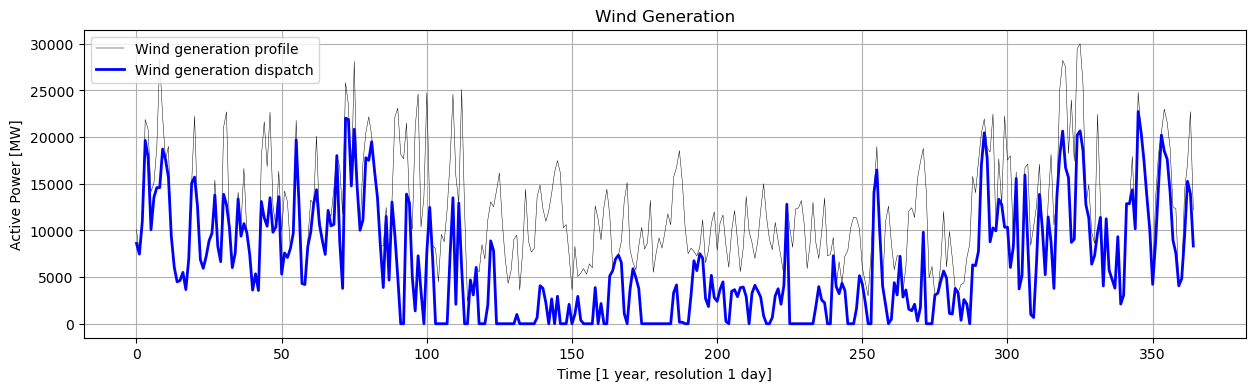

In [1121]:
#Wind generation analysis
w_ini = (QW_norm*Q_W).T
w_final = (v_w_df).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
ax.plot(x, w_ini, linewidth=1.0/3, label="Wind generation profile", color="black")  
ax.plot(x, w_final, linewidth=2.0, label="Wind generation dispatch", color="blue")
ax.legend(loc='upper left')
ax.set_title("Wind Generation")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(15, 4)
plt.show()


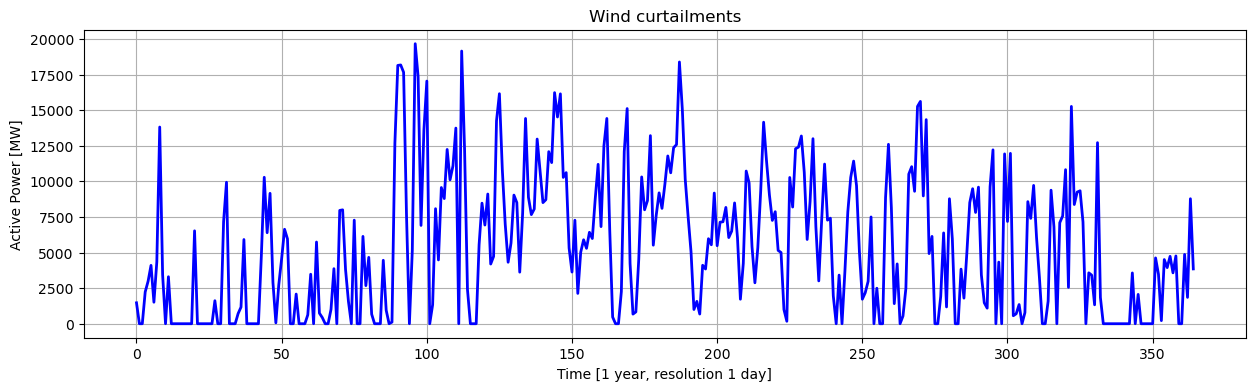

0             1             2            3            4    \
0  1469.039843  1.818989e-11  2.000888e-11  2233.882107  2987.509863   

           5            6            7            8            9    ...  \
0  4098.540055  1510.745054  4342.988004  13815.56909  3429.924112  ...   

           355          356          357         358           359  \
0  3942.155582  4732.234774  3572.978045  4759.87069  2.773959e-11   

            360          361          362          363          364  
0  2.000888e-11  4869.794454  1850.579533  8778.918422  3850.647128  

[1 rows x 365 columns]

In [1122]:
vv_w = w_ini - w_final

fig, ax = plt.subplots()
  
ax.plot(x, vv_w, linewidth=2.0 , color="blue")

ax.set_title("Wind curtailments")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(15, 4)
plt.show()

vv_w.T

In [1167]:
import pandas as pd
import locale
from IPython.display import display

# Set locale
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

# Calculate the summed values
total_dispatched_generation = w_final.sum().sum()*24
total_curtailment = (w_ini - w_final).abs().sum().sum()*24

# Create a dataframe to display as a table
data = {
    'Annual Wind Curtailments [MWh]': [locale.format_string('%1.2f ', total_curtailment, True)],
    'Wind Annaul Dispatched Generation [MWh]': [locale.format_string('%1.2f ', total_dispatched_generation, True)]
}

df = pd.DataFrame(data)

# Style the DataFrame
styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_df)


## Solar data analysis

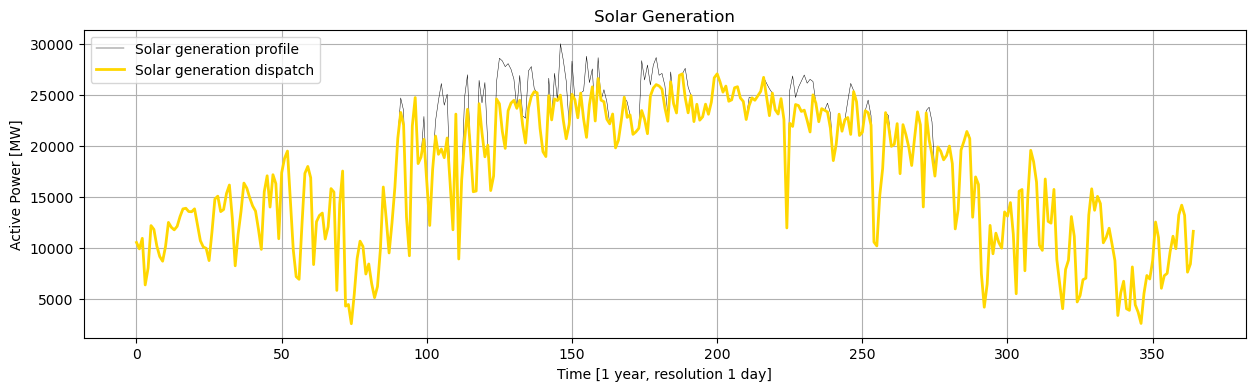

In [1124]:
pv_ini = (QPV_norm*Q_PV).T
pv_final = (v_pv_df).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
ax.plot(x, pv_ini, linewidth=1.0/3, label="Solar generation profile", color="black")  
ax.plot(x, pv_final, linewidth=2.0, label="Solar generation dispatch", color="gold")
ax.legend(loc='upper left')
ax.set_title("Solar Generation")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(15, 4)
plt.show()

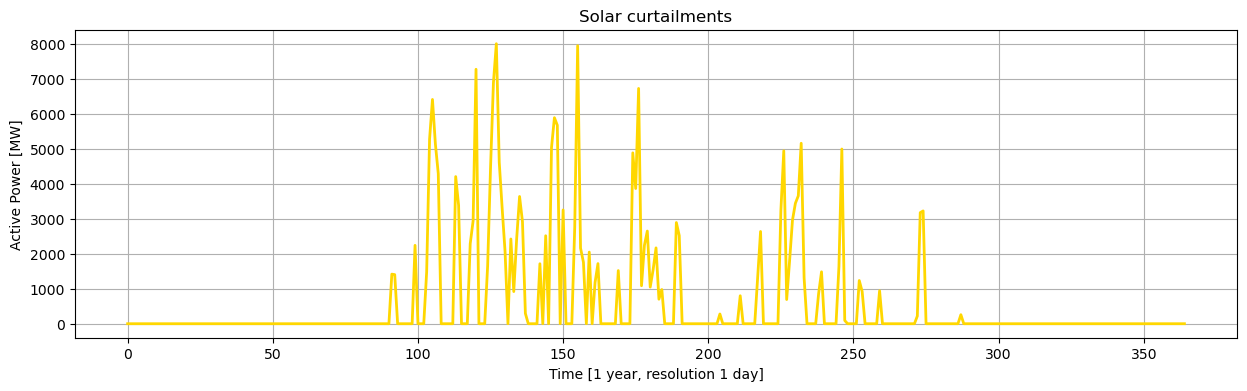

0             1             2            3            4    \
0  1469.039843  1.818989e-11  2.000888e-11  2233.882107  2987.509863   

           5            6            7            8            9    ...  \
0  4098.540055  1510.745054  4342.988004  13815.56909  3429.924112  ...   

           355          356          357         358           359  \
0  3942.155582  4732.234774  3572.978045  4759.87069  2.773959e-11   

            360          361          362          363          364  
0  2.000888e-11  4869.794454  1850.579533  8778.918422  3850.647128  

[1 rows x 365 columns]

In [1125]:
vv_pv = pv_ini - pv_final

fig, ax = plt.subplots()
  
ax.plot(x, vv_pv, linewidth=2.0 , color="gold")

ax.set_title("Solar curtailments")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(15, 4)
plt.show()

vv_w.T

In [1168]:
import pandas as pd
import locale
from IPython.display import display

# Set locale
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

# Calculate the summed values
total_dispatched_generation = pv_final.sum().sum()*24
total_curtailment = (pv_ini - pv_final).abs().sum().sum()*24

# Create a dataframe to display as a table
data = {
    'Annual Solar Curtailments [MWh]': [locale.format_string('%1.2f ', total_curtailment, True)],
    'Solar Annual Dispatched Generation [MWh]': [locale.format_string('%1.2f ', total_dispatched_generation, True)]
}

df = pd.DataFrame(data)

# Style the DataFrame
styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Oranges')

display(styled_df)


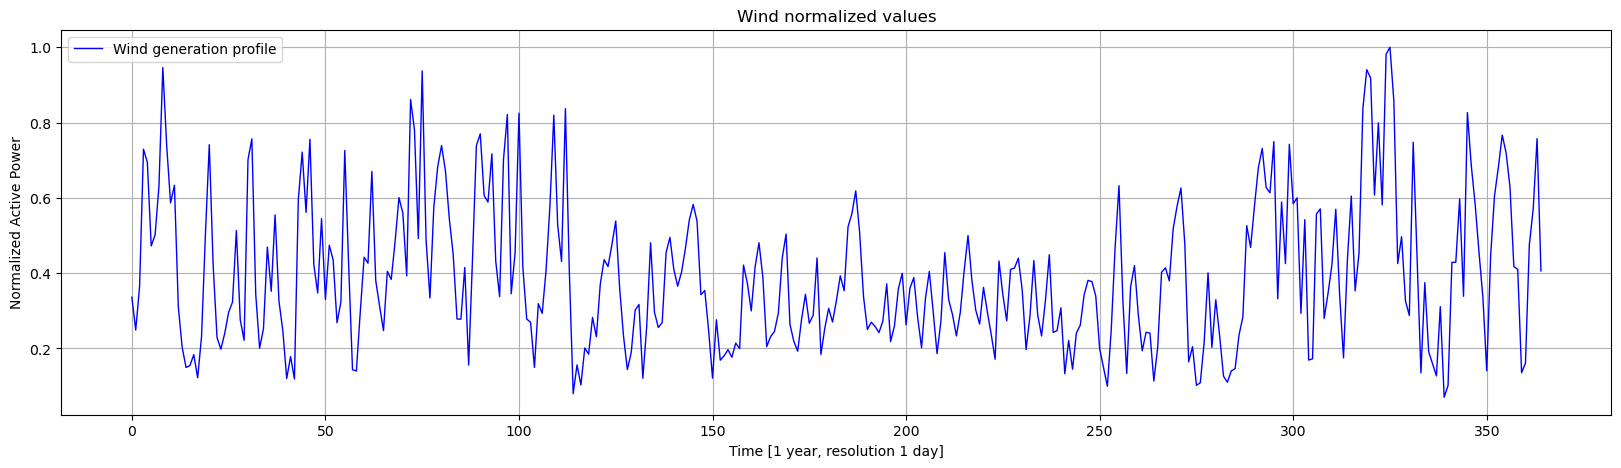

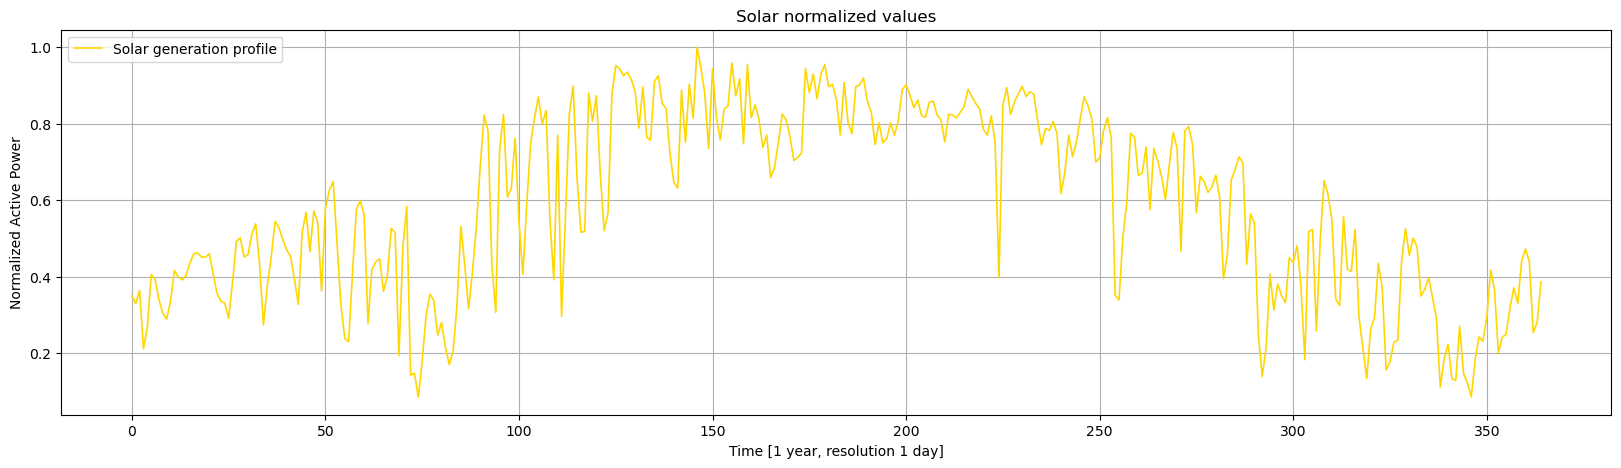

In [1127]:
# Normalizing the data
w_ini_norm = w_ini / w_ini.max()
pv_ini_norm = pv_ini / pv_ini.max()

fig, ax = plt.subplots()
ax.plot(x, w_ini_norm, linewidth=1.0, label="Wind generation profile", color="blue")
#ax.plot(x, w_final, linewidth=2.0, label="Wind generation dispatch", color="blue")
ax.legend(loc='upper left')
ax.set_title("Wind normalized values")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Normalized Active Power')
ax.grid(True)
fig.set_size_inches(20, 5)
plt.show()

fig, ax = plt.subplots()
ax.plot(x, pv_ini_norm, linewidth=1.2, label="Solar generation profile", color="gold")  
#ax.plot(x, pv_final, linewidth=2.0, label="Solar generation dispatch", color="gold")
ax.legend(loc='upper left')
ax.set_title("Solar normalized values")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Normalized Active Power')
ax.grid(True)
fig.set_size_inches(20, 5)
plt.show()


## Thermal data analysis

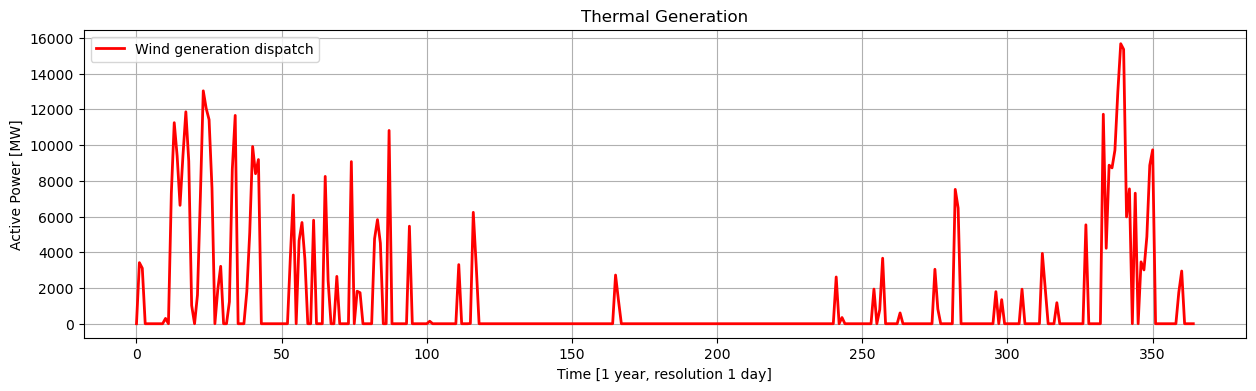

In [1128]:
#Thermal generation analysis
th_ini = (QTH_norm*Q_TH).T
th_final = (v_th_df).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
#ax.plot(x, th_ini, linewidth=1.0/3, label="Wind generation profile", color="black")  
ax.plot(x, th_final, linewidth=2.0, label="Wind generation dispatch", color="red")
ax.legend(loc='upper left')
ax.set_title("Thermal Generation")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(15, 4)
plt.show()

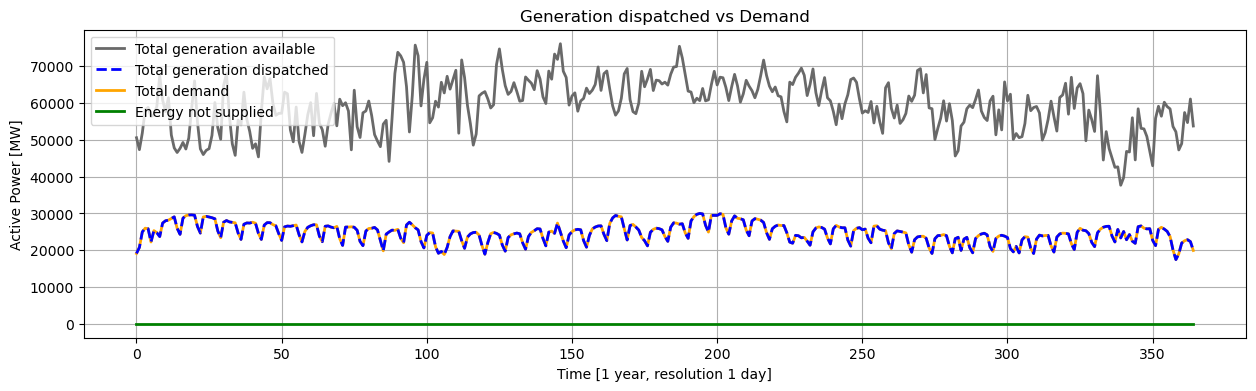

In [1129]:
#ENS data
ens = (v_ens_df).T
x = pd.DataFrame(list(range(NT)))

#Demand analysis
gen_disp = (v_w_df).T + (v_pv_df).T + (v_th_df).T #total generation dispatched
gen_available= (QW_norm*Q_W).T+(QPV_norm*Q_PV).T+(QTH_norm*Q_TH).T
demand = (QD_norm*Q_D).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()
ax.plot(x, gen_available, linewidth=2.0, label="Total generation available", color="dimgray")
ax.plot(x, gen_disp, linewidth=2.0, label="Total generation dispatched", color="blue",linestyle="dashed",zorder=10)
ax.plot(x, demand, linewidth=2.0, label="Total demand", color="orange")
ax.plot(x, ens, linewidth=2.0, label="Energy not supplied", color="green")
ax.legend(loc='upper left')
ax.set_title("Generation dispatched vs Demand")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(15, 4)
plt.show()

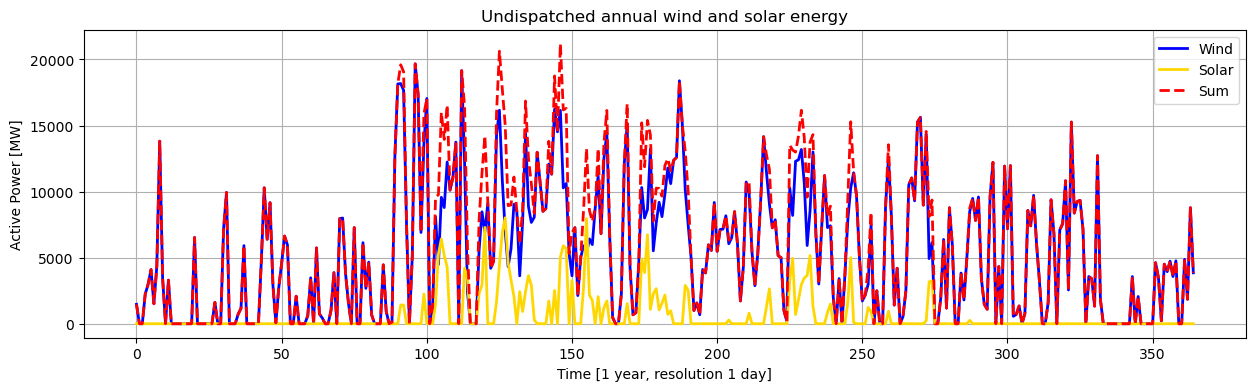

In [1130]:
# Calculation of the sum
vv_sum = vv_w + vv_pv

fig, ax = plt.subplots()

# Plotting the wind curve
ax.plot(x, vv_w, linewidth=2.0, color="blue", label='Wind')

# Plotting the solar curve
ax.plot(x, vv_pv, linewidth=2.0, color="gold", label='Solar')

# Plotting the sum curve
ax.plot(x, vv_sum, linewidth=2.0, color="red", linestyle='dashed', label='Sum')

# Setting the title and labels
ax.set_title("Undispatched annual wind and solar energy")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')

# Showing the grid
ax.grid(True)

# Setting the size of the plot
fig.set_size_inches(15, 4)

# Adding the legend
ax.legend()

# Displaying the plot
plt.show()


## Demand analysis

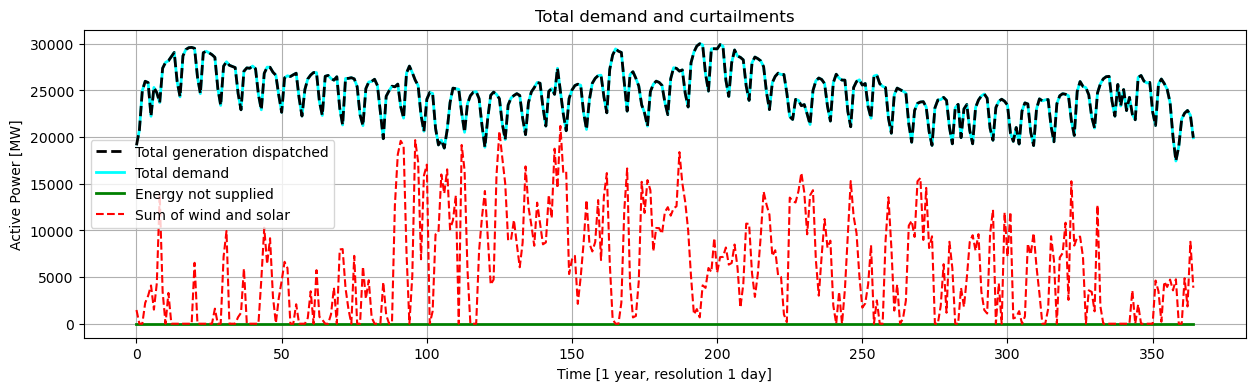

In [1131]:
fig, ax = plt.subplots()

ax.plot(x, gen_disp, linewidth=2.0, label="Total generation dispatched", color="black", linestyle="dashed", zorder=10)

ax.plot(x, demand, linewidth=2.0, label="Total demand", color="cyan")

ax.plot(x, ens, linewidth=2.0, label="Energy not supplied", color="green")

ax.plot(x, vv_sum, linewidth=1.5, color="red", linestyle='dashed', label='Sum of wind and solar')

ax.set_title("Total demand and curtailments")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')

ax.grid(True)

fig.set_size_inches(15, 4)

ax.legend()

plt.show()


## All sources data analysis

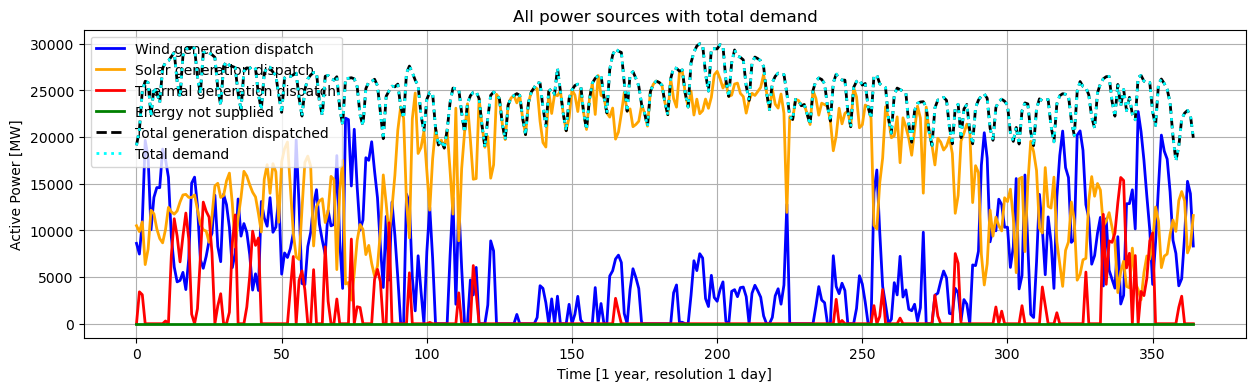

In [1132]:
fig, ax = plt.subplots()
ax.plot(x, w_final, linewidth=2.0, label="Wind generation dispatch", color="blue")
ax.plot(x, pv_final, linewidth=2.0, label="Solar generation dispatch", color="orange")
ax.plot(x, th_final, linewidth=2.0, label="Thermal generation dispatch", color="red")
ax.plot(x, ens, linewidth=2.0, label="Energy not supplied", color="green")
ax.plot(x, gen_disp, linewidth=2.0, label="Total generation dispatched", color="black",linestyle="dashed", zorder=10)
ax.plot(x, demand, linewidth=2.0, label="Total demand", color="cyan", linestyle="dotted",zorder=10)
ax.legend(loc='upper left')
ax.set_title("All power sources with total demand")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(15, 4)

plt.show()


In [1154]:
import pandas as pd
import locale
from IPython.display import display

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

total_wind_dispatch = w_final.sum().sum()*24
total_solar_dispatch = pv_final.sum().sum()*24
total_thermal_dispatch = th_final.sum().sum()*24
total_ens = ens.sum().sum()*24
total_dispatched_generation = gen_disp.sum().sum()*24
total_demand = demand.sum().sum()*24

data = {
    'Wind Annual Dispatched Generation [MWh]': [locale.format_string('%1.2f ', total_wind_dispatch, True)],
    'Solar Annual Dispatched Generation [MWh]': [locale.format_string('%1.2f ', total_solar_dispatch, True)],
    'Thermal Annual Dispatched Generation [MWh]': [locale.format_string('%1.2f ', total_thermal_dispatch, True)],
    'Energy Not Supplied [MWh]': [locale.format_string('%1.2f ', total_ens, True)],
    'Total Annual Dispatched Generation [MWh]': [locale.format_string('%1.2f ', total_dispatched_generation, True)],
    'Total Annual Demand [MWh]': [locale.format_string('%1.2f ', total_demand, True)],
}

df = pd.DataFrame(data)

styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Greens')

display(styled_df)


# 13. Long term cost analysis

## Total cost chart

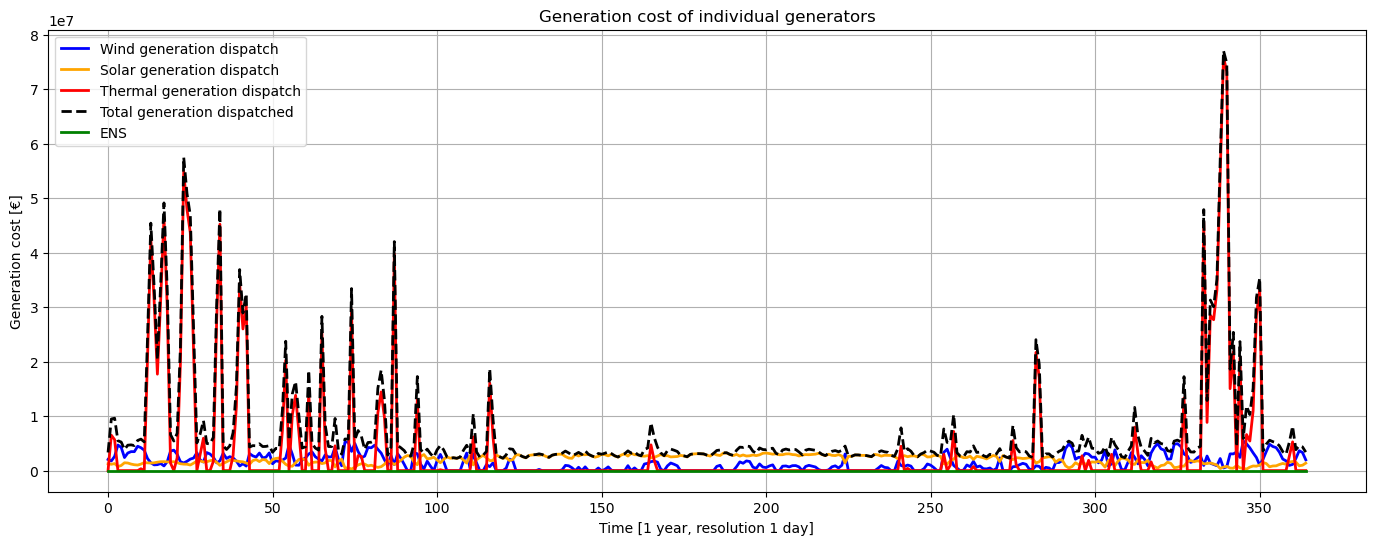

In [1155]:
w_price = w_final * C_W * 24
pv_price = pv_final * C_PV * 24
th_price = (900 + th_final * 45 + (v_th_df**2).T * 0.01) * 24
total_price = w_price + pv_price + th_price
ens_price = ens * C_ENS

fig, ax = plt.subplots()
ax.plot(x, w_price, linewidth=2.0, label="Wind generation dispatch", color="blue")
ax.plot(x, pv_price, linewidth=2.0, label="Solar generation dispatch", color="orange")
ax.plot(x, th_price, linewidth=2.0, label="Thermal generation dispatch", color="red")
ax.plot(x, total_price, linewidth=2.0, label="Total generation dispatched", color="black",linestyle="dashed",zorder=10)
ax.plot(x, ens_price, linewidth=2.0, label="ENS", color="green")

ax.legend(loc='upper left')
ax.set_title("Generation cost of individual generators")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Generation cost [€]')
ax.grid(True)
fig.set_size_inches(17, 6)

plt.show()


## Total cost bar plots

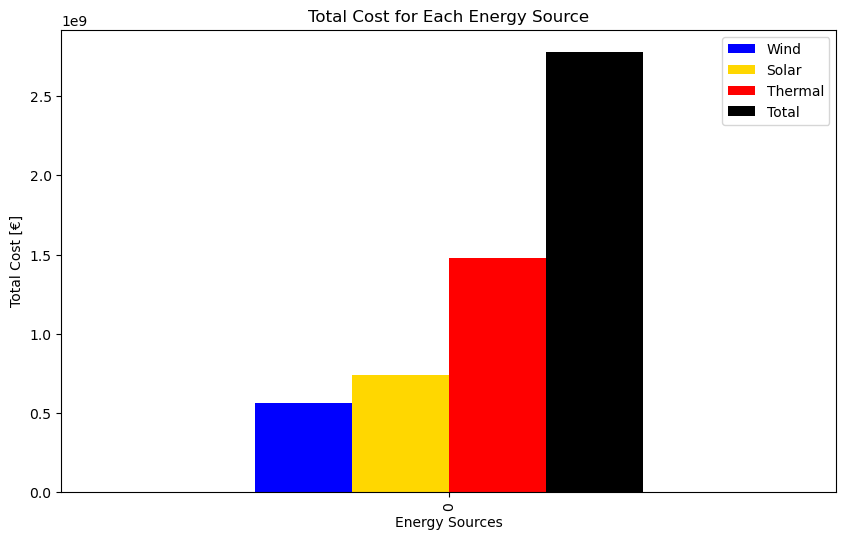

In [1156]:
import locale
import matplotlib.pyplot as plt

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

# Compute costs
w_cost = w_price.sum().sum()
pv_cost = pv_price.sum().sum()
th_cost = th_price.sum().sum()
ens_cost = ens_price.sum().sum()
generation_cost = w_cost + pv_cost + th_cost + ens_cost

# Prepare data for the plot
Summary_Cost = [w_cost, pv_cost, th_cost, generation_cost]
Summary_df_plot = pd.DataFrame([Summary_Cost], columns=['Wind','Solar','Thermal','Total'])

# Specify colors
colors = ['blue', 'gold', 'red', 'black']

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
Summary_df_plot.plot(kind='bar', ax=ax, color=colors)

# Set title and labels
ax.set_title('Total Cost for Each Energy Source')
ax.set_xlabel('Energy Sources')
ax.set_ylabel('Total Cost [€]')

# Show the plot
plt.show()

# Prepare data for the table
Summary_df = Summary_df_plot.copy().applymap(lambda x: locale.format_string("%.2f €", x, grouping=True))

# Format the table
styled_summary = Summary_df.style.set_properties(**{'text-align': 'center', 'font-size': '120%', 'border':'1px solid black', 'padding':'10px'}).set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('font-size', '120%'), ('border', '1px solid black'), ('padding', '10px')])]).background_gradient(cmap='Blues')

# Show the table
styled_summary


# 14. Monthly average values

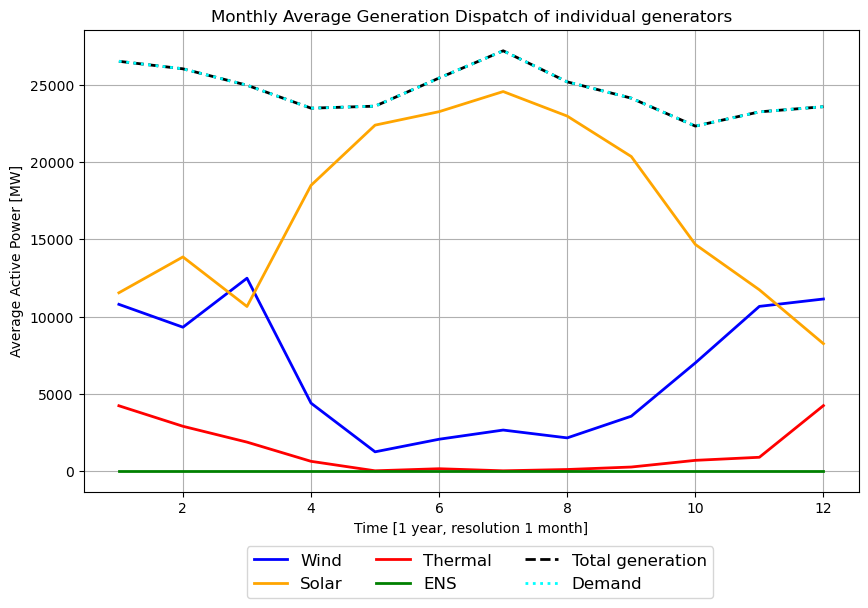

In [1157]:
import pandas as pd
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# create copies of the original lists to avoid modifying them
pv_final_copy = pv_final.copy()
w_final_copy = w_final.copy()
th_final_copy = th_final.copy()
ens_copy = ens.copy()
gen_disp_copy = gen_disp.copy()
demand_copy = demand.copy()

# lists creation holding monthly averages
pv_final_monthly = []
w_final_monthly = []
th_final_monthly = []
ens_monthly = []
gen_disp_monthly = []
demand_monthly = []

for days in days_in_month:
    
    if len(pv_final_copy) < days or len(w_final_copy) < days or len(th_final_copy) < days or len(gen_disp_copy) < days:
        print(f"Not enough data for a full month. Only {len(pv_final_copy)} days left in dataset.")
        break
    # mean of the values for each day in the month and add it to the list
    pv_final_monthly.append(pv_final_copy[:days].mean())
    w_final_monthly.append(w_final_copy[:days].mean())
    th_final_monthly.append(th_final_copy[:days].mean())
    ens_monthly.append(ens_copy[:days].mean())
    gen_disp_monthly.append(gen_disp_copy[:days].mean())
    demand_monthly.append(demand_copy[:days].mean())
    
    # remove data for previous month
    pv_final_copy = pv_final_copy[days:]
    w_final_copy = w_final_copy[days:]
    th_final_copy = th_final_copy[days:]
    ens_copy = ens_copy [days:]
    gen_disp_copy = gen_disp_copy[days:]
    demand_copy = demand_copy[days:]

# month numbers
x = range(1, len(w_final_monthly) + 1)

fig, ax = plt.subplots()
ax.plot(x, w_final_monthly, linewidth=2.0, label="Wind", color="blue")
ax.plot(x, pv_final_monthly, linewidth=2.0, label="Solar", color="orange")
ax.plot(x, th_final_monthly, linewidth=2.0, label="Thermal", color="red")
ax.plot(x, ens_monthly, linewidth=2.0, label="ENS", color="green")
ax.plot(x, gen_disp_monthly, linewidth=2.0, label="Total generation", color="black", linestyle="dashed",zorder=10)
ax.plot(x, demand_monthly, linewidth=2.0, label="Demand", color="cyan", linestyle="dotted", zorder=10)

ax.legend(loc='upper left', bbox_to_anchor=(0.2, -0.1), fontsize='large', ncol=3)
ax.set_title("Monthly Average Generation Dispatch of individual generators")
ax.set_xlabel('Time [1 year, resolution 1 month]')
ax.set_ylabel('Average Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 6)

plt.show()

# Convert lists to a dictionary
data = {
    'Month': range(1, len(w_final_monthly) + 1),
    'Average Wind Dispatch (MW)': w_final_monthly,
    'Average Solar Dispatch (MW)': pv_final_monthly,
    'Average Thermal Dispatch (MW)': th_final_monthly,
    'Average ENS (MW)': ens_monthly,
    'Average Total Dispatched (MW)': gen_disp_monthly,
    'Average Demand (MW)': demand_monthly
}

# DataFrame from the dictionary
df = pd.DataFrame(data)

df = df.set_index('Month').T

df = df.applymap(lambda x: locale.format_string("%.2f", x, grouping=True))

styled_df = df.style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Greens')

styled_df




## Total generation dispatch

In [1158]:
import pandas as pd
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

sum_data = {
    'Category': ['Wind', 'Solar', 'Thermal', 'ENS', 'Generators', 'Demand'],
    'Sum Value': [
        sum(w_final_monthly),
        sum(pv_final_monthly),
        sum(th_final_monthly),
        sum(ens_monthly),
        sum(gen_disp_monthly),
        sum(demand_monthly)
    ]
}

df_sum = pd.DataFrame(sum_data)

df_sum['Sum Value'] = df_sum['Sum Value'].apply(lambda x: locale.format_string("%.2f", x, grouping=True))

styled_df_sum = df_sum.style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Greens')

styled_df_sum


## Average monthly wind cost

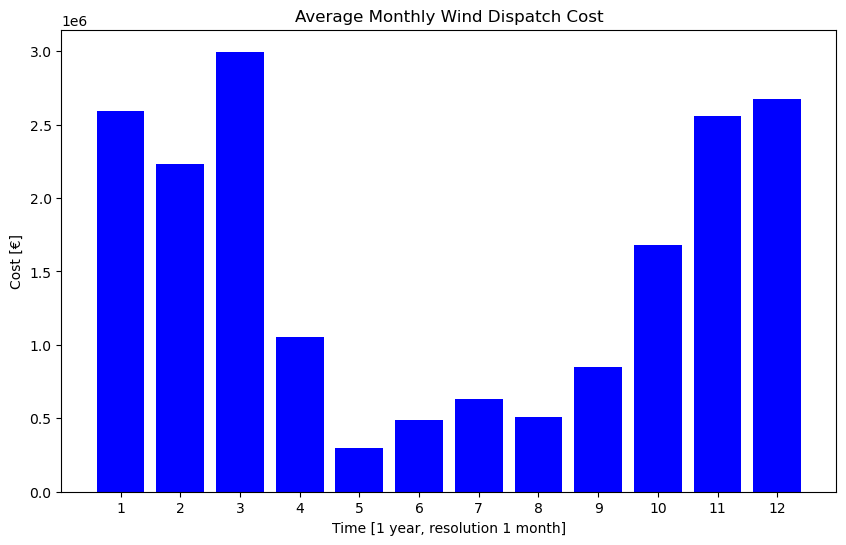

In [1159]:
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

w_price_monthly = [] # Empty list to hold values (monthly average)

start_idx = 0  #start index

for days in days_per_month:
    end_idx = start_idx + days # end index
    w_price_monthly.append(w_price.values[start_idx:end_idx].mean()) # mean for the month and add to list
    start_idx = end_idx # Update start index for the next month

w_price_monthly = np.array(w_price_monthly)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, 13), w_price_monthly, color='blue')
ax.set_title("Average Monthly Wind Dispatch Cost")
ax.set_xlabel('Time [1 year, resolution 1 month]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 13))  
plt.show()


## Average monthly solar cost

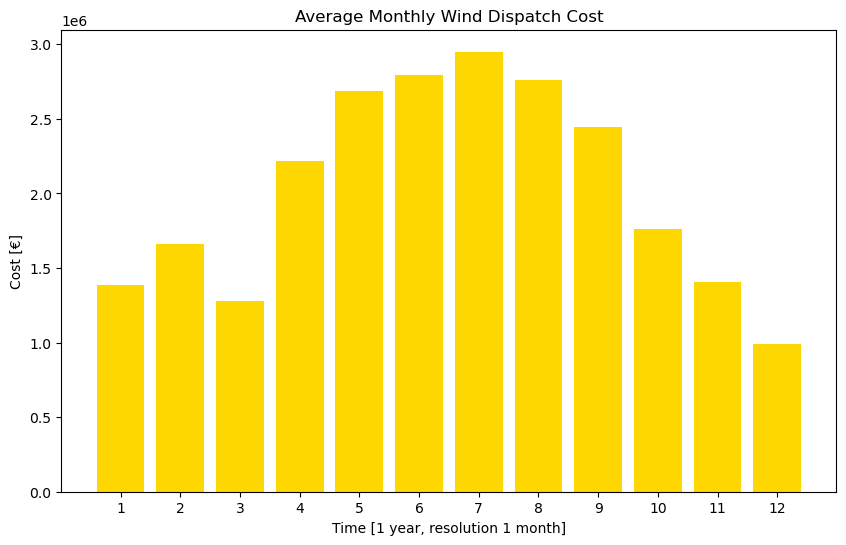

In [1160]:
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

pv_price_monthly = [] # Empty list to hold values (monthly average)

start_idx = 0  #start index

for days in days_per_month:
    end_idx = start_idx + days # end index
    pv_price_monthly.append(pv_price.values[start_idx:end_idx].mean()) # mean for the month and add to list
    start_idx = end_idx # Update start index for the next month

pv_price_monthly = np.array(pv_price_monthly)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, 13), pv_price_monthly, color='gold')
ax.set_title("Average Monthly Wind Dispatch Cost")
ax.set_xlabel('Time [1 year, resolution 1 month]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 13))  
plt.show()




## Average monthly thermal cost

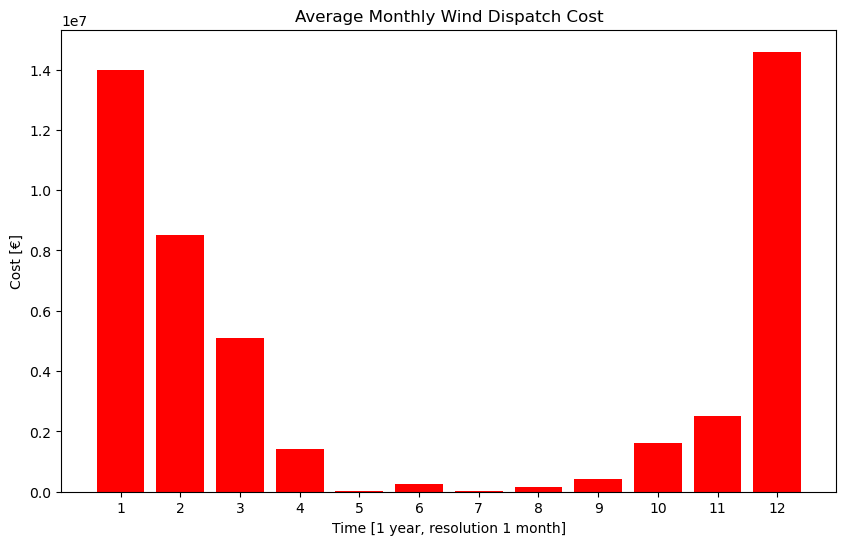

In [1161]:
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

th_price_monthly = [] # Empty list to hold values (monthly average)

start_idx = 0  #start index

for days in days_per_month:
    end_idx = start_idx + days # end index
    th_price_monthly.append(th_price.values[start_idx:end_idx].mean()) # mean for the month and add to list
    start_idx = end_idx # Update start index for the next month

th_price_monthly = np.array(th_price_monthly)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, 13), th_price_monthly, color='red')
ax.set_title("Average Monthly Wind Dispatch Cost")
ax.set_xlabel('Time [1 year, resolution 1 month]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 13))  
plt.show()


## Average monthly total cost

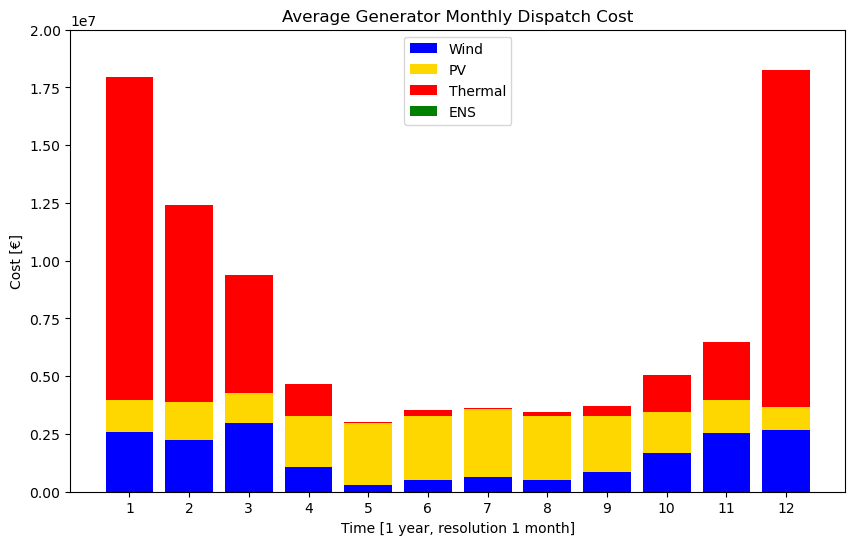

In [1162]:
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

w_price_monthly = []
pv_price_monthly = []
th_price_monthly = []
ens_price_monthly = []

start_idx = 0

for days in days_per_month:
    end_idx = start_idx + days
    w_price_monthly.append(w_price.values[start_idx:end_idx].mean())
    pv_price_monthly.append(pv_price.values[start_idx:end_idx].mean())
    th_price_monthly.append(th_price.values[start_idx:end_idx].mean())
    ens_price_monthly.append(ens_price.values[start_idx:end_idx].mean())
    start_idx = end_idx

w_price_monthly = np.array(w_price_monthly)
pv_price_monthly = np.array(pv_price_monthly)
th_price_monthly = np.array(th_price_monthly)
ens_price_monthly = np.array(ens_price_monthly)

cumulative_bottom_1 = np.add(w_price_monthly, pv_price_monthly)
cumulative_bottom_2 = np.add(cumulative_bottom_1, th_price_monthly)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(range(1, 13), w_price_monthly, color='blue', label='Wind')
ax.bar(range(1, 13), pv_price_monthly, bottom=w_price_monthly, color='gold', label='PV')
ax.bar(range(1, 13), th_price_monthly, bottom=cumulative_bottom_1, color='red', label='Thermal')
ax.bar(range(1, 13), ens_price_monthly, bottom=cumulative_bottom_2, color='green', label='ENS')

ax.set_title("Average Generator Monthly Dispatch Cost")
ax.set_xlabel('Time [1 year, resolution 1 month]')
ax.set_ylabel('Cost [€]')
ax.set_xticks(range(1, 13))  
ax.legend()  

ax.set_ylim([0, 20000000])
plt.show()


import pandas as pd
import locale

total_price_monthly = w_price_monthly + pv_price_monthly + th_price_monthly + ens_price_monthly

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

data = {
    'Month': range(1, len(w_price_monthly) + 1),
    'Average Wind Dispatch Cost': w_price_monthly,
    'Average Solar Dispatch Cost': pv_price_monthly,
    'Average Thermal Dispatch Cost': th_price_monthly,
   #'Average ENS Dispatch Cost': ens_price_monthly,
    'Average Total Dispatch Cost': total_price_monthly
}

df = pd.DataFrame(data)

df = df.set_index('Month').T

df = df.applymap(lambda x: locale.format_string("%.2f €", x, grouping=True))

styled_df = df.style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Greens')

styled_df



## Average monthly total cost per MWH

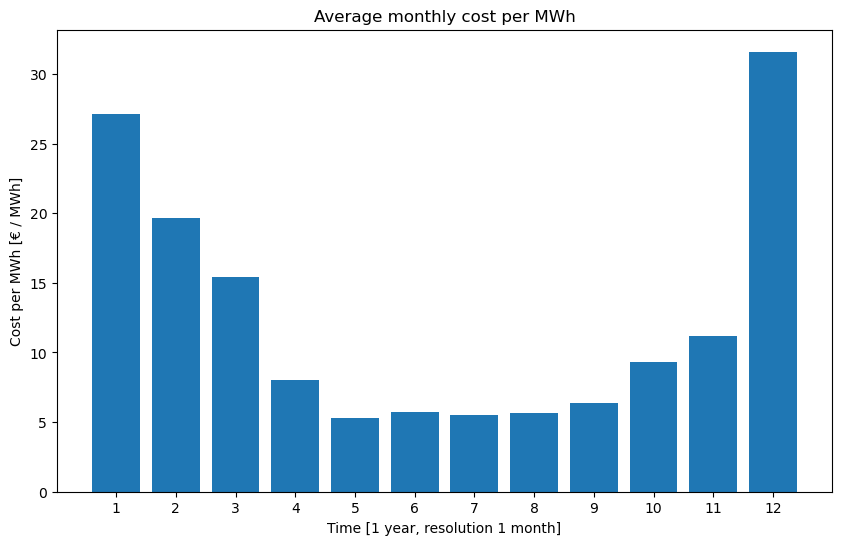

In [1163]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import locale
from IPython.display import display

w_price = w_final * C_W
pv_price = pv_final * C_PV 
th_price = 900 + th_final * 45 + (v_th_df**2).T * 0.01
ens_price = ens * C_ENS

cost_per_mwh_5min_df = pd.DataFrame()

small_value = 1e-5  # avoid division by 0

cost_per_mwh_5min_df['Wind Cost per MWh'] = w_price.sum(axis=1) / (w_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['Solar Cost per MWh'] = pv_price.sum(axis=1) / (pv_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['Thermal Cost per MWh'] = th_price.sum(axis=1) / (th_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['ENS Cost per MWh'] = ens_price.sum(axis=1) / (ens.sum(axis=1) + small_value)

total_dispatch_cost_5min = w_price.sum(axis=1) + pv_price.sum(axis=1) + th_price.sum(axis=1) + ens_price.sum(axis=1)  # Total cost
total_production_5min = w_final.sum(axis=1) + pv_final.sum(axis=1) + th_final.sum(axis=1) + ens.sum(axis=1)  # Total production

cost_per_mwh_5min_df['Total Cost per MWh'] = total_dispatch_cost_5min / (total_production_5min + small_value)

month_lengths = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

cost_per_mwh_monthly_df = cost_per_mwh_5min_df.groupby(np.repeat(range(1, 13), month_lengths)).mean()

total_cost_per_mwh_monthly = cost_per_mwh_monthly_df['Total Cost per MWh']

plt.figure(figsize=(10,6))
plt.bar(total_cost_per_mwh_monthly.index, total_cost_per_mwh_monthly.values)
plt.xlabel('Time [1 year, resolution 1 month]')
plt.ylabel('Cost per MWh [€ / MWh]')
plt.title('Average monthly cost per MWh')
plt.xticks(range(1, 13))  
plt.show()

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

styled_df = cost_per_mwh_monthly_df.style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
)

styled_df.format(lambda x: "{:,.2f}".format(x).replace(",", "x").replace(".", ",").replace("x", ".") + " €")

display(styled_df)


## Average total cost per MWh

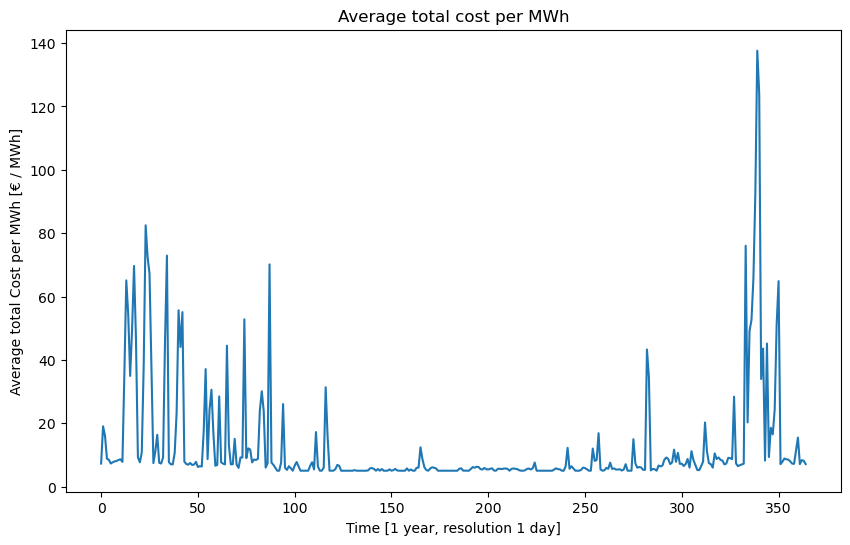

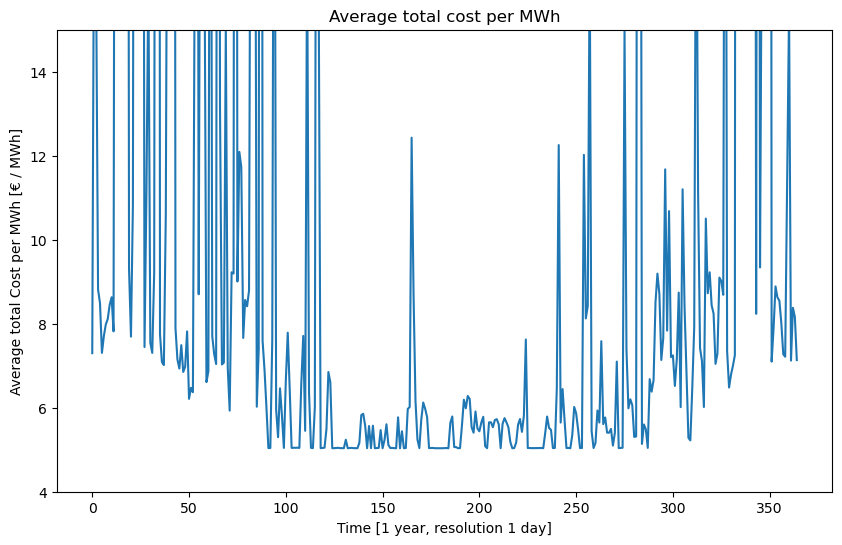

In [1164]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import locale
from IPython.display import display

w_price = w_final * C_W
pv_price = pv_final * C_PV 
th_price = 900 + th_final * 45 + (v_th_df**2).T * 0.01
ens_price = ens * C_ENS

cost_per_mwh_5min_df = pd.DataFrame()

small_value = 1e-5  # avoid division by 0


cost_per_mwh_5min_df['Wind Cost per MWh'] = w_price.sum(axis=1) / (w_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['Solar Cost per MWh'] = pv_price.sum(axis=1) / (pv_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['Thermal Cost per MWh'] = th_price.sum(axis=1) / (th_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['ENS Cost per MWh'] = ens_price.sum(axis=1) / (ens.sum(axis=1) + small_value)

total_dispatch_cost_5min = w_price.sum(axis=1) + pv_price.sum(axis=1) + th_price.sum(axis=1) + ens_price.sum(axis=1)  # Total cost
total_production_5min = w_final.sum(axis=1) + pv_final.sum(axis=1) + th_final.sum(axis=1) + ens.sum(axis=1)  # Total production

cost_per_mwh_5min_df['Total Cost per MWh'] = total_dispatch_cost_5min / (total_production_5min + small_value)


total_cost_per_mwh_24h = cost_per_mwh_5min_df['Total Cost per MWh'][:365]

plt.figure(figsize=(10,6))
plt.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values)
plt.xlabel('Time [1 year, resolution 1 day]')
plt.ylabel('Average total Cost per MWh [€ / MWh]')
plt.title('Average total cost per MWh')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values)
plt.xlabel('Time [1 year, resolution 1 day]')
plt.ylabel('Average total Cost per MWh [€ / MWh]')
plt.title('Average total cost per MWh') 
plt.ylim(4, 15) 
plt.show()




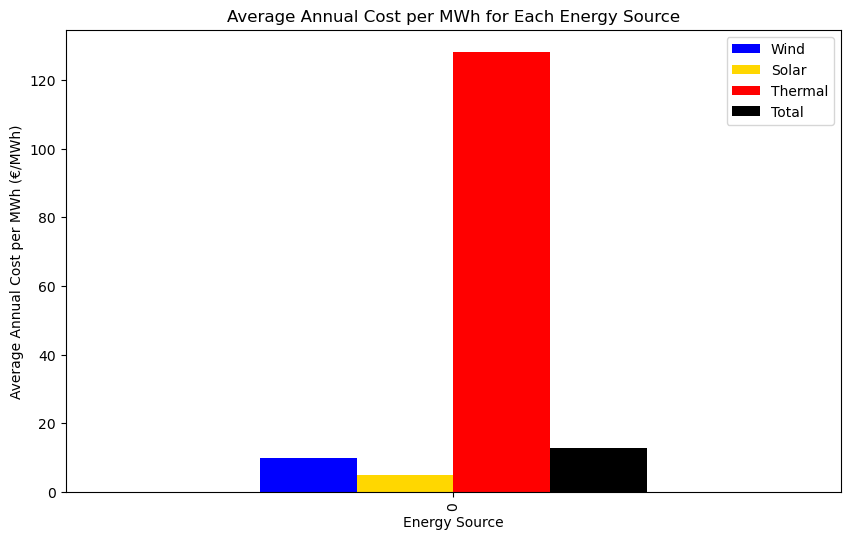

In [1166]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

# Compute total annual costs
w_cost = w_price.sum().sum()*24
pv_cost = pv_price.sum().sum()*24
th_cost = th_price.sum().sum()*24
ens_cost = ens_price.sum().sum()*24
generation_cost = w_cost + pv_cost + th_cost + ens_cost

# Compute total annual dispatched generation
total_w_dispatch = w_final.sum().sum()*24
total_pv_dispatch = pv_final.sum().sum()*24
total_th_dispatch = th_final.sum().sum()*24
total_dispatched_generation = gen_disp.sum().sum()*24

# Calculate annual average costs
avg_cost_w = w_cost / total_w_dispatch
avg_cost_pv = pv_cost / total_pv_dispatch
avg_cost_th = th_cost / total_th_dispatch
avg_cost_total = generation_cost / total_dispatched_generation

# Prepare data
Unified_df = pd.DataFrame({'Total Annual Cost (€)': [w_cost, pv_cost, th_cost, generation_cost],
                           'Total Annual Dispatched Generation (MWh)': [total_w_dispatch, total_pv_dispatch, total_th_dispatch, total_dispatched_generation],
                           'Average Annual Cost per MWh (€/MWh)': [avg_cost_w, avg_cost_pv, avg_cost_th, avg_cost_total]},
                          index=['Wind','Solar','Thermal','Total'])

fig, ax = plt.subplots(figsize=(10,6))

colors = ['blue', 'gold', 'red', 'black']

Avg_Cost_values = Unified_df['Average Annual Cost per MWh (€/MWh)'].values

Avg_Cost_df_plot = pd.DataFrame([Avg_Cost_values], columns=Unified_df.index)

Avg_Cost_df_plot.plot(kind='bar', ax=ax, color=colors)

ax.set_title('Average Annual Cost per MWh for Each Energy Source')
ax.set_xlabel('Energy Source')
ax.set_ylabel('Average Annual Cost per MWh (€/MWh)')

plt.show()

Unified_df = Unified_df.applymap(lambda x: locale.format_string("%.2f", x, grouping=True))
styled_df = Unified_df.style.set_properties(**{'text-align': 'center', 'font-size': '120%', 'border':'1px solid black', 'padding':'10px'}).set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('font-size', '120%'), ('border', '1px solid black'), ('padding', '10px')])]).background_gradient(cmap='Greens')
display(styled_df)


# 15. Annual marignal costs

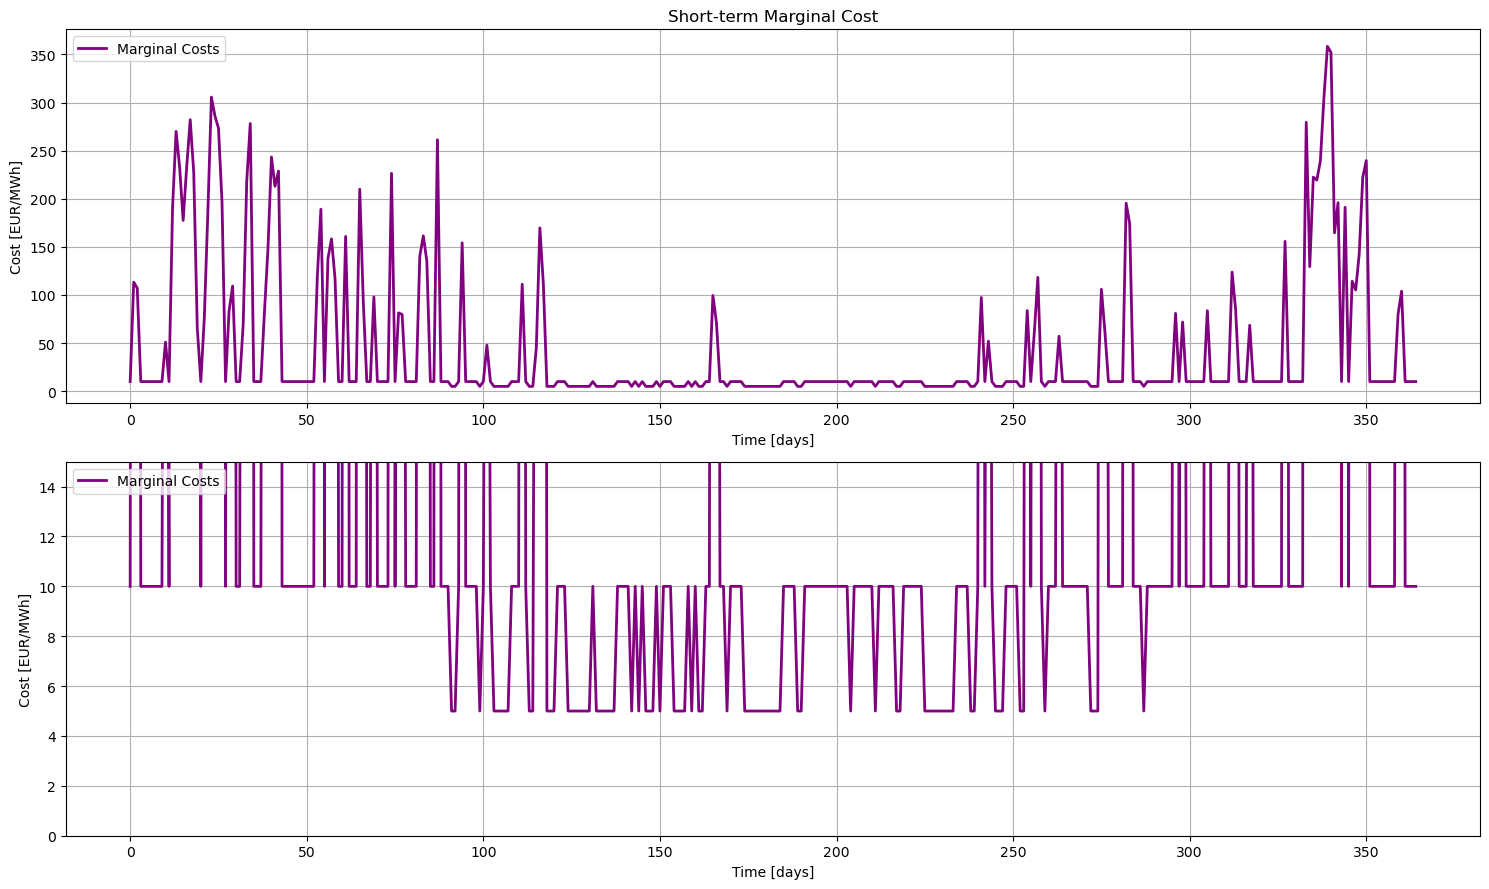

In [914]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 9))

ax1.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")
ax1.set_title("Short-term Marginal Cost")
ax1.set_xlabel('Time [days]')
ax1.set_ylabel('Cost [EUR/MWh]')
ax1.grid(True)
ax1.legend(loc='upper left')


ax2.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")
ax2.set_xlabel('Time [days]')
ax2.set_ylabel('Cost [EUR/MWh]')
ax2.set_ylim([0, 15]) 
ax2.grid(True)
ax2.legend(loc='upper left')

plt.tight_layout()  # subplot spacing adjustment
plt.show()


## Annual marginal + average cost per MWh

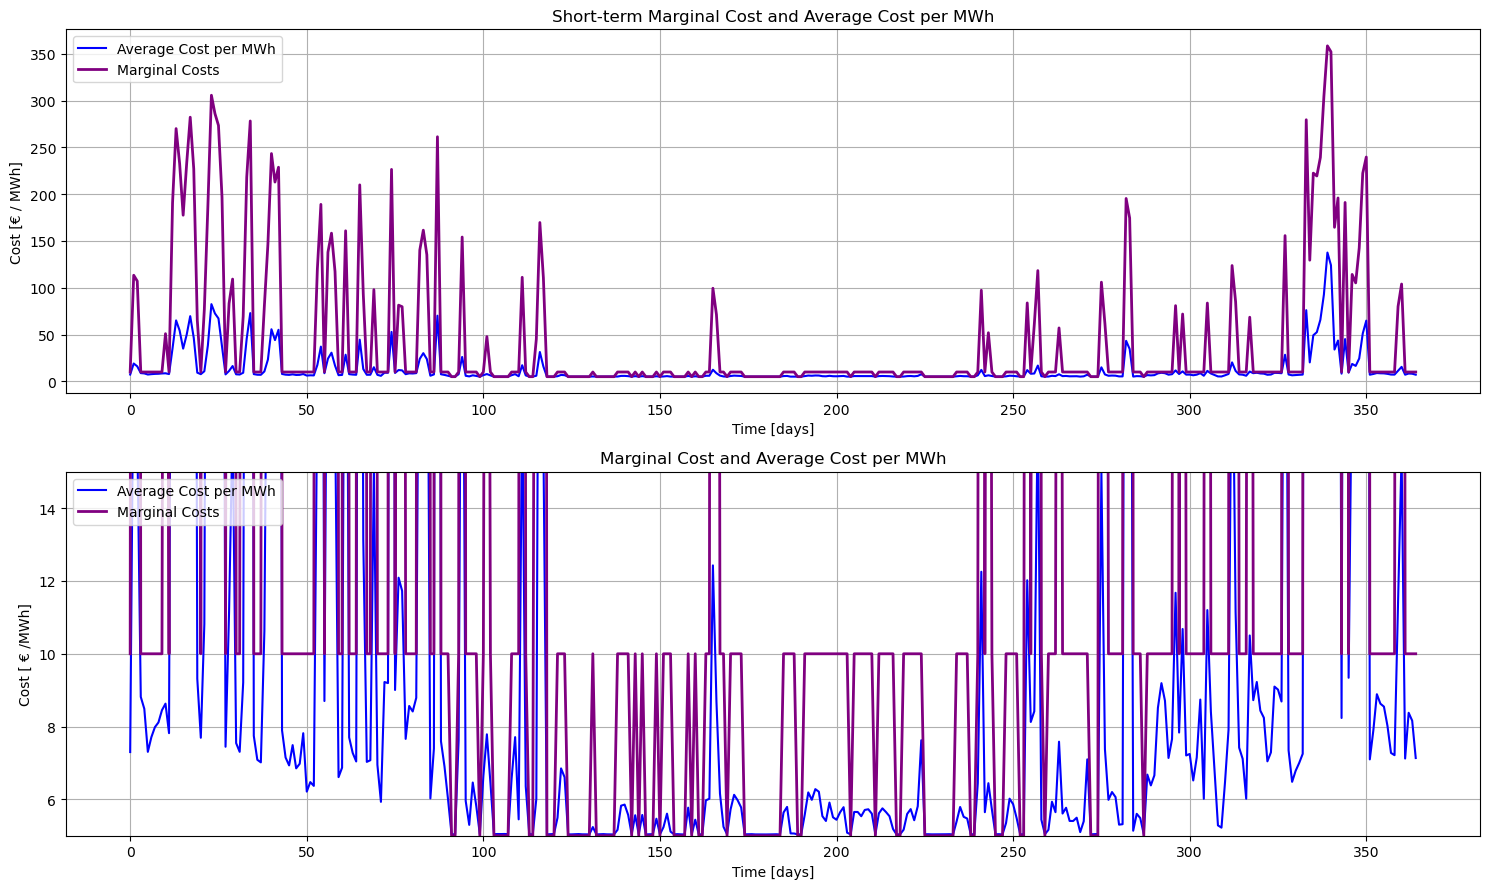

In [913]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 9))

# Plot 1
ax1.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values, color='blue', label='Average Cost per MWh')
ax1.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")
ax1.set_title("Short-term Marginal Cost and Average Cost per MWh")
ax1.set_xlabel('Time [days]')
ax1.set_ylabel('Cost [€ / MWh]')
ax1.grid(True)
ax1.legend(loc='upper left')

# Plot 2 
ax2.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values, color='blue', label='Average Cost per MWh')
ax2.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")
ax2.set_title("Marginal Cost and Average Cost per MWh")
ax2.set_xlabel('Time [days]')
ax2.set_ylabel('Cost [ € /MWh]')
ax2.grid(True)
ax2.legend(loc='upper left')
ax2.set_ylim([5, 15]) 

plt.tight_layout()  
plt.show()


# Investment model

# 16. Libraries

In [4]:
#Reset
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')

In [5]:
#Gurobi Libraries
import gurobipy as gp
from gurobipy import GRB
import sys
#Other Libraries
import numpy as np
import pandas as pd
import csv
import math
#Libraries created
import importlib
#Libraries for excel import
import os
import xlwings as xw
import xlsxwriter
#Library for plotting timeseries results
import matplotlib.pyplot as plt

# 17. Input parameters

In [6]:
# Number of Generators
NG_TH = 1 #name updated
NG_PV = 1
NG_W = 1
#NG = NG_T + NG_PV + NG_W

# Number of Loads
ND = 1

# Number of periods
NT = 24*12 #time period

# Renewable Generators' Costs
C_PV= 5 #Cost of PV generation
C_W= 10 #Cost of WP generation

# Thermal Generators Cost 
C_TH_parameters = np.array([[900, 45, 0.01]])
C_TH = pd.DataFrame(C_TH_parameters, index=["G1_T"], columns=["a", "b", "c"])

#Energy Not Supplied Cost
C_ENS= 7880

# Demand/Load Data
#Load_data = np.array([[0], [700]])
#PD = pd.DataFrame(Load_data, index=["PD1", "PD2"], columns=["t1"])

# Solar energy capacity
Q_PV = 30000   # Solar PV installed capacity (MW)

# Wind energy capacity
Q_W = 30000     # Wind installed capacity (MW)

# Thermal generator capacity
Q_TH = 5000 #name updated

#Demand max capacity
Q_D = 30000


## Demand, Wind, Solar, Thermal data

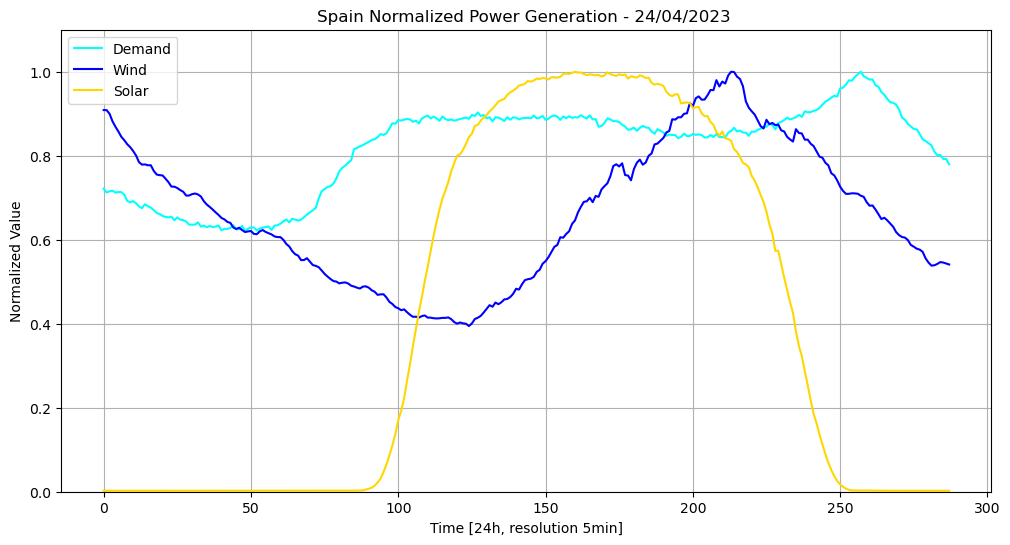

In [7]:
import os
import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt

# Demand Input
INPUT_PATH = os.path.join(os.getcwd(),"Inputs.xlsx") # Path where the main input files are located
input_book = xw.Book(INPUT_PATH)

# Demand Data
input_demand = input_book.sheets[0]
QD_h = input_demand.range('B3:B290').options(pd.DataFrame, index=False,header=False).value.astype(float)
QD_h_norm = QD_h / QD_h.max()

# Wind Data
input_generation = input_book.sheets[1]
QW_h = input_generation.range('B3:B290').options(pd.DataFrame, index=False,header=False).value.astype(float)
QW_h_norm = QW_h / QW_h.max()

# Solar Data
QPV_h = input_generation.range('H3:H290').options(pd.DataFrame, index=False,header=False).value.astype(float)
QPV_h_norm = QPV_h / QPV_h.max()

# Thermal Data
QTH_h_norm = pd.DataFrame(np.ones((288, 1)))

# Plotting
plt.figure(figsize=(12, 6))

# Demand plot
plt.plot(QD_h_norm, color='cyan', label='Demand')
# Wind plot
plt.plot(QW_h_norm, color='blue', label='Wind')
# Solar plot
plt.plot(QPV_h_norm, color='gold', label='Solar')
# Thermal plot
#plt.plot(QTH_h_norm, color='red', label='Thermal')

plt.xlabel("Time [24h, resolution 5min]")
plt.ylabel("Normalized Value")
plt.title("Spain Normalized Power Generation - 24/04/2023 ")
plt.grid()
plt.legend()
plt.ylim(0, 1.1)
plt.show()


In [8]:
INPUT_PATH = os.path.join(os.getcwd(),"Inputs.xlsx") # Path where the main input files are located
input_book = xw.Book(INPUT_PATH)
input_demand = input_book.sheets[0]
QD_h = input_demand.range('B3:B290').options(pd.DataFrame, index=False,header=False).value.astype(float)
QD_h_norm=QD_h/QD_h.max()
QD_Total=QD_h_norm*Q_D
QD_norm=QD_h_norm.T
input_generation = input_book.sheets[1]
QW_h = input_generation.range('B3:B290').options(pd.DataFrame, index=False,header=False).value.astype(float)
QW_h_norm=QW_h/QW_h.max()
QW_norm=QW_h_norm.T
input_solar = input_book.sheets[1]
QPV_h = input_generation.range('H3:H290').options(pd.DataFrame, index=False,header=False).value.astype(float)
QPV_h_norm=QPV_h/QPV_h.max()
QPV_norm=QPV_h_norm.T
QTH_h_norm = pd.DataFrame(np.ones((288, 1)))
QTH_norm=QTH_h_norm.T

# 18. Investment Model using Gurobi

In [9]:
def investment_optimization_model2(ND, NG_W, NG_PV, NG_TH, NT, C_W, C_PV, C_TH, C_ENS, QD_norm, QW_norm, QPV_norm, QTH_norm, Q_D, C_inv_W, C_inv_PV, C_inv_TH):
    
    
    model = gp.Model("Investment_model")
    model.setParam(GRB.Param.MIPGap, 0.00001)

    v_w = model.addMVar(shape=(NG_W, NT), lb=0, vtype=GRB.CONTINUOUS, name="v_w")
    v_pv = model.addMVar(shape=(NG_PV, NT), lb=0,  vtype=GRB.CONTINUOUS, name="v_pv")
    v_th = model.addMVar(shape=(NG_TH, NT), lb=0, vtype=GRB.CONTINUOUS, name="v_th")
    v_ens = model.addMVar(shape=(1,NT), lb=0, ub=GRB.INFINITY, vtype=GRB.CONTINUOUS, name="v_ens")
    
    #new decision variables
    i_w = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="i_w")
    i_pv = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="i_pv")
    i_th = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="i_th")
    q_dd = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="q_dd")


    #constraints
    for t in range(NT):
        for g in range(NG_W):
            model.addConstr(v_w[g, t] <= QW_norm.iloc[g,t]*i_w, name="Wind_Capacity_"+ str(g)+"_"+str(t)) 
        for g in range(NG_PV):    
            model.addConstr(v_pv[g, t] <= QPV_norm.iloc[g,t]*i_pv, name="PV_Capacity_"+str(g)+"_"+str(t))
        for g in range(NG_TH):  
            model.addConstr(v_th[g, t] <= QTH_norm.iloc[g,t]*i_th, name="Thermal_Capacity_"+str(g)+"_"+str(t)) 

    print(C_inv_W)
    for t in range(NT):    
        #model.addConstr(sum(v_w[g, t] for g in range(NG_W)) + sum(v_pv[g, t] for g in range(NG_PV)) + sum(v_th[g, t] for g in range(NG_TH)) + v_ens[:,t] == sum(QD_norm.iloc[d,t] * Q_D for d in range(ND)), name="Power_Balance_" + str(t))
        model.addConstr(sum(v_w[g, t] for g in range(NG_W)) + sum(v_pv[g, t] for g in range(NG_PV)) + sum(v_th[g, t] for g in range(NG_TH)) + v_ens[:,t] == sum(QD_norm.iloc[d,t] * q_dd for d in range(ND)), name="Power_Balance_" + str(t)) 
        model.addConstr(q_dd == Q_D, name="Demand")

    #objective functionthat includes investment costs
    #model.setObjective(sum(sum(C_W * v_w[g, t] + C_inv_W * i_w[g,t] for g in range(NG_W)) + sum(C_PV * v_pv[g, t]+ C_inv_PV * i_pv[g,t] for g in range(NG_PV)) + sum(C_TH.iloc[g, 0] + C_TH.iloc[g, 1] * v_th[g, t] + C_TH.iloc[g, 2] * v_th[g, t] * v_th[g, t] + C_inv_TH * i_th[g,t] for g in range(NG_TH))),GRB.MINIMIZE)
    
    model.setObjective(sum(sum(C_W * v_w[g, t] for g in range(NG_W)) + sum(C_PV * v_pv[g, t] for g in range(NG_PV)) + sum(C_TH.iloc[g, 0] + C_TH.iloc[g, 1] * v_th[g, t] + C_TH.iloc[g, 2] * v_th[g, t] * v_th[g, t] for g in range(NG_TH)) + C_ENS * v_ens[:,t] for t in range(NT))
                       + C_inv_W * i_w  + C_inv_PV * i_pv  + C_inv_TH * i_th
                       ,GRB.MINIMIZE)
    #min ∑_t (∑_g (C_PV * v_PV_g, t + C_W * v_W_g, t + (C_T_a + C_T_b * v_t_g, t + C_T_c * (v_t_g, t) * (v_t_g, t) ) + C_ENS * v_ENS_t)
    
    model.optimize()
    model.write('Investment_Model.lp')

    Obj_value = model.objVal

    v_w_df = pd.DataFrame(v_w.X, index=list(range(NG_W)), columns=list(range(NT)))
    v_pv_df = pd.DataFrame(v_pv.X, index=list(range(NG_PV)), columns=list(range(NT)))
    v_th_df = pd.DataFrame(v_th.X, index=list(range(NG_TH)), columns=list(range(NT)))
    v_ens_df = pd.DataFrame(v_ens.X, index=["ENS"], columns=list(range(NT)))
    

    total_cost = model.objVal
    w_cost= sum(sum(C_W * v_w.X[g, t] for g in range(NG_W)) for t in range(NT)) + C_inv_W * i_w.X
    pv_cost= sum(sum(C_PV * v_pv.X[g, t] for g in range(NG_PV)) for t in range(NT)) + C_inv_PV * i_pv.X
    th_cost= sum(sum((C_TH.iloc[g, 0] + C_TH.iloc[g, 1] * v_th.X[g, t] + C_TH.iloc[g, 2] * v_th.X[g, t] * v_th.X[g, t] for g in range(NG_TH))) for t in range(NT)) + C_inv_TH * i_th.X
    ens_cost= sum(C_ENS * v_ens.X[0,t] for t in range(NT))

    marginal_costs=[]
    for c in model.getConstrs(): 
        if ((c.ConstrName).startswith ("Power_Balance_")): 
            marginal_costs.append(c.Pi) 
    marginal_costs_df = pd.DataFrame(marginal_costs)
    
    marginal_costs2=[]
    for c in model.getConstrs(): 
        if ((c.ConstrName).startswith ("Demand")): 
            marginal_costs2.append(c.Pi) 
    marginal_costs_df2 = marginal_costs2
    
    return Obj_value, v_w_df, v_pv_df, v_th_df, v_ens_df, i_w.X, i_pv.X, i_th.X, total_cost, w_cost, pv_cost, th_cost, ens_cost, marginal_costs_df, marginal_costs_df2, q_dd.X  # This line should be indented inside the function

# 19. Objective function

In [10]:
C_inv_W = 202.15
C_inv_PV = 101.07
C_inv_TH = 163.96


Obj_value, v_w_df, v_pv_df, v_th_df, v_ens_df, i_w_df, i_pv_df, i_th_df, total_cost, w_cost, pv_cost, th_cost, ens_cost, marginal_costs_df, marginal_costs_df2, q_dd = investment_optimization_model2(ND, NG_W, NG_PV, NG_TH, NT, C_W, C_PV, C_TH, C_ENS, QD_norm, QW_norm, QPV_norm, QTH_norm, Q_D, C_inv_W, C_inv_PV, C_inv_TH)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-30
Set parameter MIPGap to value 1e-05
202.15
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1440 rows, 1156 columns and 3456 nonzeros
Model fingerprint: 0xa9750c76
Model has 288 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-03, 1e+00]
  Objective range  [5e+00, 8e+03]
  QObjective range [2e-02, 2e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+04, 3e+04]
Presolve removed 288 rows and 289 columns
Presolve time: 0.02s
Presolved: 1152 rows, 867 columns, 2592 nonzeros
Presolved model has 288 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 3
 AA' NZ     : 1.728e+03
 Factor NZ  : 6.342e+03 (roughly 1 MB of memory)
 Factor Ops : 3.630e+04

In [11]:
import pandas as pd
import locale
from IPython.display import display

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

C_inv_W = 202.15
C_inv_PV = 101.07
C_inv_TH = 163.96

data = {
    'Generator': ['Wind investment cost per MWh', 'Solar investment cost per MWh', 'Thermal investment cost per MWh'],
    'Investment Cost per MWh (€)': [C_inv_W, C_inv_PV, C_inv_TH]
}

df = pd.DataFrame(data)
df['Investment Cost per MWh (€)'] = df['Investment Cost per MWh (€)'].apply(lambda x: locale.format_string('%1.2f €', x, True))  # use locale formatting
df = df.set_index('Generator').T

styled_df = df.style.hide(axis='index').set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_df)


In [12]:
total_cost

67925494.31045356

In [13]:
w_cost

46606115.94403076

In [14]:
CinvW=C_inv_W * i_w_df
CinvW

10238868.93090089

In [15]:
w_cost-CinvW

36367247.013129875

In [16]:
pv_cost

20794533.56708552

In [17]:
th_cost

524844.7993371879

In [18]:
marginal_costs_df2[0]

2256.06629090127

## investment values

In [19]:
i_w_df

50649.85867376152

In [20]:
i_pv_df

35968.91468346457

In [21]:
i_th_df

798.5075794826247

In [22]:
v_ens_df

0    1    2    3    4    5    6    7    8    9    ...  278  279  280  \
ENS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     281  282  283  284  285  286  287  
ENS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 288 columns]

In [23]:
import pandas as pd
import locale
from IPython.display import display

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

data = {
    'Generator': ['Wind', 'Solar', 'Thermal'],
    'Investment': [i_w_df, i_pv_df, i_th_df]
}

df = pd.DataFrame(data)
total_investment = df['Investment'].sum()
df = pd.concat([df, pd.DataFrame({'Generator': ['Total'], 'Investment': [total_investment]})], ignore_index=True)
df['Investment'] = df['Investment'].apply(lambda x: locale.format_string('%1.2f MW', x, True))  # use locale formatting
df = df.set_index('Generator').T

styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_df)


In [24]:
import pandas as pd
import locale
from IPython.display import display

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

data = {
    'Generator': ['Wind', 'Solar', 'Thermal'],
    'Investment': [30000, 30000, 5000]
}

df = pd.DataFrame(data)
total_investment = df['Investment'].sum()
df = pd.concat([df, pd.DataFrame({'Generator': ['Total'], 'Investment': [total_investment]})], ignore_index=True)
df['Investment'] = df['Investment'].apply(lambda x: locale.format_string('%1.2f MW', x, True))  # use locale formatting
df = df.set_index('Generator').T

styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_df)


# 20. Result analysis

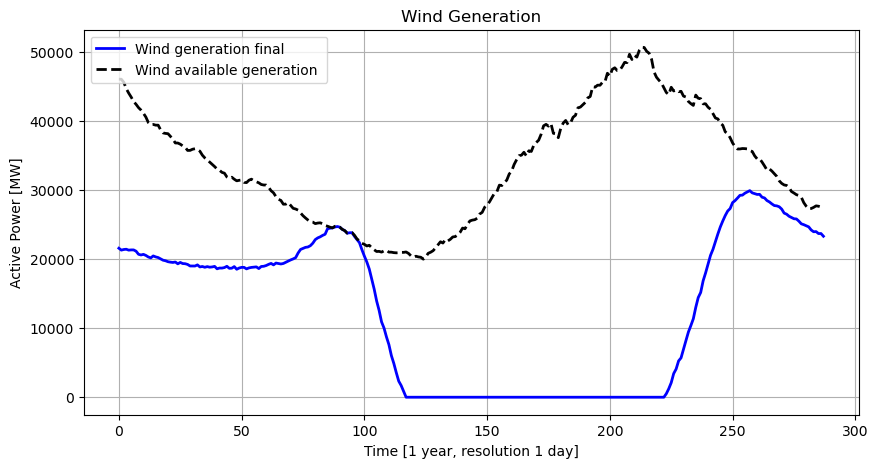

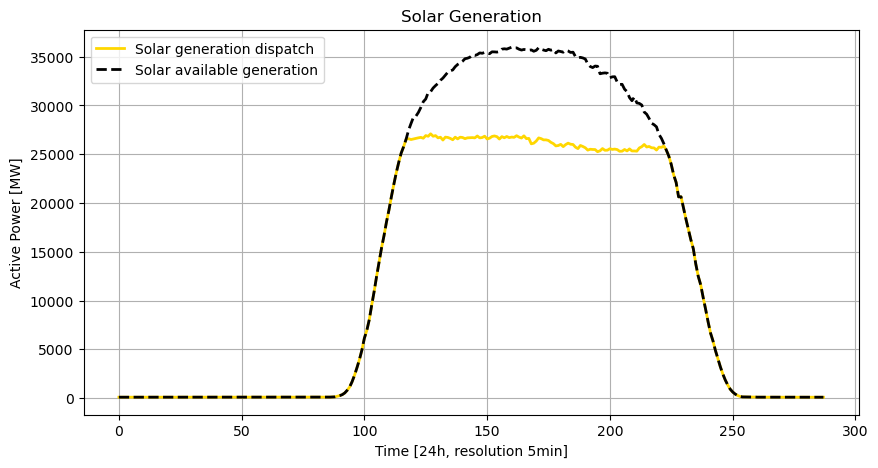

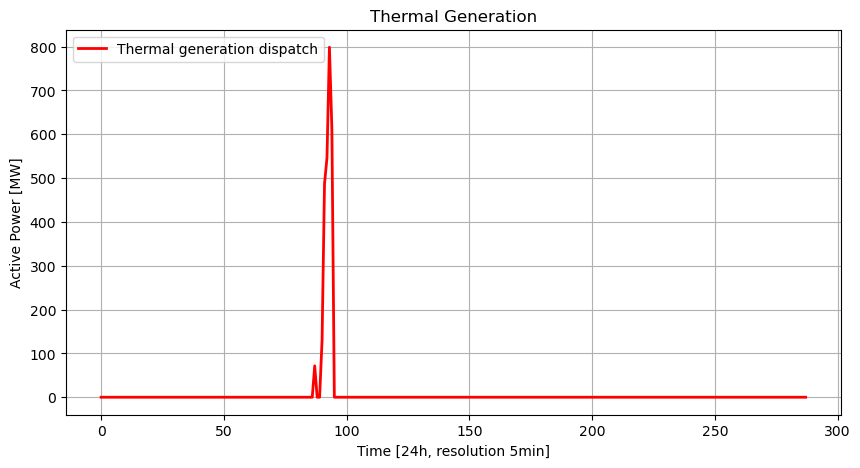

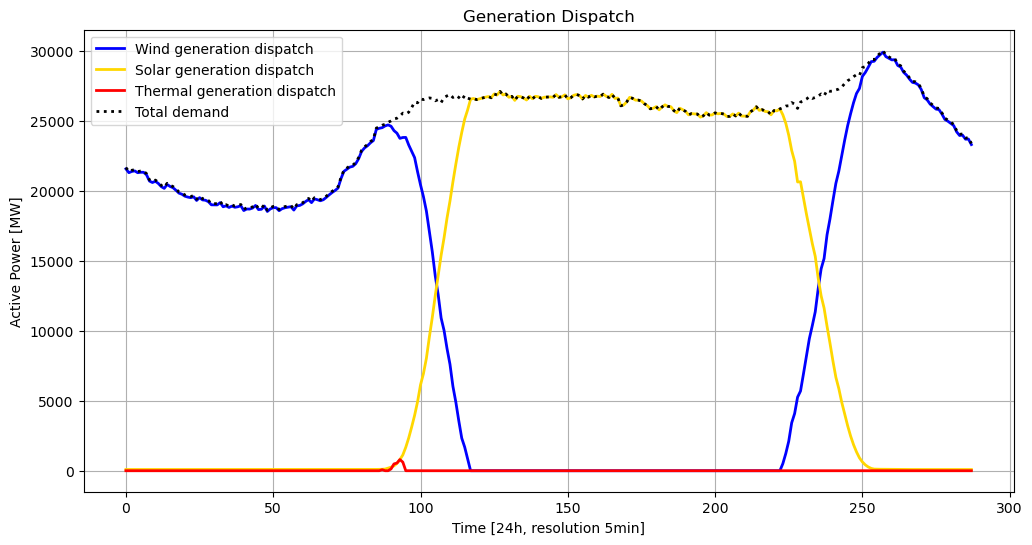

In [25]:
#Wind generation analysis
w_ini = (QW_norm*i_w_df).T
w_final = (v_w_df).T
x = pd.DataFrame(list(range(NT)))
pv_ini = (QPV_norm*i_pv_df).T
pv_final = (v_pv_df).T


demand = (QD_norm*Q_D).T

fig, ax = plt.subplots()
ax.plot(x, w_final, linewidth=2.0, label="Wind generation final", color="blue")
ax.plot(x, w_ini, linewidth=2.0, label="Wind available generation ", color="black", linestyle = 'dashed')
#ax.plot(x, demand, linewidth=2.0, label="demand", color="orange", linestyle = 'dotted')
ax.legend(loc='upper left')
ax.set_title("Wind Generation")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 5)
plt.show()


fig, ax = plt.subplots()

ax.plot(x, pv_final, linewidth=2.0, label="Solar generation dispatch", color="gold")
ax.plot(x, pv_ini, linewidth=2.0, label="Solar available generation", color="black", linestyle = 'dashed')
#ax.plot(x, demand, linewidth=2.0, label="demand", color="red", linestyle = 'dotted')
ax.legend(loc='upper left')
ax.set_title("Solar Generation")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 5)
plt.show()



th_ini = (QTH_norm*Q_TH).T
th_final = (v_th_df).T
x = pd.DataFrame(list(range(NT)))

fig, ax = plt.subplots()

ax.plot(x, th_final, linewidth=2.0, label="Thermal generation dispatch", color="red")
ax.legend(loc='upper left')
ax.set_title("Thermal Generation")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 5)
plt.show()

gen_disp = (v_w_df).T + (v_pv_df).T + (v_th_df).T #total generation dispatched
demand = (QD_norm*Q_D).T


fig, ax = plt.subplots(figsize=(12, 6))

# Wind generation
ax.plot(x, w_final, linewidth=2.0, label="Wind generation dispatch", color="blue")

# Solar generation
ax.plot(x, pv_final, linewidth=2.0, label="Solar generation dispatch", color="gold")

# Thermal generation
ax.plot(x, th_final, linewidth=2.0, label="Thermal generation dispatch", color="red")

ax.plot(x, gen_disp, linewidth=2.0, label="Total demand", color="black",linestyle="dotted",zorder=10)

ax.legend(loc='upper left')
ax.set_title("Generation Dispatch")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)

# Show the combined plot
plt.show()


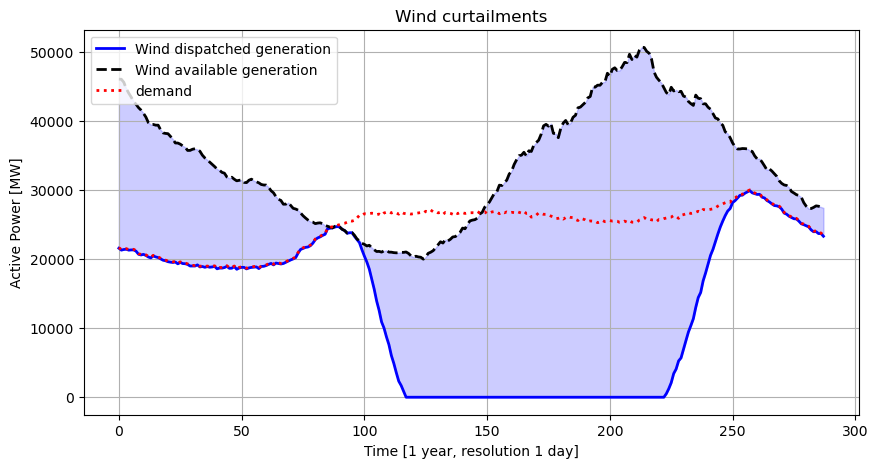

In [26]:
import pandas as pd
import locale
from IPython.display import display
import matplotlib.pyplot as plt

# Set locale
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

# Wind generation analysis
w_ini = (QW_norm*i_w_df).T
w_final = (v_w_df).T
x = pd.DataFrame(list(range(NT)))

demand = (QD_norm*Q_D).T

fig, ax = plt.subplots()
ax.plot(x, w_final, linewidth=2.0, label="Wind dispatched generation", color="blue")
ax.plot(x, w_ini, linewidth=2.0, label="Wind available generation ", color="black", linestyle = 'dashed')
ax.plot(x, demand, linewidth=2.0, label="demand", color="red", linestyle = 'dotted')
ax.fill_between(x[0], w_ini[0], w_final[0], color='blue', alpha=0.2)
ax.fill_between(x[0], 0, w_final[0], color='white', alpha=0.0)
ax.legend(loc='upper left')
ax.set_title("Wind curtailments")
ax.set_xlabel('Time [1 year, resolution 1 day]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 5)
plt.show()

# Calculate the absolute difference between initial and final wind generation
w_curtailment = (w_ini - w_final).abs()
total_curtailment = w_curtailment.sum().values[0]

# Calculate the area between final wind generation and x-axis
w_final_area = w_final.sum().values[0]

# Create a dataframe to display as a table
data = {
    'Wind Curtailments [MWh]': [locale.format_string('%1.2f ', total_curtailment, True)],
    'Wind Dispatched Generation [MWh]': [locale.format_string('%1.2f ', w_final_area, True)]
}

df = pd.DataFrame(data)

styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_df)


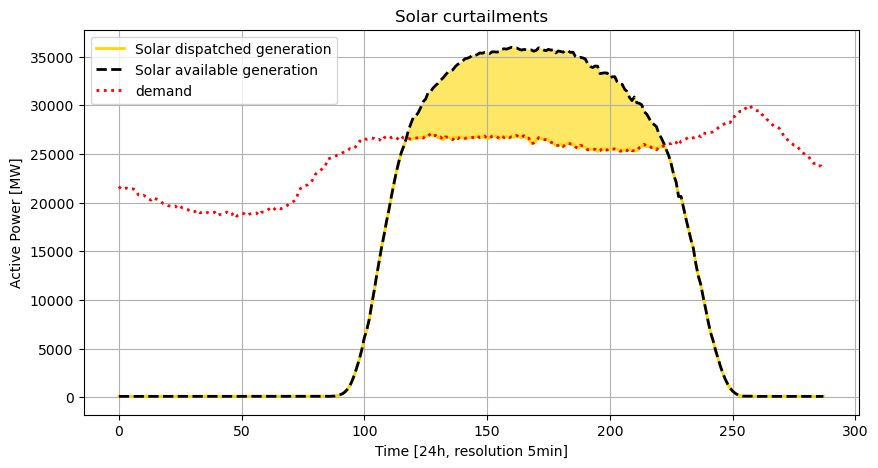

In [27]:
import pandas as pd
import locale
from IPython.display import display
import matplotlib.pyplot as plt

# Set locale
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

# Solar generation analysis
pv_ini = (QPV_norm*i_pv_df).T
pv_final = (v_pv_df).T

x = pd.DataFrame(list(range(NT)))

demand = (QD_norm*Q_D).T

fig, ax = plt.subplots()
ax.plot(x, pv_final, linewidth=2.0, label="Solar dispatched generation", color="gold")
ax.plot(x, pv_ini, linewidth=2.0, label="Solar available generation", color="black", linestyle = 'dashed')
ax.plot(x, demand, linewidth=2.0, label="demand", color="red", linestyle = 'dotted')
ax.fill_between(x[0], pv_ini[0], pv_final[0], color='gold', alpha=0.6)
ax.fill_between(x[0], 0, pv_final[0], color='white', alpha=0.1)
ax.legend(loc='upper left')
ax.set_title("Solar curtailments")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Active Power [MW]')
ax.grid(True)
fig.set_size_inches(10, 5)
plt.show()

# Calculate the absolute difference between initial and final wind generation
pv_curtailment = (pv_ini - pv_final).abs()
total_curtailment = pv_curtailment.sum().values[0]

# Calculate the area between final wind generation and x-axis
pv_final_area = pv_final.sum().values[0]

# Create a dataframe to display as a table
data = {
    'Solar Curtailments [MWh]': [locale.format_string('%1.2f ', total_curtailment, True)],
    'Solar Dispatched Generation [MWh]': [locale.format_string('%1.2f ', pv_final_area, True)]
}

df = pd.DataFrame(data)

styled_df = df.style.hide(axis="index").set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_df)


## ENS analsysis

In [28]:
ens = (v_ens_df).T
x = pd.DataFrame(list(range(NT)))
ens.sum()

ENS    0.0
dtype: float64

## 21. Average hourly generation values

<Figure size 1000x600 with 0 Axes>

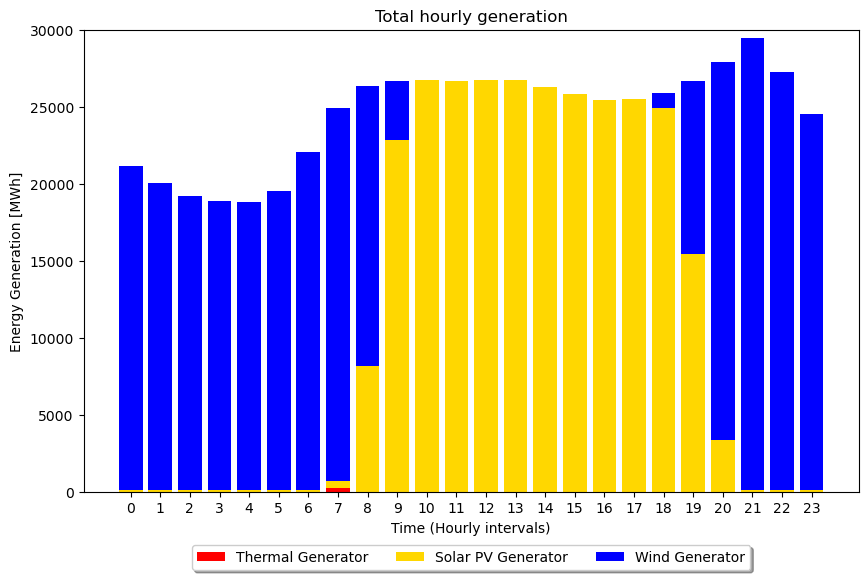

In [29]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import locale
from IPython.display import display

time_steps_hourly = list(range(24))  

# Reshape the dataframes from 5-min to hourly averages
v_w_df_hourly = v_w_df.groupby(np.arange(len(v_w_df.columns))//12, axis=1).mean()
v_pv_df_hourly = v_pv_df.groupby(np.arange(len(v_pv_df.columns))//12, axis=1).mean()
v_th_df_hourly = v_th_df.groupby(np.arange(len(v_th_df.columns))//12, axis=1).mean()


plt.figure(figsize=(10,6))

# Stacked bar chart
plt.figure(figsize=(10, 6))
cumulative_bottom = np.zeros(len(time_steps_hourly))

for g in range(NG_TH):
    plt.bar(time_steps_hourly, v_th_df_hourly.loc[g], label=f'Thermal Generator', color='red', bottom=cumulative_bottom)
    cumulative_bottom += v_th_df_hourly.loc[g]

for g in range(NG_PV):
    plt.bar(time_steps_hourly, v_pv_df_hourly.loc[g], label=f'Solar PV Generator', bottom=cumulative_bottom, color='gold')
    cumulative_bottom += v_pv_df_hourly.loc[g]

for g in range(NG_W):
    plt.bar(time_steps_hourly, v_w_df_hourly.loc[g], label=f'Wind Generator', bottom=cumulative_bottom, color='blue')
    cumulative_bottom += v_w_df_hourly.loc[g]

plt.xlabel('Time (Hourly intervals)')
plt.ylabel('Energy Generation [MWh]')
plt.title('Total hourly generation')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
plt.xticks(range(24))
plt.ylim(0, 30000)
plt.show()

# Create production_hourly_df DataFrame
production_hourly_df = pd.DataFrame({
    'Wind Production': v_w_df_hourly.sum(),
    'Solar Production': v_pv_df_hourly.sum(),
    'Thermal Production': v_th_df_hourly.sum(),
}, index=range(24))

production_hourly_df['Total Production'] = production_hourly_df.sum(axis=1)

# Apply styling to production_hourly_df
styled_production_hourly_df = production_hourly_df.applymap(lambda x: locale.format_string("%.2f MWh", x, grouping=True)).style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

# Display the styled table chart
display(styled_production_hourly_df)


## Total generation by source

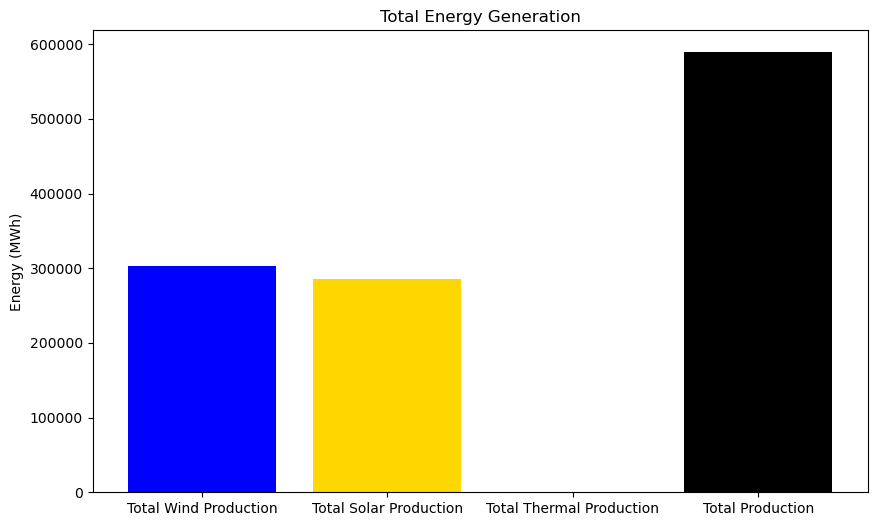

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import locale
import pandas as pd

locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

total_wind = v_w_df_hourly.sum().sum() 
total_solar = v_pv_df_hourly.sum().sum() 
total_thermal = v_th_df_hourly.sum().sum() 
total_all = total_wind + total_solar + total_thermal

totals = [total_wind, total_solar, total_thermal, total_all]
labels = ['Total Wind Production', 'Total Solar Production', 'Total Thermal Production', 'Total Production']
colors = ['blue', 'gold', 'red', 'black']

fig, ax = plt.subplots(figsize=(10,6))
bars = plt.bar(labels, totals, color=colors)
ax.set_ylabel('Energy (MWh)')
ax.set_title('Total Energy Generation')

plt.show()

total_df = pd.DataFrame(totals, index=labels, columns=['Energy (MWh)'])
total_df = total_df.applymap(lambda x: locale.format_string("%1.3f", x, True))  # Apply Spanish locale formatting

styled_total_df = total_df.style.set_properties(
    **{'text-align': 'center','font-size': '120%','border': '1px solid black','padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
)

display(styled_total_df)


In [31]:
print(type(w_cost))
print(w_cost)
print(type(pv_cost))
print(pv_cost)
print(type(th_cost))
print(th_cost)

<class 'numpy.float64'>
46606115.94403076
<class 'numpy.float64'>
20794533.56708552
<class 'numpy.float64'>
524844.7993371879


# 22. Production cost analysis

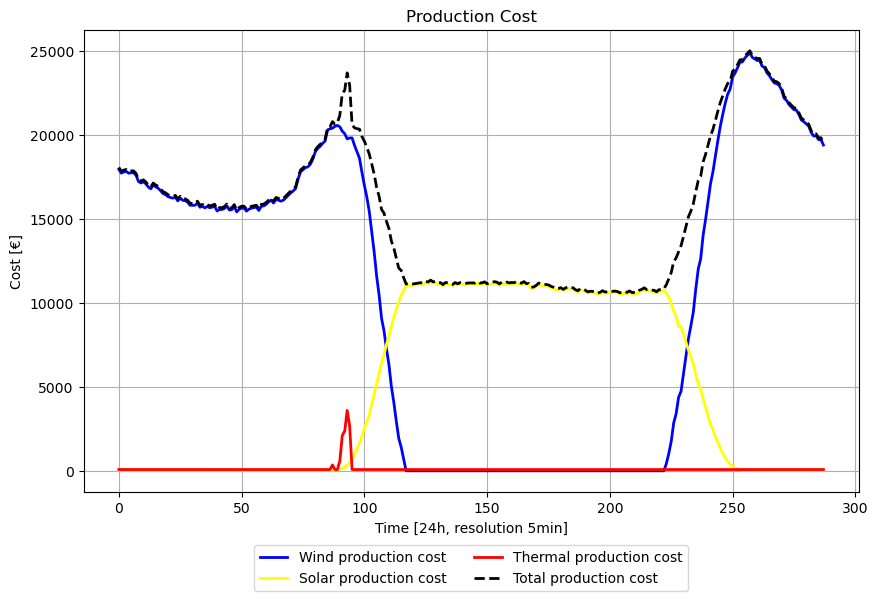

In [32]:
w_price = w_final * C_W /12
pv_price = pv_final * C_PV /12 
th_price = (900 + th_final * 45 + (v_th_df**2).T * 0.01) /12 
total_price = w_price + pv_price + th_price


fig, ax = plt.subplots()
ax.plot(x.squeeze(), w_price.squeeze(), linewidth=2.0, label="Wind production cost", color="blue"),
ax.plot(x.squeeze(), pv_price.squeeze(), linewidth=2.0, label="Solar production cost", color="yellow")
ax.plot(x.squeeze(), th_price.squeeze(), linewidth=2.0, label="Thermal production cost", color="red")
ax.plot(x.squeeze(), total_price.squeeze(), linewidth=2.0, label="Total production cost", color="black", linestyle="dashed", zorder=10)
ax.fill_between(x.squeeze(), total_price.squeeze(), color="black", alpha=0) 

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)  
ax.set_title("Production Cost")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Cost [€]')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()




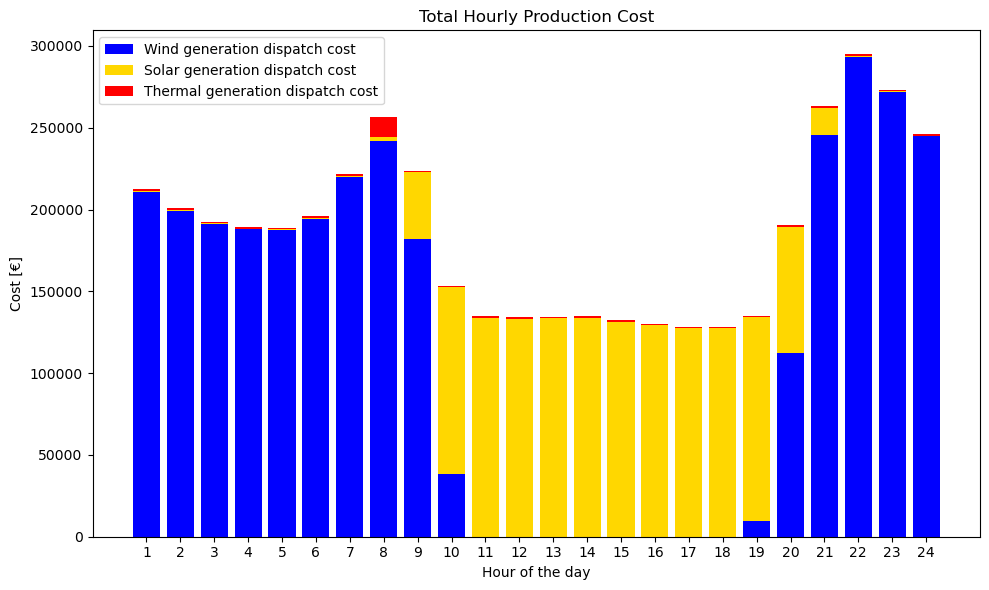

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Convert DataFrames to numpy arrays
w_price_array = w_price.to_numpy()
pv_price_array = pv_price.to_numpy()
th_price_array = th_price.to_numpy()

# Calculate the hourly average values
w_price_hourly_avg = np.mean(w_price_array.reshape(-1, 12), axis=1) *12
pv_price_hourly_avg = np.mean(pv_price_array.reshape(-1, 12), axis=1) *12
th_price_hourly_avg = np.mean(th_price_array.reshape(-1, 12), axis=1) *12

# Create a bar plot with restyled formatting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.8  # Increased bar width
index = np.arange(24)

cumulative_bottom = np.zeros(24)
ax.bar(index, w_price_hourly_avg, bar_width, label="Wind generation dispatch cost", color="blue", bottom=cumulative_bottom)
cumulative_bottom += w_price_hourly_avg

ax.bar(index, pv_price_hourly_avg, bar_width, label="Solar generation dispatch cost", color="gold", bottom=cumulative_bottom)
cumulative_bottom += pv_price_hourly_avg

ax.bar(index, th_price_hourly_avg, bar_width, label="Thermal generation dispatch cost", color="red", bottom=cumulative_bottom)

ax.set_xlabel('Hour of the day')
ax.set_ylabel('Cost [€]')
ax.set_title('Total Hourly Production Cost')
ax.set_xticks(index)
ax.set_xticklabels(range(1, 25))
ax.legend()

plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
import locale

# Calculate the hourly average values
w_price_hourly_avg = np.mean(w_price_array.reshape(-1, 12), axis=1)*12
pv_price_hourly_avg = np.mean(pv_price_array.reshape(-1, 12), axis=1)*12
th_price_hourly_avg = np.mean(th_price_array.reshape(-1, 12), axis=1)*12

# Calculate the total generation
total_generation_hourly = w_price_hourly_avg + pv_price_hourly_avg + th_price_hourly_avg

# Create a DataFrame for the hourly average prices
hourly_prices_df = pd.DataFrame({
    'Wind Generation Dispatch Cost': w_price_hourly_avg,
    'Solar Generation Dispatch Cost': pv_price_hourly_avg,
    'Thermal Generation Dispatch Cost': th_price_hourly_avg,
    'Total Generation': total_generation_hourly
}, index=range(24))

# Apply styling to the hourly_prices_df
styled_hourly_prices_df = hourly_prices_df.applymap(lambda x: locale.currency(x, grouping=True)).style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

# Display the styled table chart
display(styled_hourly_prices_df)


In [35]:
import pandas as pd
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

total_w_price = w_price_hourly_avg.sum() 
total_pv_price = pv_price_hourly_avg.sum() 
total_th_price = th_price_hourly_avg.sum() 
total_total_price = total_w_price + total_pv_price + total_th_price

totals_df = pd.DataFrame({
    'Generator': ['Wind', 'Solar', 'Thermal', 'Total'],
    'Total Cost': [total_w_price, total_pv_price, total_th_price, total_total_price]
})

totals_df['Total Cost'] = totals_df['Total Cost'].apply(lambda x: locale.format_string('%1.2f €', x, True))

styled_totals_df = totals_df.style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

display(styled_totals_df)


# 23. Investment cost analysis

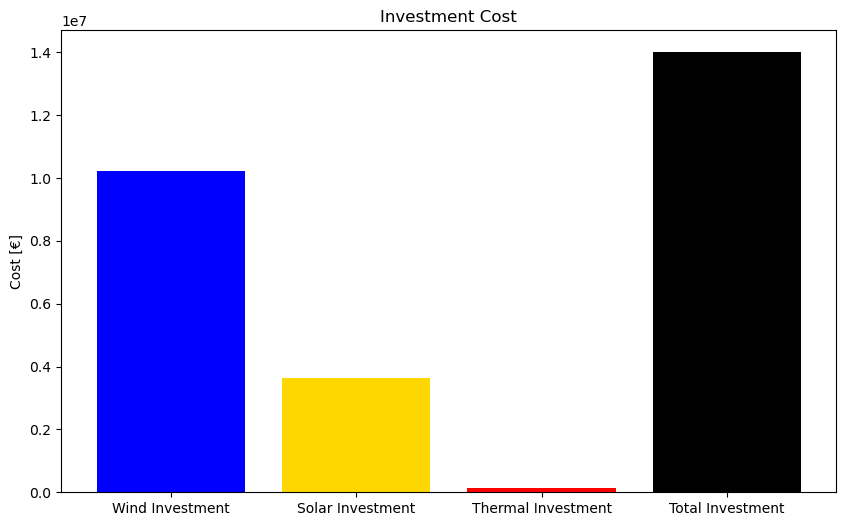

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

w_inv_price = C_inv_W * i_w_df
pv_inv_price = C_inv_PV * i_pv_df
th_inv_price = C_inv_TH * i_th_df
total_inv_price = w_inv_price + pv_inv_price + th_inv_price

labels = ['Wind Investment', 'Solar Investment', 'Thermal Investment', 'Total Investment']
investments = [w_inv_price, pv_inv_price, th_inv_price, total_inv_price]
colors = ['blue', 'gold', 'red', 'black']

fig, ax = plt.subplots()
ax.bar(labels, investments, color=colors)
ax.set_title("Investment Cost")
ax.set_ylabel('Cost [€]')
fig.set_size_inches(10, 6)
plt.show()

df = pd.DataFrame({'Investment': investments}, index=labels)
styled_df = df.T.style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues').hide(axis="index").format(lambda x: locale.format_string("%1.2f €", x, True))

styled_df


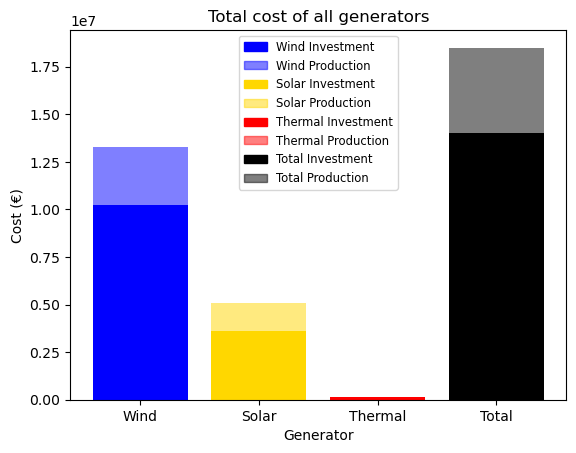

In [37]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

total_w_price = w_price_hourly_avg.sum()
total_pv_price = pv_price_hourly_avg.sum()
total_th_price = th_price_hourly_avg.sum()
total_total_price = total_w_price + total_pv_price + total_th_price

cost_df = pd.DataFrame({
    'Cost': [total_w_price, total_pv_price, total_th_price, total_total_price]
}, index=['Wind', 'Solar', 'Thermal', 'Total'])

w_inv_price = C_inv_W * i_w_df
pv_inv_price = C_inv_PV * i_pv_df
th_inv_price = C_inv_TH * i_th_df
total_inv_price = w_inv_price + pv_inv_price + th_inv_price

investment_df = pd.DataFrame({
    'Investment': [w_inv_price, pv_inv_price, th_inv_price, total_inv_price]
}, index=['Wind', 'Solar', 'Thermal', 'Total'])

total_df = pd.DataFrame({
    'Total': cost_df['Cost'] + investment_df['Investment']
})

result_df = pd.concat([cost_df, investment_df, total_df], axis=1)

styled_result_df = result_df.style.format(lambda x: locale.format_string('%1.2f €', x, True))

colors = ['blue', 'gold', 'red', 'black']
fig, ax = plt.subplots()

for i, (index, row) in enumerate(result_df.iterrows()):
    ax.bar(index, row['Investment'], color=colors[i])
    ax.bar(index, row['Cost'], bottom=row['Investment'], color=colors[i], alpha=0.5)

handles = [
    mpatches.Patch(color=colors[0], label='Wind Investment'),
    mpatches.Patch(color=colors[0], alpha=0.5, label='Wind Production'),
    mpatches.Patch(color=colors[1], label='Solar Investment'),
    mpatches.Patch(color=colors[1], alpha=0.5, label='Solar Production'),
    mpatches.Patch(color=colors[2], label='Thermal Investment'),
    mpatches.Patch(color=colors[2], alpha=0.5, label='Thermal Production'),
    mpatches.Patch(color=colors[3], label='Total Investment'),
    mpatches.Patch(color=colors[3], alpha=0.5, label='Total Production'),
]

plt.legend(handles=handles)
plt.legend(handles=handles, fontsize='small')
plt.title('Total cost of all generators')
plt.ylabel('Cost (€)')
plt.xlabel('Generator')
plt.show()


In [38]:
import pandas as pd
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

total_w_price = w_price_hourly_avg.sum() 
total_pv_price = pv_price_hourly_avg.sum() 
total_th_price = th_price_hourly_avg.sum() 
total_total_price = total_w_price + total_pv_price + total_th_price

cost_df = pd.DataFrame({
    'Production cost [€]': [total_w_price, total_pv_price, total_th_price, total_total_price]
}, index=['Wind', 'Solar', 'Thermal', 'Total'])

w_inv_price = C_inv_W * i_w_df
pv_inv_price = C_inv_PV * i_pv_df
th_inv_price = C_inv_TH * i_th_df
total_inv_price = w_inv_price + pv_inv_price + th_inv_price

investment_df = pd.DataFrame({
    'Investment cost [€]': [w_inv_price, pv_inv_price, th_inv_price, total_inv_price]
}, index=['Wind', 'Solar', 'Thermal', 'Total'])

total_df = pd.DataFrame({
    'Total cost [€]': cost_df['Production cost [€]'] + investment_df['Investment cost [€]']
})

result_df = pd.concat([cost_df, investment_df, total_df], axis=1)

total_wind = v_w_df_hourly.sum().sum() 
total_solar = v_pv_df_hourly.sum().sum() 
total_thermal = v_th_df_hourly.sum().sum() 
total_all = total_wind + total_solar + total_thermal

energy_df = pd.DataFrame({
    'Energy production [MWh]': [total_wind, total_solar, total_thermal, total_all]
}, index=['Wind', 'Solar', 'Thermal', 'Total'])

result_df = pd.concat([result_df, energy_df], axis=1)

result_df['Cost per MWh [€ / MWh]'] = result_df['Total cost [€]'] / result_df['Energy production [MWh]']

styled_result_df = result_df.style.format(lambda x: locale.format_string('%1.2f ', x, True)).set_properties(
    **{'text-align': 'center', 'font-size': '120%', 'border': '1px solid black', 'padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
)

styled_result_df


# 24. Cost division

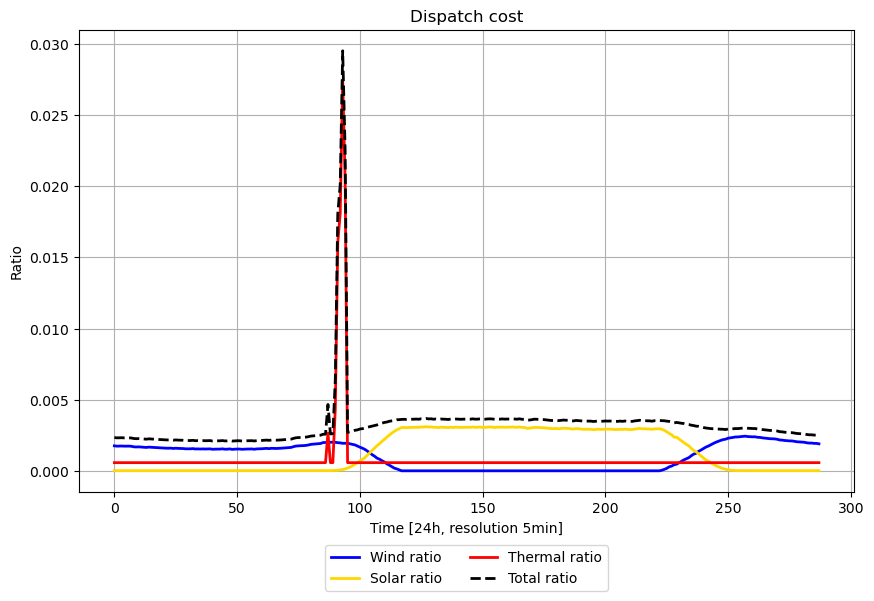

In [39]:
w_final_price = w_price / w_inv_price
pv_final_price = pv_price / pv_inv_price  
th_final_price = th_price / th_inv_price 
total_final_price = w_final_price + pv_final_price + th_final_price

fig, ax = plt.subplots()
ax.plot(x.squeeze(), w_final_price.squeeze(), linewidth=2.0, label="Wind ratio", color="blue"),
ax.plot(x.squeeze(), pv_final_price.squeeze(), linewidth=2.0, label="Solar ratio", color="gold")
ax.plot(x.squeeze(), th_final_price.squeeze(), linewidth=2.0, label="Thermal ratio", color="red")
ax.plot(x.squeeze(), total_final_price.squeeze(), linewidth=2.0, label="Total ratio", color="black", linestyle="dashed", zorder=10)
ax.fill_between(x.squeeze(), total_final_price.squeeze(), color="black", alpha=0) 

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)  
ax.set_title("Dispatch cost")
ax.set_xlabel('Time [24h, resolution 5min]')
ax.set_ylabel('Ratio')
ax.grid(True)
fig.set_size_inches(10, 6)
plt.show()




# 25. Costs per MWh

Text(0.5, 1.0, 'Total Cost per MWh')

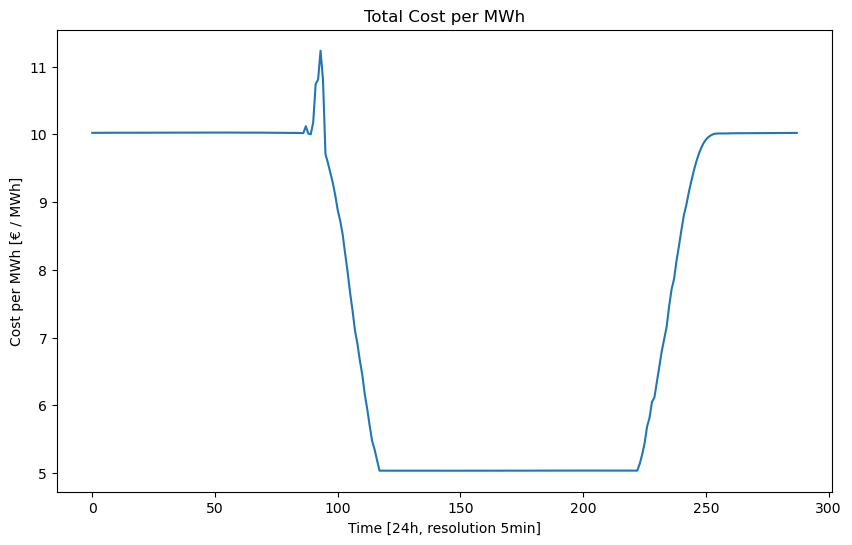

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import locale
from IPython.display import display

w_price = w_final * C_W
pv_price = pv_final * C_PV 
th_price = 900 + th_final * 45 + (v_th_df**2).T * 0.01
ens_price = ens * C_ENS

cost_per_mwh_5min_df = pd.DataFrame()

small_value = 1e-5 

cost_per_mwh_5min_df['Wind Cost per MWh'] = w_price.sum(axis=1) / (w_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['Solar Cost per MWh'] = pv_price.sum(axis=1) / (pv_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['Thermal Cost per MWh'] = th_price.sum(axis=1) / (th_final.sum(axis=1) + small_value)
cost_per_mwh_5min_df['ENS Cost per MWh'] = ens_price.sum(axis=1) / (ens.sum(axis=1) + small_value)

total_dispatch_cost_5min = w_price.sum(axis=1) + pv_price.sum(axis=1) + th_price.sum(axis=1) + ens_price.sum(axis=1)  # Total cost
total_production_5min = w_final.sum(axis=1) + pv_final.sum(axis=1) + th_final.sum(axis=1) + ens.sum(axis=1)  # Total production

cost_per_mwh_5min_df['Total Cost per MWh'] = total_dispatch_cost_5min / (total_production_5min + small_value)

total_cost_per_mwh_24h = cost_per_mwh_5min_df['Total Cost per MWh'][:24*12]

plt.figure(figsize=(10,6))
plt.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values)
plt.xlabel('Time [24h, resolution 5min]')
plt.ylabel('Cost per MWh [€ / MWh]')
plt.title('Total Cost per MWh')

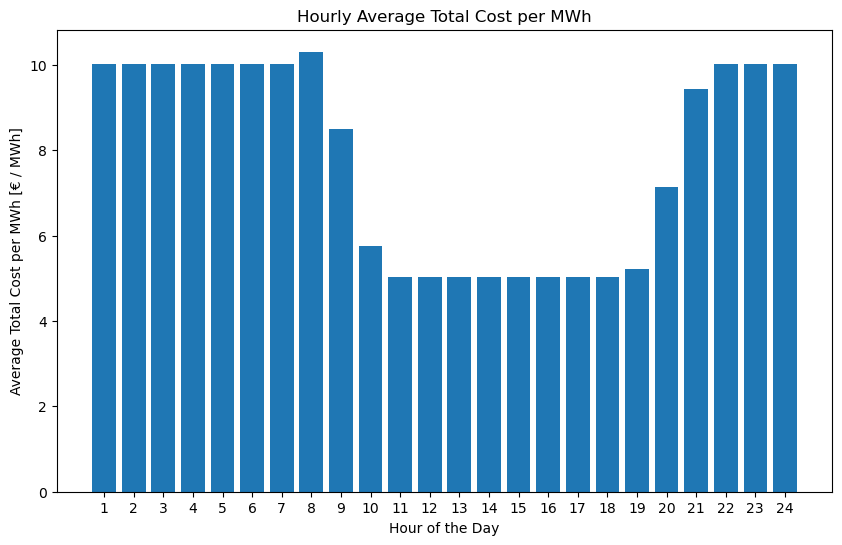

In [41]:
locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

hourly_average_cost = total_cost_per_mwh_24h.groupby(total_cost_per_mwh_24h.index // 12).mean()

styled_hourly_average_cost = hourly_average_cost.apply(lambda x: locale.format_string("%.2f €/MWh", x, grouping=True)).to_frame().T

styled_hourly_average_cost = styled_hourly_average_cost.style.set_properties(**{
    'text-align': 'center',
    'font-size': '120%',
    'border': '1px solid black',
    'padding': '10px'
}).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '120%'), ('border', '1px solid black'), ('padding', '10px')])]
).background_gradient(cmap='Blues')

plt.figure(figsize=(10,6))
plt.bar(range(1, 25), hourly_average_cost)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Cost per MWh [€ / MWh]')
plt.title('Hourly Average Total Cost per MWh')
plt.xticks(range(1, 25))  
plt.show()

display(styled_hourly_average_cost)


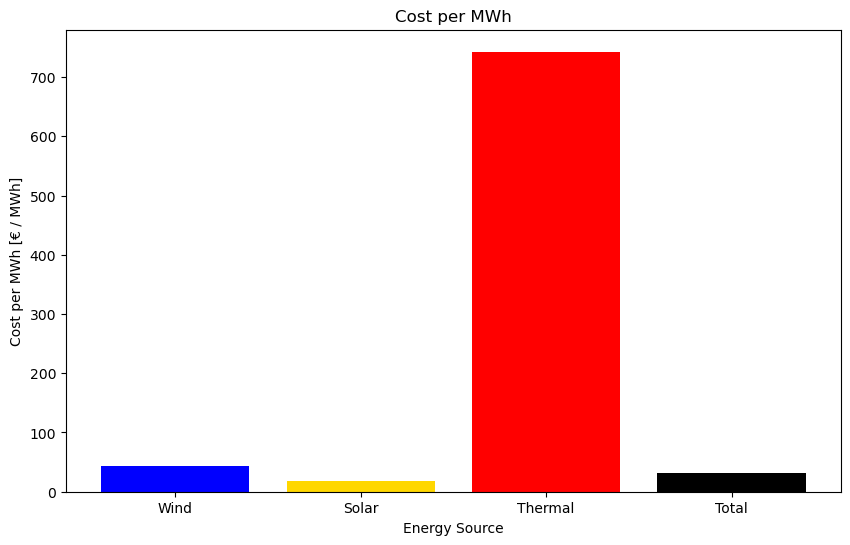

In [42]:
import matplotlib.pyplot as plt
import locale
import pandas as pd
from IPython.display import display

# Define colors
colors = ['blue', 'gold', 'red', 'black']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(result_df.index, result_df['Cost per MWh [€ / MWh]'], color=colors)

# Set plot title and labels
plt.title('Cost per MWh')
plt.xlabel('Energy Source')
plt.ylabel('Cost per MWh [€ / MWh]')

# Show the plot
plt.show()

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

# Get 'Cost per MWh' values
y_values = result_df['Cost per MWh [€ / MWh]'].values

costs_per_mwh_df = pd.DataFrame({
    'Cost per MWh [€/MWh]': y_values
}, index=result_df.index)

styled_costs_per_mwh_df = costs_per_mwh_df.T.style.set_properties(
    **{'text-align': 'center','font-size': '120%','border': '1px solid black','padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).format(lambda x: locale.format_string('%1.2f €', x, True)).hide(axis="index")

display(styled_costs_per_mwh_df)



# 26. Short-term marginal cost

In [43]:
shadow_prices_df = marginal_costs_df.T
shadow_prices_df = shadow_prices_df.rename(columns={shadow_prices_df.columns[0]: "Shadow Price (€/MWh)"})


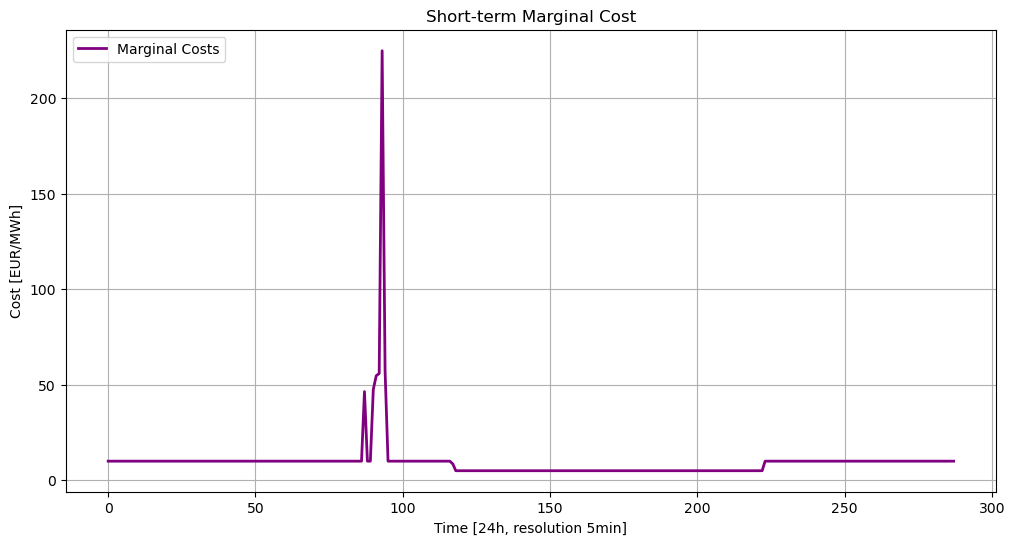

In [44]:
fig, ax1 = plt.subplots()  
ax1.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")
ax1.legend(loc='upper left')
ax1.set_title("Short-term Marginal Cost")
ax1.set_xlabel('Time [24h, resolution 5min]')
ax1.set_ylabel('Cost [EUR/MWh]')
ax1.grid(True)

fig.set_size_inches(12, 6)
plt.show()

#marginal_costs_df


(24, 1)


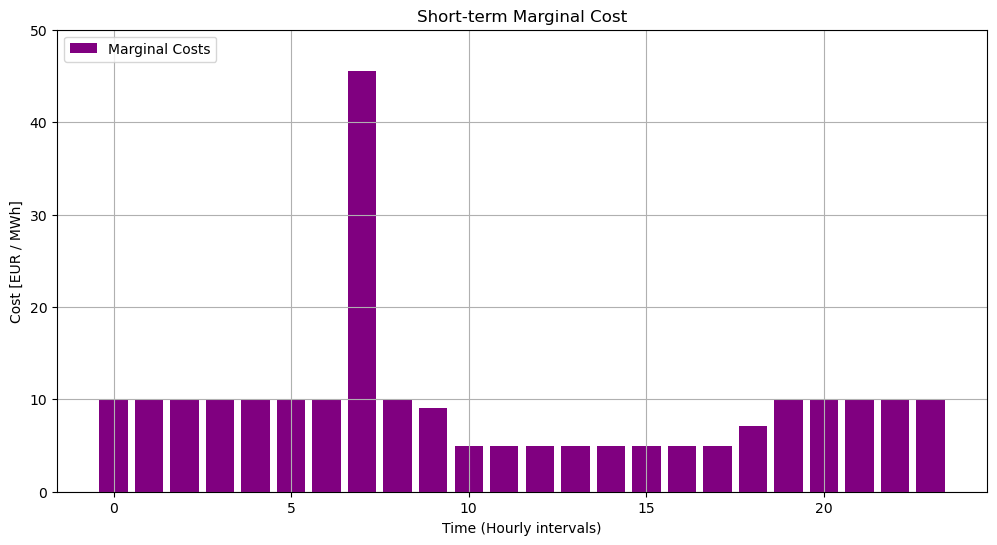

In [45]:
marginal_costs_df_hourly = marginal_costs_df.groupby(np.arange(len(marginal_costs_df))//12).mean()

print(marginal_costs_df_hourly.shape)  

fig, ax1 = plt.subplots(figsize=(12,6))  
ax1.bar(range(24), marginal_costs_df_hourly.iloc[:, 0], label="Marginal Costs", color="purple")
ax1.legend(loc='upper left')
ax1.set_title("Short-term Marginal Cost")
ax1.set_xlabel('Time (Hourly intervals)')
ax1.set_ylabel('Cost [EUR / MWh]')
ax1.grid(True)
plt.ylim(0, 50) 
plt.show()


In [46]:
QD_norm.sum().sum()/12

19.642224498724804

In [47]:
import pandas as pd
import numpy as np
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

w_price_hourly_avg = np.mean(w_price_array.reshape(-1, 12), axis=1)
pv_price_hourly_avg = np.mean(pv_price_array.reshape(-1, 12), axis=1)
th_price_hourly_avg = np.mean(th_price_array.reshape(-1, 12), axis=1)

total_generation_hourly = production_hourly_df['Total Production'] # from the second script

marginal_costs_hourly_avg = marginal_costs_df_hourly.squeeze()

total_prices_hourly = total_generation_hourly * marginal_costs_hourly_avg

prices_table_df = pd.DataFrame({
    'Hourly Total Production': total_generation_hourly,
    'Hourly Marginal Costs': marginal_costs_hourly_avg,
    'Hourly Total Prices': total_prices_hourly
}, index=range(24))

styled_prices_table_df = prices_table_df.style.set_properties(
    **{'text-align': 'center','font-size': '120%','border': '1px solid black','padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).format({
    'Hourly Total Production': lambda x: locale.format_string('%1.2f MWh', x, True),
    'Hourly Marginal Costs': lambda x: locale.format_string('%1.2f €/MWh', x, True),
    'Hourly Total Prices': lambda x: locale.format_string('%1.2f €', x, True)
})

display(styled_prices_table_df)

column_sums = prices_table_df.iloc[:, [0, 2]].sum()

sums_table_df = pd.DataFrame(column_sums).T

styled_sums_table_df = sums_table_df.style.set_properties(
    **{'text-align': 'center','font-size': '120%','border': '1px solid black','padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).format(lambda x: locale.format_string('%1.2f €', x, True) if isinstance(x, float) else x)

display(styled_sums_table_df)

average_marginal_costs = total_prices_hourly.sum() / total_generation_hourly.sum()

average_marginal_costs_df = pd.DataFrame(
    {'Average Marginal Costs': [average_marginal_costs]}, 
    index=['Average']
)

styled_avg_marginal_costs_df = average_marginal_costs_df.style.set_properties(
    **{'text-align': 'center','font-size': '120%','border': '1px solid black','padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).format({
    'Average Marginal Costs': lambda x: locale.format_string('%1.2f €/MWh', x, True)
})

display(styled_avg_marginal_costs_df)


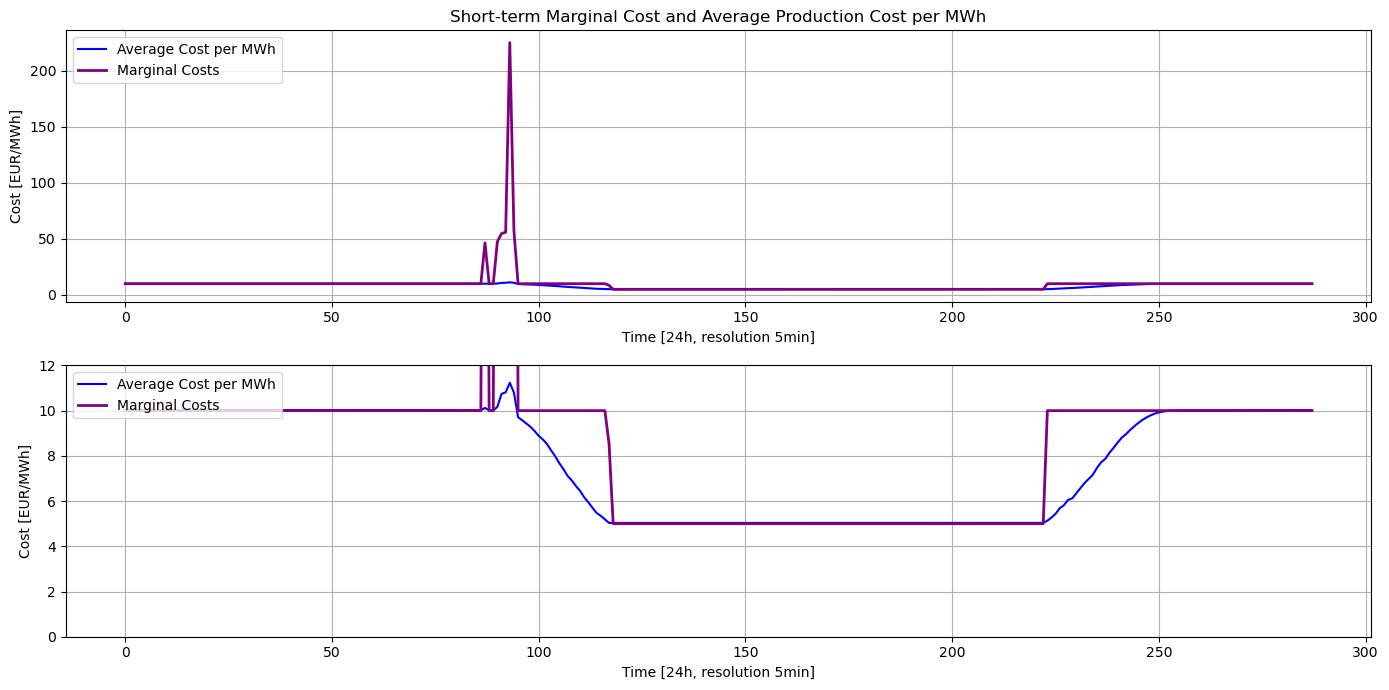

In [48]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14, 7))

ax1.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values, color='blue', label='Average Cost per MWh')
ax1.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")

ax1.set_title("Short-term Marginal Cost and Average Production Cost per MWh")
ax1.set_xlabel('Time [24h, resolution 5min]')
ax1.set_ylabel('Cost [EUR/MWh]')
ax1.grid(True)
ax1.legend(loc='upper left')

ax2.plot(total_cost_per_mwh_24h.index, total_cost_per_mwh_24h.values, color='blue', label='Average Cost per MWh')
ax2.plot(range(NT), marginal_costs_df, linewidth=2.0, label="Marginal Costs", color="purple")

ax2.set_xlabel('Time [24h, resolution 5min]')
ax2.set_ylabel('Cost [EUR/MWh]')
ax2.set_ylim([0, 12])  
ax2.grid(True)
ax2.legend(loc='upper left')

plt.tight_layout() 
plt.show()


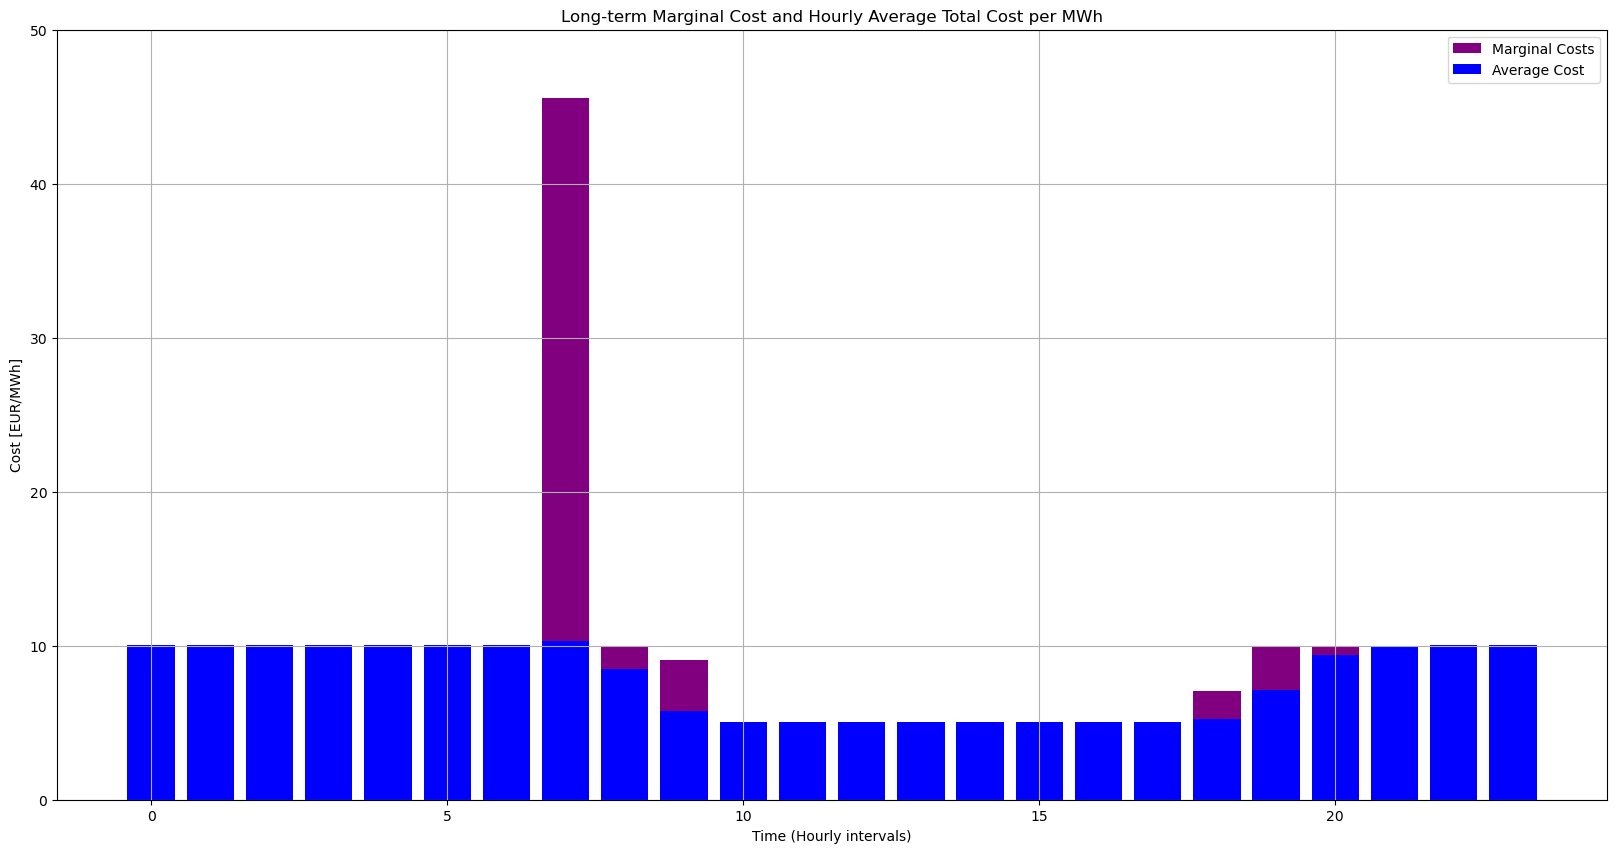

In [49]:
fig, ax = plt.subplots(figsize=(20,10))

ax.bar(range(24), marginal_costs_df_hourly.iloc[:, 0], label="Marginal Costs", color="purple")

ax.bar(range(24), hourly_average_cost, label="Average Cost", color="blue")

ax.set_title("Long-term Marginal Cost and Hourly Average Total Cost per MWh")
ax.set_xlabel('Time (Hourly intervals)')
ax.set_ylabel('Cost [EUR/MWh]')
ax.grid(True)
ax.legend()
plt.ylim(0, 50)
plt.show()


# Investment viability

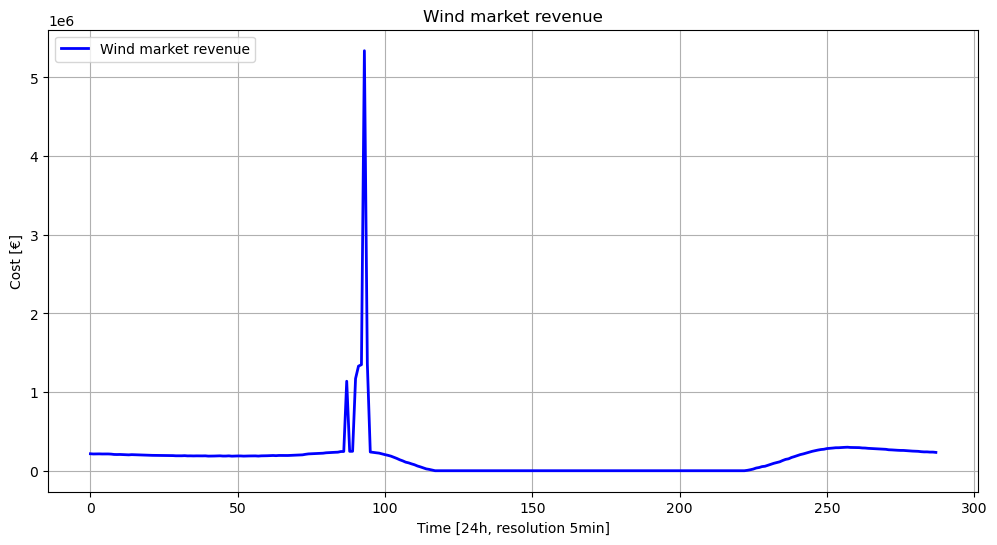

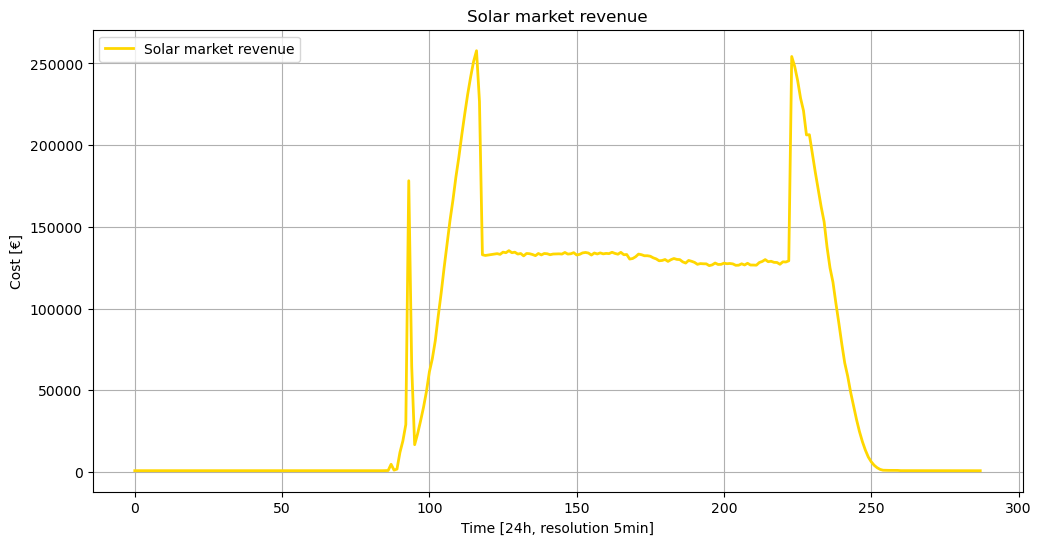

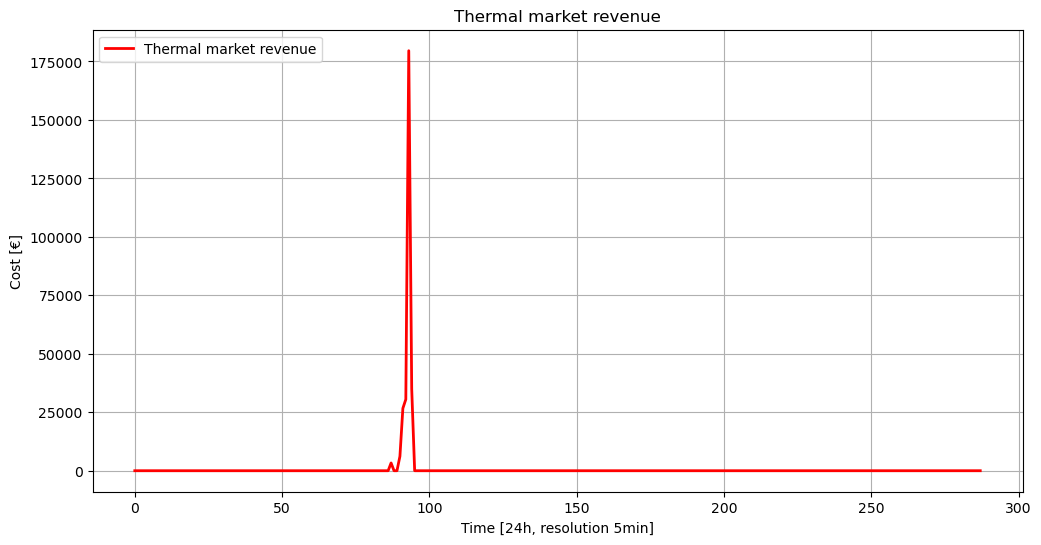

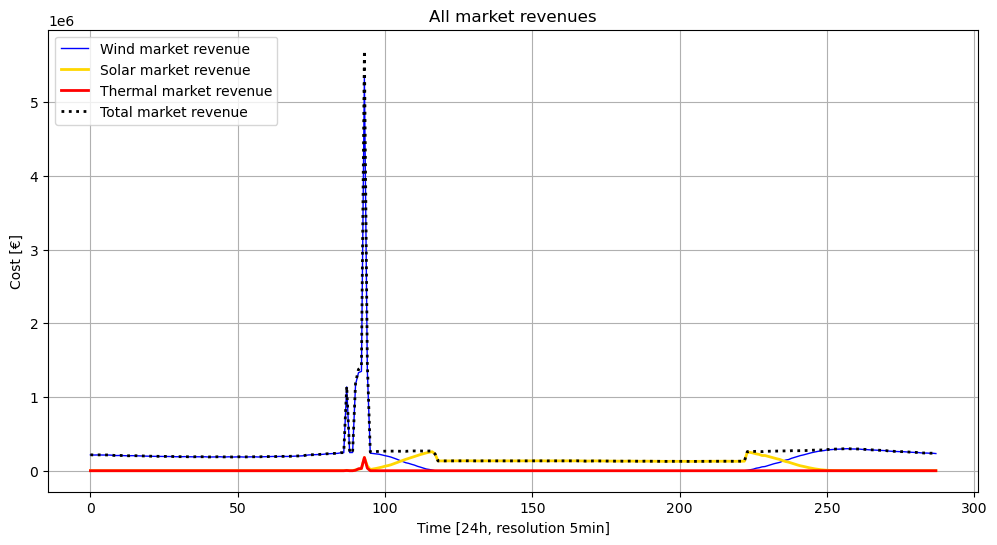

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

w_ini = (QW_norm*i_w_df).T
w_final = (v_w_df).T
pv_ini = (QPV_norm*i_pv_df).T
pv_final = (v_pv_df).T
th_ini = (QTH_norm*Q_TH).T
th_final = (v_th_df).T
x = pd.DataFrame(list(range(NT)))

w_iv = w_final * marginal_costs_df
pv_iv = pv_final * marginal_costs_df
th_iv = th_final * marginal_costs_df
demand_iv = w_iv + pv_iv + th_iv

plt.figure(figsize=(12,6))
plt.plot(range(NT), w_iv, linewidth=2.0, label="Wind market revenue", color="blue")
plt.legend(loc='upper left')
plt.title("Wind market revenue")
plt.xlabel('Time [24h, resolution 5min]')
plt.ylabel('Cost [€]')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(NT), pv_iv, linewidth=2.0, label="Solar market revenue", color="gold")
plt.legend(loc='upper left')
plt.title("Solar market revenue")
plt.xlabel('Time [24h, resolution 5min]')
plt.ylabel('Cost [€]')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(NT), th_iv, linewidth=2.0, label="Thermal market revenue", color="red")
plt.legend(loc='upper left')
plt.title("Thermal market revenue")
plt.xlabel('Time [24h, resolution 5min]')
plt.ylabel('Cost [€]')
plt.grid(True)
plt.show()

#plt.figure(figsize=(12,6))
#plt.plot(range(NT), demand_iv, linewidth=2.0, label="Total market revenue", color="black")
#plt.legend(loc='upper left')
#plt.title("Total market revenue")
#plt.xlabel('Time [24h, resolution 5min]')
#plt.ylabel('Cost [€]')
#plt.grid(True)
#plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(NT), w_iv, linewidth=1.0, label="Wind market revenue", color="blue")
plt.plot(range(NT), pv_iv, linewidth=2.0, label="Solar market revenue", color="gold")
plt.plot(range(NT), th_iv, linewidth=2.0, label="Thermal market revenue", color="red")
plt.plot(range(NT), demand_iv, linewidth=2.0, label="Total market revenue", color="black", linestyle = 'dotted')
plt.legend(loc='upper left')
plt.title("All market revenues")
plt.xlabel('Time [24h, resolution 5min]')
plt.ylabel('Cost [€]')
plt.grid(True)
plt.show()

total_w_iv = w_iv.sum().sum()
total_pv_iv = pv_iv.sum().sum()
total_th_iv = th_iv.sum().sum()
total_demand_iv = demand_iv.sum().sum()

data = {
    'Market revenue': ['Wind', 'Solar', 'Thermal', 'Total'],
    'Cost [€]': [total_w_iv, total_pv_iv, total_th_iv, total_demand_iv]
}

iv_values_df = pd.DataFrame(data)

styled_iv_values_df = iv_values_df.style.set_properties(
    **{'text-align': 'center','font-size': '120%','border': '1px solid black','padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).format({'Cost [€]': lambda x: locale.format_string('%1.2f €', x, True)})

display(styled_iv_values_df)



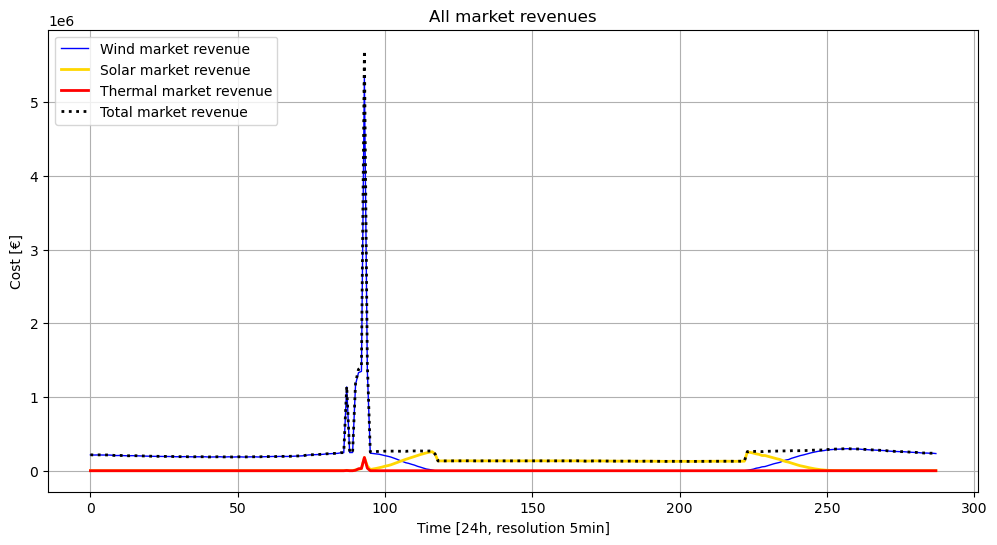

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

w_ini = (QW_norm*i_w_df).T
w_final = (v_w_df).T
pv_ini = (QPV_norm*i_pv_df).T
pv_final = (v_pv_df).T
th_ini = (QTH_norm*Q_TH).T
th_final = (v_th_df).T

w_iv = w_final * marginal_costs_df
pv_iv = pv_final * marginal_costs_df
th_iv = th_final * marginal_costs_df
demand_iv = w_iv + pv_iv + th_iv

total_w_iv = w_iv.sum().sum()
total_pv_iv = pv_iv.sum().sum()
total_th_iv = th_iv.sum().sum()
total_demand_iv = demand_iv.sum().sum()

data = {
    'Market revenue': ['Wind', 'Solar', 'Thermal', 'Total'],
    'Cost [€]': [total_w_iv, total_pv_iv, total_th_iv, total_demand_iv]
}

iv_values_df = pd.DataFrame(data)

plt.figure(figsize=(12,6))
plt.plot(range(NT), w_iv, linewidth=1.0, label="Wind market revenue", color="blue")
plt.plot(range(NT), pv_iv, linewidth=2.0, label="Solar market revenue", color="gold")
plt.plot(range(NT), th_iv, linewidth=2.0, label="Thermal market revenue", color="red")
plt.plot(range(NT), demand_iv, linewidth=2.0, label="Total market revenue", color="black", linestyle = 'dotted')
plt.legend(loc='upper left')
plt.title("All market revenues")
plt.xlabel('Time [24h, resolution 5min]')
plt.ylabel('Cost [€]')
plt.grid(True)
plt.show()

styled_iv_values_df = iv_values_df.style.set_properties(
    **{'text-align': 'center','font-size': '120%','border': '1px solid black','padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).format({'Cost [€]': lambda x: locale.format_string('%1.2f €', x, True)})

display(styled_iv_values_df)


# Long-term marginal costs

In [52]:
marginal_costs_df2[0]/(QD_norm.sum().sum()/12)

114.85798317027363

In [53]:
QD_norm.sum().sum()

235.70669398469764

In [54]:
marginal_costs_df2[0]/(QD_norm)

0            1            2            3            4    \
0  3126.286165  3166.460403  3153.707273  3147.790903  3166.887284   

           5            6            7            8            9    ...  \
0  3162.056029  3162.481724  3189.822239  3258.403122  3273.995016  ...   

          278          279          280          281          282  \
0  2688.26026  2701.554195  2718.436303  2736.061759  2786.364966   

           283          284         285          286          287  
0  2816.768965  2813.620103  2847.95889  2846.923436  2894.871128  

[1 rows x 288 columns]

In [55]:
marginal_costs_df2[0]

2256.06629090127

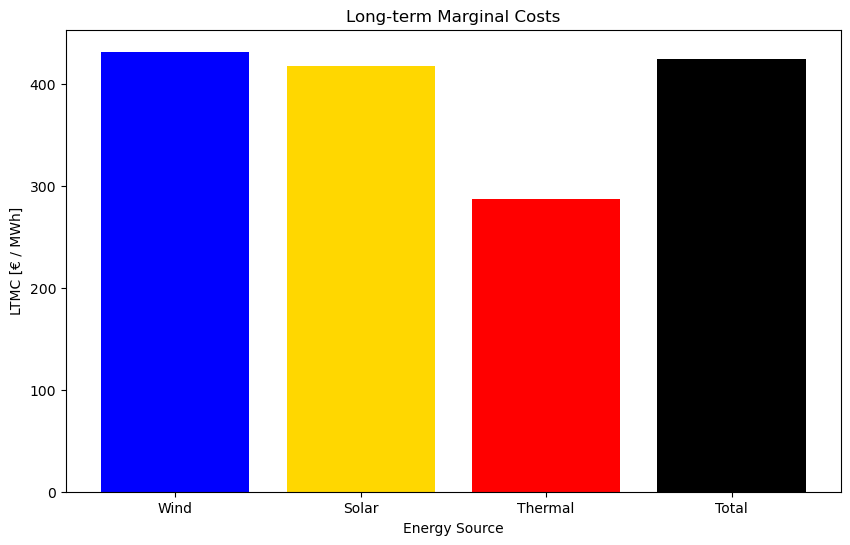

In [56]:
import matplotlib.pyplot as plt
import locale
import pandas as pd
from IPython.display import display

r = 0.065  # discount rate
n = 25     # lifetime of generators
investment_costs = {  # in €/MW
    'Wind': 900000,
    'Solar': 450000,
    'Thermal': 730000
}
operating_costs = {  # in €/MWh
    'Wind': 5,
    'Solar': 1.25,
    'Thermal': 45.02
}
capacity_factor = {  # in MWh
    'Wind': 0.5,
    'Solar': 0.25,
    'Thermal': 1
}

# Energy produced by each generator in MWh
energy_produced = {
    'Wind': 303060.39,
    'Solar': 285985.92,
    'Thermal': 220.421
}

total_energy_produced = sum(energy_produced.values())

energy_proportions = {generator: energy / total_energy_produced for generator, energy in energy_produced.items()}

annuity_factor = (r*(1+r)**n)/((1+r)**n - 1)

ltmc = {}  
for generator in investment_costs.keys():
    annualized_investment_cost = investment_costs[generator] * annuity_factor
    ltmc_mw = annualized_investment_cost + operating_costs[generator] * 1000  # convert €/MWh to €/MW
    ltmc[generator] = ltmc_mw / (capacity_factor[generator] * 365)

total_ltmc = sum(ltmc[generator] * energy_proportions[generator] for generator in ltmc.keys())


colors = ['blue', 'gold', 'red', 'black']

plt.figure(figsize=(10, 6))
plt.bar(ltmc.keys(), ltmc.values(), color=colors)
plt.bar('Total', total_ltmc, color='black')

plt.title('Long-term Marginal Costs')
plt.xlabel('Energy Source')
plt.ylabel('LTMC [€ / MWh]')

plt.show()

locale.setlocale(locale.LC_ALL, 'es_ES.utf8')

df = pd.DataFrame.from_dict(ltmc, orient='index', columns=['LTMC'])
df.loc['Total'] = total_ltmc

styled_df = df.T.style.set_properties(
    **{'text-align': 'center','font-size': '120%','border': '1px solid black','padding': '10px'}
).set_table_styles(
    [dict(selector='th', props=[('text-align', 'center'), ('font-size', '130%'), ('border', '1px solid black'), ('padding', '10px')])]
).format(lambda x: locale.format_string('%1.2f € / MWh ', x, True)).hide(axis="index")

display(styled_df)